In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import xlwings as xw
import cv2
import math
import os
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
import pickle
from skimage.feature import graycomatrix, graycoprops, hog, local_binary_pattern
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from scipy.linalg import null_space
import sympy as sp
from scipy import signal
import pywt
import csv
from openpyxl import load_workbook

C:\Users\dell\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import numpy as np

def spectral_norm(A):
    # Compute the singular values of the matrix A
    singular_values = np.linalg. svd(A, compute_uv=False)
    
    # The spectral norm is the maximum singular value
    return np.max(singular_values)


In [3]:
def condition_number(eigenvalues):
    eigenvalues = np.array(eigenvalues)
    
    # Filter out the positive eigenvalues
    positive_eigenvalues = eigenvalues[eigenvalues > 0]
    
    # Check if there are any positive eigenvalues
    if len(positive_eigenvalues) == 0:
        negative_eigenvalues = eigenvalues[eigenvalues < 0]
        if len(negative_eigenvalues) == 0:
            return 0  # No positive or negative eigenvalues, return 0
        return np.max(negative_eigenvalues) / np.min(negative_eigenvalues)
    
    # Compute the condition number
    return np.max(positive_eigenvalues) / np.min(positive_eigenvalues)

In [4]:
# Finding Index of nilpotency of the image matrix

def find_nilpotent_index(A):
    
    print('Index of Nilpotency')
    n = A.shape[0]  # Get the size of the matrix
    identity_matrix = np.zeros((n, n))  # Zero matrix of the same size
    current_matrix = A.copy()  # Start with the matrix itself
    
    for k in range(1, n+1):  # Iterate from 1 to n
        current_matrix = np.dot(current_matrix, A)  # Multiply the matrix by itself
        if np.array_equal(current_matrix, identity_matrix):  # Check if it becomes the zero matrix
            return k  # Return the index of nilpotency
    
    return 0  # Return -1 if the matrix is not nilpotent

In [5]:
# Finding algebraic multiplicity of Image Matrix

def algebraic_multiplicity(A):
    
    print('Algebraic multiplicity')
    l1 = []
    l2 = []
    dic1 = {}
    for i in A:
        if i>0:
            if i in dic1:
                dic1[i]+=1 
            else:
                dic1[i] = 1
                
    for i in dic1:
        l1.append(i)
        l2.append(dic1[i])
    
    return l2
            

In [6]:
# Find the number of positive, negative and zero eigen values

def eigen_count(A):
    
    print('eigen count')
    pos = 0
    neg = 0
    zero = 0
    
    for i in A:
        if i>0:
            pos+=1
        elif i<0:
            neg+=1
        else:
            zero+=1
    return [neg, pos, zero]

In [7]:
def geometric_multiplicity_for_all_eigenvalues(matrix, eigenvalues):
    
    print('geometric multiplicity')
    # List to store geometric multiplicity for each eigenvalue
    geom_multiplicities = []

    for eigenvalue in eigenvalues:
        # Subtract eigenvalue times identity matrix from the original matrix
        I = np.identity(matrix.shape[0])
        A_minus_lambdaI = matrix - eigenvalue * I

        # Find the null space of (A - lambda * I)
        null_space_vectors = null_space(A_minus_lambdaI)

        # Geometric multiplicity is the dimension of the null space
        geom_multiplicity = null_space_vectors.shape[1]

        # Append the result to the list
        geom_multiplicities.append(geom_multiplicity)

    return geom_multiplicities


In [8]:
import numpy as np

def calculate_matrix_properties(submatrix):
    # Calculate determinant
    determinant = np.linalg.det(submatrix)
    
    # Calculate trace
    trace = np.trace(submatrix)
    
    # Calculate rank
    rank = np.linalg.matrix_rank(submatrix)
    
    # Calculate eigenvalues
    eigenvalues = np.linalg.eigvals(submatrix)
    
    # If any eigenvalues are complex, take their magnitude
    eigenvalues = [np.abs(ev) if np.iscomplex(ev) else ev for ev in eigenvalues]
    e1 = len(eigenvalues)
    
    # If determinant or trace are complex, take their magnitude
    if np.iscomplex(determinant):
        determinant = np.abs(determinant)
    if np.iscomplex(trace):
        trace = np.abs(trace)
    
    return determinant, trace, rank, eigenvalues

def extract_submatrices_and_calculate_properties(matrix, size):
    n = int(matrix.shape[0])  # Ensure n is an integer
    size = int(size)
    results = []
    
    # Extract all size x size submatrices
    for i in range(n - size + 1):
        for j in range(n - size + 1):
            submatrix = matrix[i:i+size, j:j+size]
            determinant, trace, rank, eigenvalues = calculate_matrix_properties(submatrix)
            
            # Flatten the results and append them to the results list
            results.extend([determinant, trace, rank] + list(eigenvalues))
#     print(results)

    return np.array(results)



In [9]:
def layer(image, window_size):    
        
    # Extract the submatrices and calculate their properties
    feature_vector = extract_submatrices_and_calculate_properties(image, window_size)
    
    # Determine the size of the feature matrix
    n1 = len(feature_vector)
    n2 = math.ceil(math.sqrt(n1))
    
    # Extend the feature vector to fit into a square matrix
    feature_vector2 = feature_vector.copy()
    image_flattened = image.flatten()  # Assuming 'image_flattened' is the flattened version of the image
    
    while len(feature_vector2) < (n2 * n2):
        feature_vector2 = np.append(feature_vector2, image_flattened)
    feature_vector2 = feature_vector2[:(n2 * n2)]
#     print('feature_vector2:', len(feature_vector2))
    
    # Reshape the extended feature vector into a square matrix
    feature_matrix = np.reshape(feature_vector2, (int(n2), int(n2)))
    
#     print('feature_matrixlen:',len(feature_matrix))
    
    # Normalize the matrix to range [0, 1]
    feature_matrix_min = feature_matrix.min()
    feature_matrix_max = feature_matrix.max()

    if feature_matrix_max > feature_matrix_min:
        feature_matrix = (feature_matrix - feature_matrix_min) / (feature_matrix_max - feature_matrix_min)
    else:
        # If the matrix has the same min and max, avoid division by zero and set to zero
        feature_matrix = np.zeros_like(feature_matrix)

    # Scale the normalized matrix to range [0, 255]
    feature_matrix = feature_matrix * 255

    # Optionally, convert to integer type (e.g., uint8)
    feature_matrix = feature_matrix.astype(np.uint8)
    
    # Calculate the rank, determinant, trace, and eigenvalues of the feature matrix
    rdeig = list(calculate_matrix_properties(feature_matrix))
    
    return feature_vector,feature_vector2,feature_matrix


In [10]:
def condition_number_layer(matrix, window_size):
    rows, cols = matrix.shape
    condition_numbers = []
    
    # Generate all submatrices of the given window_size
    for i in range(rows - window_size + 1):
        for j in range(cols - window_size + 1):
            submatrix = matrix[i:i+window_size, j:j+window_size]
            
            # Compute the eigenvalues of the submatrix
            eigenvalues = np.linalg.eigvals(submatrix)
            
            # Calculate the condition number
            cond_number = condition_number(eigenvalues)
            
            # Append the condition number to the list
            if np.iscomplexobj(cond_number):
                cond_number = abs(cond_number)
            condition_numbers.append(cond_number)
    
    # Convert the list of condition numbers to a numpy array
    condition_numbers = np.array(condition_numbers)
    
    # Calculate the size of the new square matrix
    new_size = rows - window_size + 1
    
    # Reshape the array into a square matrix
    condition_matrix = condition_numbers.reshape((new_size, new_size))
    
    condition_matrix[np.isinf(condition_matrix)] = np.nan
    condition_matrix = np.nan_to_num(condition_matrix, nan=0.0)
    condition_matrix[np.isinf(condition_matrix)] = np.nanmax(condition_matrix)
    
    # Compute eigenvalues of the final condition_matrix
    final_eigenvalues = np.linalg.eigvals(condition_matrix)
    
    # Compute the condition number of the final condition_matrix
    final_condition_number = condition_number(final_eigenvalues)
    
    
    return condition_numbers, condition_matrix, final_condition_number

In [11]:

def spectral_number_layer(matrix, window_size):
    rows, cols = matrix.shape
    spectral_norms = []
    
    # Generate all submatrices of the given window_size
    for i in range(rows - window_size + 1):
        for j in range(cols - window_size + 1):
            submatrix = matrix[i:i+window_size, j:j+window_size]
            
            # Compute the spectral norm of the submatrix
            norm = spectral_norm(submatrix)
            
            if np.iscomplexobj(norm):
                norm = abs(norm)
            
            # Append the spectral norm to the list
            spectral_norms.append(norm)
    
    # Convert the list of spectral norms to a numpy array
    spectral_norms_array = np.array(spectral_norms)
    
    # Calculate the size of the new square matrix
    new_size = rows - window_size + 1
    
    # Reshape the array into a square matrix
    spectral_norm_matrix = spectral_norms_array.reshape((new_size, new_size))
    
    spectral_norm_matrix[np.isinf(spectral_norm_matrix)] = np.nan
    spectral_norm_matrix = np.nan_to_num(spectral_norm_matrix, nan=0.0)
    spectral_norm_matrix[np.isinf(spectral_norm_matrix)] = np.nanmax(spectral_norm_matrix)
    
    final_norm = spectral_norm(spectral_norm_matrix)
    
    if np.iscomplexobj(final_norm):
        norm = abs(final_norm)
    
    
    return spectral_norms_array, spectral_norm_matrix, final_norm

In [12]:
def characteristic_polynomial_coefficients(matrix):

    sympy_matrix = sp.Matrix(matrix)
    
    # Define the symbol for lambda
    λ = sp.symbols('λ')

    char_poly = sympy_matrix.charpoly(λ).as_expr()
    
    # Extract the coefficients
    coefficients = sp.Poly(char_poly, λ).all_coeffs()
#     print(len(coefficients))
    
    return np.array(coefficients)

In [13]:
def characteristic_polynomial_coefficients_layer(matrix, window_size):
    rows, cols = matrix.shape
    coeffs_array = []
#     count = 0  
    for i in range(rows - window_size + 1):
        for j in range(cols - window_size + 1):
            sub_matrix = matrix[i:i + window_size, j:j + window_size]
            sub_matrix_sympy = sp.Matrix(sub_matrix)
            coeffs = characteristic_polynomial_coefficients(sub_matrix_sympy)
#             print('coeffs: ', len(coeffs))
            for ele in coeffs:
                coeffs_array.append(ele)
#             print('coeffs: ',coeffs) 
#             count+=1
#     print('coeffs_array: ',len(coeffs_array))
    return np.array(coeffs_array)

In [14]:
def minimum_polynomial_coefficients(sub_matrix):
    # Calculate the minimum polynomial using SymPy's eigenvalues
    eigenvals = list(sub_matrix.eigenvals().keys())  # Get eigenvalues as a list
    if len(eigenvals) == 0:
        return [1]  # If no eigenvalues, return a constant polynomial 1
    
    # Construct the minimum polynomial from eigenvalues
    x = sp.symbols('x')
    # Create the polynomial (x - eigenvalue) for each eigenvalue
    polynomial = sp.prod([x - val for val in eigenvals])
    # Get coefficients in standard order (from highest degree to lowest)
    return sp.poly(polynomial).all_coeffs()

def minimum_polynomial_coefficients_layer(matrix, window_size):
    rows, cols = matrix.shape
    coeffs_array = []

    for i in range(rows - window_size + 1):
        for j in range(cols - window_size + 1):
            sub_matrix = matrix[i:i + window_size, j:j + window_size]
            sub_matrix_sympy = sp.Matrix(sub_matrix)
            coeffs = minimum_polynomial_coefficients(sub_matrix_sympy)
            for ele in coeffs:
                coeffs_array.append(ele)

    return np.array(coeffs_array)


In [15]:
# Function to load and preprocess the image
def load_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img

# Function to apply Sobel filter and resize the image
def apply_sobel_filter(image, target_size, kernalSize):
    # Apply Sobel filter in the X and Y direction
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, kernalSize)  # Horizontal edges
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, kernalSize)  # Vertical edges
    
    # Combine both directions to get the edge magnitude
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    # Normalize the result to 0-255 range for display
    sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX)
    sobel_combined = sobel_combined.astype(np.uint8)

    # Resize the image to the target size
    resized_image = cv2.resize(sobel_combined, target_size)

    return resized_image

# Function to load, apply Sobel filter, resize, and save the image
def sobel_filter(img, target_size, kernalSize):
    # Load the image
    # img = load_image(image_path)

    # Apply Sobel filter and resize
    sobel_image = apply_sobel_filter(img, (target_size, target_size), kernalSize)

    # Save the image in the same directory as the original image
    # directory = os.path.dirname(image_path)
    # output_path = os.path.join(directory, "sobel_filtered_image"+image_path+str(target_size[0])+".png")
    # cv2.imwrite(output_path, sobel_image)

    # print(f"Sobel filtered image saved at: {output_path}")

    return sobel_image

In [16]:
# Function to apply Scharr filter and resize the image
def apply_scharr_filter(image, target_size):
    # Scharr is a special case of Sobel with kernel size fixed to 3
    scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)  # Horizontal edges
    scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)  # Vertical edges
    
    # Combine both directions to get the edge magnitude
    scharr_combined = cv2.magnitude(scharr_x, scharr_y)
    
    # Normalize and resize
    scharr_combined = cv2.normalize(scharr_combined, None, 0, 255, cv2.NORM_MINMAX)
    scharr_combined = scharr_combined.astype(np.uint8)
    resized_image = cv2.resize(scharr_combined, target_size)

    return resized_image

In [17]:
def apply_roberts_cross_filter(image, target_size):
    # Define Roberts Cross kernels
    roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

    # Apply Roberts Cross filter in X and Y directions
    roberts_x_filtered = cv2.filter2D(image, cv2.CV_64F, roberts_x)
    roberts_y_filtered = cv2.filter2D(image, cv2.CV_64F, roberts_y)

    # Combine both directions to get the edge magnitude
    roberts_combined = cv2.magnitude(roberts_x_filtered, roberts_y_filtered)

    # Normalize and resize
    roberts_combined = cv2.normalize(roberts_combined, None, 0, 255, cv2.NORM_MINMAX)
    roberts_combined = roberts_combined.astype(np.uint8)
    resized_image = cv2.resize(roberts_combined, target_size)

    return resized_image

In [18]:
# Function to apply Laplacian filter and resize the image
def apply_laplacian_filter(image, target_size):
    # Apply Laplacian filter
    laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)

    # Normalize and resize
    laplacian_filtered = cv2.normalize(laplacian_filtered, None, 0, 255, cv2.NORM_MINMAX)
    laplacian_filtered = laplacian_filtered.astype(np.uint8)
    resized_image = cv2.resize(laplacian_filtered, target_size)

    return resized_image

In [19]:
# Function to apply Unsharp Mask filter and resize the image
def apply_unsharp_mask_filter(image, target_size):
    # Create a Gaussian blurred image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 1.0)

    # Subtract blurred image from original image (unsharp mask)
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

    # Resize the image
    resized_image = cv2.resize(unsharp_mask, target_size)

    return resized_image

In [20]:
# Function to apply High-pass filter and resize the image
def apply_highpass_filter(image, target_size):
    # Define a kernel for High-pass filtering
    highpass_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=np.float32)

    # Apply High-pass filter
    highpass_filtered = cv2.filter2D(image, cv2.CV_64F, highpass_kernel)

    # Normalize and resize
    highpass_filtered = cv2.normalize(highpass_filtered, None, 0, 255, cv2.NORM_MINMAX)
    highpass_filtered = highpass_filtered.astype(np.uint8)
    resized_image = cv2.resize(highpass_filtered, target_size)

    return resized_image

In [21]:
# Function to apply Low-pass filter (Gaussian) and resize the image
def apply_lowpass_filter(image, target_size):
    # Apply Gaussian blur (low-pass filter)
    lowpass_filtered = cv2.GaussianBlur(image, (5, 5), 1.0)

    # Resize the image
    resized_image = cv2.resize(lowpass_filtered, target_size)

    return resized_image

In [22]:
# Function to normalize matrix values to range between 0 and 255
def normalize_matrix_to_255(matrix):
    # Get the minimum and maximum values from the matrix
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    
    # Normalize the matrix to the range 0 to 255
    normalized_matrix = 255 * (matrix - min_val) / (max_val - min_val)
    
    # Convert the normalized values to integers (optional, for pixel values)
    normalized_matrix = normalized_matrix.astype(np.uint8)
    
    return normalized_matrix




In [23]:
# Function to load, apply any filter, resize, and save the image
def applyFilter(img, target_size, filter_type="sobel", kernel_size=7):
    # filtered_image = []
    if filter_type == "sobel":
        filtered_image = apply_sobel_filter(img, target_size, kernel_size)
    elif filter_type == "scharr":
        filtered_image = apply_scharr_filter(img, target_size)
    elif filter_type == "roberts":
        filtered_image = apply_roberts_cross_filter(img, target_size)
    elif filter_type == "laplacian":
        filtered_image = apply_laplacian_filter(img, target_size)
    elif filter_type == "unsharp":
        filtered_image = apply_unsharp_mask_filter(img, target_size)
    elif filter_type == "highpass":
        filtered_image = apply_highpass_filter(img, target_size)
    elif filter_type == "lowpass":
        filtered_image = apply_lowpass_filter(img, target_size)
    return filtered_image

In [24]:
def gcd(x, y):
    while y != 0:
        (x, y) = (y, x % y)
    return abs(x)

def lcm(x, y):
    return abs(x * y) // gcd(x, y)

def smith_normal_form(matrix):
    """
    Computes the Smith Normal Form of a given matrix using elementary row and column operations.
    
    :param matrix: A 2D NumPy array representing the matrix.
    :return: A NumPy array representing the Smith Normal Form.
    """
    A = np.array(matrix, dtype=int)
    m, n = A.shape

    i = 0
    j = 0

    while i < m and j < n:
        # Step 1: Find the smallest non-zero entry in A[i:,j:] and swap it to A[i,j]
        min_val = np.inf
        min_pos = None
        for p in range(i, m):
            for q in range(j, n):
                if A[p, q] != 0 and abs(A[p, q]) < min_val:
                    min_val = abs(A[p, q])
                    min_pos = (p, q)
        
        if min_pos is None:
            # No non-zero element found, move to next row and column
            i += 1
            j += 1
            continue
        
        # Swap rows and columns to bring the smallest element to A[i, j]
        p, q = min_pos
        A[[i, p]] = A[[p, i]]  # Swap rows
        A[:, [j, q]] = A[:, [q, j]]  # Swap columns

        # Step 2: Clear the entries below and to the right of A[i, j]
        for p in range(i + 1, m):
            if A[p, j] != 0:
                g = gcd(A[i, j], A[p, j])
                A[p, :] = A[p, :] - (A[p, j] // g) * A[i, :]
        
        for q in range(j + 1, n):
            if A[i, q] != 0:
                g = gcd(A[i, j], A[i, q])
                A[:, q] = A[:, q] - (A[i, q] // g) * A[:, j]

        # Step 3: Normalize A[i, j] to be positive and ensure divisibility of diagonal elements
        A[i, j] = abs(A[i, j])

        # Clear entries above A[i, j]
        for p in range(i):
            if A[p, j] != 0:
                g = gcd(A[i, j], A[p, j])
                A[p, :] = A[p, :] - (A[p, j] // g) * A[i, :]
        
        for q in range(j):
            if A[i, q] != 0:
                g = gcd(A[i, j], A[i, q])
                A[:, q] = A[:, q] - (A[i, q] // g) * A[:, j]

        i += 1
        j += 1

    return A.diagonal()


In [25]:

def rdeigValues(image):            
    rdeig = [np.linalg.matrix_rank(image)]
    rdeig.append(np.linalg.det(image))
    rdeig.append(image.trace())
    eva, evec = np.linalg.eig(image)
    eva = sorted(eva, reverse=True)
    rdeig +=[np.abs(i) if np.iscomplex(i) else i for i in eva]
    return rdeig

In [26]:
def append_train_image(path,size):
    for di in os.listdir(path):
        dirpath = os.path.join(path, di)
        if di==".DS_Store":
            continue
        for img in os.listdir(dirpath):
            image_p = cv2.imread(os.path.join(dirpath, img), 0)
            image = cv2.resize(image_p, (size, size))
            Train_images.append(image)
def append_test_image(path,size):
    for di in os.listdir(path):
        dirpath = os.path.join(path, di)
        if di==".DS_Store":
            continue
        for img in os.listdir(dirpath):
            image_p = cv2.imread(os.path.join(dirpath, img), 0)
            image = cv2.resize(image_p, (size, size))
            Test_images.append(image)
def append_validate_image(path,size):
    for di in os.listdir(path):
        dirpath = os.path.join(path, di)
        if di==".DS_Store":
            continue
        for img in os.listdir(dirpath):
            image_p = cv2.imread(os.path.join(dirpath, img), 0)
            image = cv2.resize(image_p, (size, size))
            Val_images.append(image)

In [27]:
# Generate scalogram using STFT
def generate_scalogram_stft(image, size):
    f, t, Sxx = signal.spectrogram(image.flatten(), fs=1, nperseg=size)
    Sxx_magnitude = np.sqrt(Sxx.real**2 + Sxx.imag**2)  # Use magnitude
    Sxx_magnitude = np.log(Sxx_magnitude + 1e-10)  # Log scaling
    return cv2.resize(Sxx_magnitude, (size, size))  # Resize to square
    
# Generate scalogram using CWT
def generate_scalogram_cwt(image, size):
    coefficients, _ = pywt.cwt(image.flatten(), np.arange(1, size), 'gaus1')
    scalogram = np.abs(coefficients)  # Take the absolute value of coefficients
    scalogram = scalogram[0]
    return cv2.resize(scalogram, (size, size))  # Use the first scale and resize


In [28]:
# Ask the user for the number of classes and the class labels
no_class_labels = int(input('Enter number of classes present in the dataset: '))
class_label_list = list(input('Enter the class labels in order (names should be exactly same as folder names) separated by space: ').split(' '))

# Initialize the dictionary to store class labels and their corresponding indices
label_dic = {}

label_dic_reverse = {}

# Populate the label dictionary with class labels as keys and corresponding index as values
for i in range(len(class_label_list)):
    label_dic[class_label_list[i].lower()] = i
    label_dic_reverse[i] = class_label_list[i]

# Print the label dictionary
print(label_dic)
print(label_dic_reverse)


Enter number of classes present in the dataset: 2
Enter the class labels in order (names should be exactly same as folder names) separated by space: normal covid
{'normal': 0, 'covid': 1}
{0: 'normal', 1: 'covid'}


In [30]:
p = int(input("Enter 0: Train/Test Images, 1: Train/Validation/Test Images"))
k = int(input("""Enter 
    0: only features, 
    1: features+eigen, 
    2: only eigen, 
    3: (n-f+1)^2 * (f+3) features,
    4: ((n-f+1)^2 * (f+3)) + (n+3) features, 
    5: m+3 features,
    6: (m-n+1)^2 * (n+3) features,
    7: ((m-n+1)^2 * (n+3)) + (m+3) features,
    8: g+3 features,
    9: (g-m+1)^2 * (m+3) features,
    10: ((g-m+1)^2 * (m+3)) + (g+3) features
    11: (n-f+1)^2+(n+3) features
    12: Condition Number+Spectral Norm 6 Levels
    13: CP+CN+SN
    14: Apply filters (CP+CN+SN)
    15: A A^2 A^3 (CN+CP+SN+Smith Diagonal)
    16: A (CN+CP+SN+Smith Diagonal)
    17: Smith Normal Form + Characteristic Polynomial + Condition Number + Spectral Norm (On A and A inverse)
    18: features + Rank +Trace + Determinant + Characteristic Polynomial + Eigen values
    19: features + Rank + Trace + Determinant + Smith Normal Form + Eigen Values
    20: Rank + Trace + Determinant + Smith Normal Form + Eigen Values on 32x32 64x64 128x128 224x224
    21: Characteristic Polynomial for given window size
    22: Minimum Polynomial for given window size
    23: CP+MP+RDEIG for given window size
    24: Pixels of original + MP's of 2 additional datasets (CWT, STFT) 
    25: MP's of original + MP's of 2 additional datasets (CWT, STFT) 
    26: Pixels of Original + MP's of original + MP's of 2 additional datasets (CWT, STFT) 
    27: MP's of Original + MP's of all other datasets
    28: Pixels of one datasets + MP's of other all datasets+ MP's of original dataset
    29: MP's of all other datasets
    30: MP's (original(32x32 + 64x64 + 128x128) + CWT- Gauss(32x32 + 64x64 + 128x128) + STFT(32x32 + 64x64 + 128x128)) without saving image
    31: MP's (original(32x32 + 64x64 + 128x128) + CWT- Gauss(32x32 + 64x64 + 128x128) + STFT(32x32 + 64x64 + 128x128)) taking saved image
    32: 3 channel (original image pixels + properties of original+cwt+stft)
    33: Original image pixels + CWT/STFT Properties
    34: pixels of 3 datasets + MP's of 3 datasets 
    """))

kp=k
Train_images = []
Test_images = []
Val_images = []

if k<=3 or k == 18 or k == 19 or k == 20 or k == 24 or k == 26 or k==25 or k==27 or k == 28 or k==29 or k==30 or k == 31 or k==32 or k == 33 or k == 34:
    global window_size_original1
    window_size_original = 32
    window_size_original1=window_size_original
if k>=3 and k<=13 or k==15 or k==16 or k==17 or k==21 or k==22 or k==23 :
    global char
    char = input('Do you want to use the default window sizes (Y/N)?')
    if char == 'n' or char == 'N':
            if k>=6 and k<=10:
                global window_size_mxm
                window_size_mxm = int(input('Enter the filter size to apply on mxm image'))
            if k>=9 and k<=10:
                global window_size_gxg
                window_size_gxg = int(input('Enter the filter size to apply on gxg image'))
    global window_size_original
    window_size_original = int(input('Enter the filter size to apply on original image'))
    
def process_images(path, size, k, window_size=0, additional_datasets=[]):
    data = []
    
    # if k!=14:
    #     char = input('Do you want to use the default window D:\MINOR PROJECT\Scalogram Results\Novel covid-19 Agumented Data\CN\32x32
    
    #     if char == 'n' or char == 'N':
    #         if k>=6 and k<=10:
    #             window_size_mxm = int(input('Enter the filter size to apply on mxm image'))
    #         if k>=9 and k<=10:
    #             window_size_gxg = int(input('Enter the filter size to apply on gxg image'))
    
    if k==14:
        global size1, kernel_size1, target_size1, filter_choice1
        size = int(input('Enter the target size: '))
        kernel_size = int(input('Enter the kernel size for Sobel (e.g., 3, 5, 7): '))
        target_size = (size, size)  # Desired target size
        filter_choice = input('Enter filter type (sobel/scharr/roberts/laplacian/unsharp/highpass/lowpass/all): ').lower()
        # Assign values to the global variables
        size1 = size
        kernel_size1 = kernel_size
        target_size1 = target_size
        filter_choice1 = filter_choice
        
        
    for di in os.listdir(path):
        dirpath = os.path.join(path, di)
        di = label_dic[di.lower()]
        print(di)
        if di==".DS_Store":
            continue
        for img in os.listdir(dirpath):
            img_name = img
            image_p = cv2.imread(os.path.join(dirpath, img), 0)
            if k>=0 and k<=13 or (k>=15 and k<=34) :
                image = cv2.resize(image_p, (size, size))
                # Ensure image is of type float
                image = image.astype(np.float32)
                
                rdeig = [np.linalg.matrix_rank(image)]
                rdeig.append(np.linalg.det(image))
                rdeig.append(image.trace())
                eva, evec = np.linalg.eig(image)
                eva = sorted(eva, reverse=True)
    #             rdeig += [abs(i) if isinstance(i, complex) else i for i in eva]
                rdeig +=[np.abs(i) if np.iscomplex(i) else i for i in eva]
                
                image_flattened = image.flatten()
            
            if k == 0:
#                 Only image pixels
                features = np.append(image_flattened, int(di))
    
            elif k == 1:
#             Pixels+Matrix Properties
                features = np.append(image_flattened, rdeig)
                features = np.append(features, int(di))
        
            elif k == 2:
#                 Only Matrix Properties
                features = np.append(rdeig, int(di))
                features = features.astype(np.float32)
#                 print(features)
#                 features = np.clip(features, a_min=min(rdeig), a_max=max(rdeig))
#                 print(len(features))
            
            elif k == 3:                
#                 Layer1:- Matrix Properties with a given window size and reshaping the obatined properties to a matrix and using those matrix properties
                # (n-f+1)^2 * (f+3) features
                if char=='n'or char=='N':
                    window_size = window_size_original
                feature_vector,feature_vector2,mxm_matrix = layer(image, window_size)
                features = np.append(feature_vector, int(di))

            elif k == 4:
                # ((n-f+1)^2 * (f+3)) + (n+3) features
                if char=='n'or char=='N':
                    window_size = window_size_original
                feature_vector,feature_vector2,mxm_matrix = layer(image, window_size)
                feature_vector2 = np.append(feature_vector2, rdeig)
                features = np.append(feature_vector2, int(di))

            elif k == 5:
                # m+3 features
                if char=='n'or char=='N':
                    window_size = window_size_original
                feature_vector,feature_vector2,mxm_matrix = layer(image, window_size)
                determinant, trace, rank, eigenvalues = calculate_matrix_properties(mxm_matrix)
                features = []
                features.extend([determinant, trace, rank] + list(eigenvalues))
                features = np.array(features)
                features = np.append(features, int(di))

            elif k == 6:
                # (m-n+1)^2 * (n+3) features
                if char=='y'or char=='Y':
                    feature_vector,square_vector,mxm_matrix = layer(image, window_size)
                    feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size)
                else:
                    feature_vector,square_vector,mxm_matrix = layer(image, window_size_original)
                    feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size_mxm)
                
                features = np.append(feature_vector2, int(di))
                
            elif k == 7:
                # ((m-n+1)^2 * (n+3)) + (m+3) features
                if char=='y'or char=='Y':
                    feature_vector,square_vector,mxm_matrix = layer(image, window_size)
                    feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size)
                else:
                    feature_vector,square_vector,mxm_matrix = layer(image, window_size_original)
                    feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size_mxm)
                determinant, trace, rank, eigenvalues = calculate_matrix_properties(mxm_matrix)
                features = feature_vector2.copy()
                new_features = np.array([determinant, trace, rank] + list(eigenvalues))
                features = np.append(features, new_features)
                features = np.array(features)
                features = np.append(features, int(di))

            elif k == 8:
                # g+3 features
                if char=='y'or char=='Y':
                    feature_vector,square_vector,mxm_matrix = layer(image, window_size)
                    feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size)
                else:
                    feature_vector,square_vector,mxm_matrix = layer(image, window_size_original)
                    feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size_mxm)
                determinant, trace, rank, eigenvalues = calculate_matrix_properties(gxg_matrix)
                features = []
                features.extend([determinant, trace, rank] + list(eigenvalues))
                features = np.array(features)
                features = np.append(features, int(di))
                
            elif k == 9:
                # (g-m+1)^2 * (m+3) features
                if char=='y'or char=='Y':
                    feature_vector,square_vector,mxm_matrix = layer(image, window_size)
                    feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size)
                    feature_vector3,square_vector3,temp = layer(gxg_matrix,window_size)
                else:
                    feature_vector,square_vector,mxm_matrix = layer(image, window_size_original)
                    feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size_mxm)
                    feature_vector3,square_vector3,temp = layer(gxg_matrix,window_size_gxg)
                features = np.append(feature_vector3, int(di))

            elif k == 10:
                # ((g-m+1)^2 * (m+3)) + (g+3) features
                if char=='y'or char=='Y':
                    feature_vector,square_vector,mxm_matrix = layer(image, window_size)
                    feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size)
                    feature_vector3,square_vector3,temp = layer(gxg_matrix,window_size)
                else:
                    feature_vector,square_vector,mxm_matrix = layer(image, window_size_original)
                    feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size_mxm)
                    feature_vector3,square_vector3,temp = layer(gxg_matrix,window_size_gxg)
                determinant, trace, rank, eigenvalues = calculate_matrix_properties(gxg_matrix)
                features = feature_vector3
#                 features.extend([determinant, trace, rank] + list(eigenvalues))
                features = np.append(features, [determinant, trace, rank] + list(eigenvalues))

                features = np.array(features)
                features = np.append(features, int(di))
            
            elif k == 11:
                 # 5887 + 35 features
                if char=='n'or char=='N':
                    window_size = window_size_original
                feature_vector,feature_vector2,mxm_matrix = layer(image, window_size)
                feature_vector = np.append(feature_vector, rdeig)
                features = np.append(feature_vector, int(di))
            
            elif k == 12:
                conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(image, window_size_original)
                spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(image, window_size_original)
                
                conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
                spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
                
                conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
                spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
                
                conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
                spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
                
                conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
                spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
                
                conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
                spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
                
                conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
                spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
                
                charecteristicPolynomial = characteristic_polynomial_coefficients(image)
                length1 = len(charecteristicPolynomial)
#                 for i in range(length1, len(image.shape[0])):
                for i in range(length1, image.shape[0]):
                    charecteristicPolynomial.append(0)
                
                charecteristicPolynomial = np.array(charecteristicPolynomial)
                features_eva = np.append(eva,charecteristicPolynomial)
                features = np.append(feature_vector_conditional,feature_vector_spectral)
                features = np.append(features, int(di))
                
            elif k == 13:
                charecteristicPolynomial = characteristic_polynomial_coefficients_layer(image, window_size_original)
                # print(charecteristicPolynomial)
                
                features = charecteristicPolynomial
                
                conditionalNumberArray, conditionalMatrix, conditionalNumber = condition_number_layer(image, window_size_original) 
                
                features = np.append(features, conditionalNumberArray)
                
                spectralNumberArray, spectralMatrix, spectralNumber = spectral_number_layer(image, window_size_original)
                
                features = np.append(features, spectralNumberArray)
                
                features = np.append(features, int(di))
                
            elif k ==14:
                if filter_choice == 'all':
                    l1 = ["sobel", "scharr", "roberts", "laplacian", "unsharp", "highpass", "lowpass"]  
                    features = []
                    for i in l1:
                        # image = load_image(image_p)
                        image = applyFilter(image_p, target_size, i, kernel_size)
                        
                        spectralNumber = spectral_norm(image)
        
                        conditionNumber = condition_number(image)
        
                        charecteristicPolynomial = characteristic_polynomial_coefficients(image)
        
                        features1 = charecteristicPolynomial
        
                        features1 = np.append(features1, conditionNumber)
        
                        features1 = np.append(features1, spectralNumber)

                        for val1 in features1:
                            features.append(val1)
                        
                    features.append(int(di))
                
                else:
                    # image = load_image(image_p)
                    image = applyFilter(image_p, target_size, filter_choice, kernel_size)
                    
                    # image = image.astype(np.float32)
    
                    spectralNumber = spectral_norm(image)
    
                    conditionNumber = condition_number(image)
    
                    charecteristicPolynomial = characteristic_polynomial_coefficients(image)
    
                    features = charecteristicPolynomial
    
                    features = np.append(features, conditionNumber)
    
                    features = np.append(features, spectralNumber)
                    
                    features = np.append(features, int(di))
            elif k==15:
                features=[]
                x=image.copy()
                
                for i in range(3):
                    
                    
                    spectralNumber = spectral_norm(image)
    
                    conditionNumber = condition_number(image)
    
                    charecteristicPolynomial = characteristic_polynomial_coefficients(image)

                    smith_diagonal=smith_normal_form(image)
    
                    features1 = charecteristicPolynomial
    
                    features1 = np.append(features1, conditionNumber)
    
                    features1 = np.append(features1, spectralNumber)

                    for val1 in smith_diagonal:
                        features.append(val1)

                    for val1 in features1:
                        features.append(val1)
                    image=np.dot(image,x)
                    image=normalize_matrix_to_255(image)
                    # print(image)
                    
                features.append(int(di))
            elif k==16:
                features=[]
                x=image
                
                for i in range(1):
                    
                    
                    spectralNumber = spectral_norm(image)
    
                    conditionNumber = condition_number(image)
    
                    charecteristicPolynomial = characteristic_polynomial_coefficients(image)

                    smith_diagonal=smith_normal_form(image)
    
                    features1 = charecteristicPolynomial
    
                    features1 = np.append(features1, conditionNumber)
    
                    features1 = np.append(features1, spectralNumber)

                    for val1 in smith_diagonal:
                        features.append(val1)

                    for val1 in features1:
                        features.append(val1)
                    image=np.dot(image,x)
                    
                features.append(int(di))

            elif k == 17:
                count = 0
                features = []
                A = image.copy()
                if np.linalg.det(A)!=0:
                    count+=1
                    
                    A_inverse = np.linalg.inv(A)
    
                    A_inverse = normalize_matrix_to_255(A_inverse)
    
                    # A properties Extraction 
                    characteristic_polynomial_A = characteristic_polynomial_coefficients(A)
                    for val1 in characteristic_polynomial_A:
                        features.append(val1)
                    
                    smith_diagonal_A = smith_normal_form(A)
                    for val1 in smith_diagonal_A:
                        features.append(val1)
                    
                    conditional_number_A = condition_number(A)
                    features.append(conditional_number_A)
                    
                    spectral_Norm_A = spectral_norm(A)
                    features.append(spectral_Norm_A)
    
                    # A_inverse properties Extraction
                    characteristic_polynomial_A_inverse = characteristic_polynomial_coefficients(A_inverse)
                    for val1 in characteristic_polynomial_A_inverse:
                        features.append(val1)
                    
                    smith_diagonal_A_inverse = smith_normal_form(A_inverse)
                    for val1 in smith_diagonal_A_inverse:
                        features.append(val1)
                        
                    conditional_number_A_inverse = condition_number(A_inverse)
                    features.append(conditional_number_A_inverse)
                    
                    spectral_Norm_A_inverse = spectral_norm(A_inverse)
                    features.append(spectral_Norm_A_inverse)
                    
                    features.append(int(di))
            elif k == 18:
#             Pixels+Matrix Properties
                features = np.append(image_flattened, rdeig)
                characteristic_polynomial = characteristic_polynomial_coefficients(image)
                for val1 in characteristic_polynomial:
                    np.append(features,val1)
                # print(characteristic_polynomial)
                features = np.append(features, int(di))
            elif k == 19:
                features = np.append(image_flattened, rdeig)
                smith_normal_form_image = smith_normal_form(image)
                for val1 in smith_normal_form_image:
                    features = np.append(features,val1)
                # print(characteristic_polynomial)
                features = np.append(features, int(di))
            elif k == 20:
                image = cv2.resize(image_p, (32, 32))
                image = image.astype(np.float32)
                rdeig = rdeigValues(image)
                smith_normal_form_image32 = smith_normal_form(image)
                features = np.append(rdeig, smith_normal_form_image32)
                
                image = cv2.resize(image_p, (64, 64))
                image = image.astype(np.float32)
                rdeig = rdeigValues(image)
                smith_normal_form_image64 = smith_normal_form(image)
                features = np.append(features, rdeig)
                features = np.append(features, smith_normal_form_image64)
                
                image = cv2.resize(image_p, (128, 128))
                image = image.astype(np.float32)
                rdeig = rdeigValues(image)
                smith_normal_form_image128 = smith_normal_form(image)
                features = np.append(features, rdeig)
                features = np.append(features, smith_normal_form_image128)
                
                image = cv2.resize(image_p, (224, 224))
                image = image.astype(np.float32)
                rdeig = rdeigValues(image)
                smith_normal_form_image224 = smith_normal_form(image)
                features = np.append(features, rdeig)
                features = np.append(features, smith_normal_form_image224)

                features = np.append(features, int(di))

            elif k == 21:
                if char=='n'or char=='N':
                    window_size = window_size_original
                charecteristicPolynomial = characteristic_polynomial_coefficients_layer(image, window_size_original)
                features = charecteristicPolynomial
                features = np.append(features, int(di))

            elif k == 22:
                if char=='n'or char=='N':
                    window_size = window_size_original
                minimumPolynomial = minimum_polynomial_coefficients_layer(image, window_size_original)
                features = minimumPolynomial
                features = np.append(features, int(di))
                
            elif k == 23:
                if char=='n'or char=='N':
                    window_size = window_size_original
                charecteristicPolynomial = characteristic_polynomial_coefficients_layer(image, window_size_original)
                features = charecteristicPolynomial
                minimumPolynomial = minimum_polynomial_coefficients_layer(image, window_size_original)
                features = np.append(features, minimumPolynomial)
                feature_vector,feature_vector2,mxm_matrix = layer(image, window_size)
                features = np.append(features, feature_vector)
                features = np.append(features, int(di))
                
            elif k==24:
                features = image_flattened
                for dataset in additional_datasets:
                    # print(label_dic_reverse[di])
                    # print(di)
                    di1 = label_dic_reverse[di]
                    # di1 = 
                    additional_image_path = os.path.join(dataset, di1)
                    additional_image_path = os.path.join(additional_image_path, img_name)
                    if os.path.exists(additional_image_path):
                        additional_image = cv2.imread(additional_image_path, 0)
                        additional_image = cv2.resize(additional_image, (size, size)).astype(np.float32)

                        # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                        rdeig = [np.linalg.matrix_rank(additional_image)]
                        rdeig.append(np.linalg.det(additional_image))
                        rdeig.append(additional_image.trace())
                
                        # Eigenvalues
                        eigenvalues, _ = np.linalg.eig(additional_image)
                        sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                        rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

                        # Append matrix properties to the feature set
                        features = np.append(features, rdeig)
                        # print(len(features))
                
                features = np.append(features, int(di))
            elif k==25:
                # features = image_flatt
                features = rdeig
                # features = features.astype(np.float32)
                for dataset in additional_datasets:
                    di1 = label_dic_reverse[di]
                    additional_image_path = os.path.join(dataset, di1)
                    additional_image_path = os.path.join(additional_image_path, img_name)
                    if os.path.exists(additional_image_path):
                        additional_image = cv2.imread(additional_image_path, 0)
                        additional_image = cv2.resize(additional_image, (size, size)).astype(np.float32)

                        # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                        rdeig = [np.linalg.matrix_rank(additional_image)]
                        rdeig.append(np.linalg.det(additional_image))
                        rdeig.append(additional_image.trace())
                
                        # Eigenvalues
                        eigenvalues, _ = np.linalg.eig(additional_image)
                        sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                        rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

                        # Append matrix properties to the feature set
                        features = np.append(features, rdeig)
                
                features = np.append(features, int(di))
            elif k==26:
                features = image_flattened
                features = np.append(features, rdeig)
                # features = np.append(features)
                
                # features = features.astype(np.float32)
                for dataset in additional_datasets:
                    di1 = label_dic_reverse[di]
                    additional_image_path = os.path.join(dataset, di1)
                    additional_image_path = os.path.join(additional_image_path, img_name)
                    if os.path.exists(additional_image_path):
                        additional_image = cv2.imread(additional_image_path, 0)
                        additional_image = cv2.resize(additional_image, (size, size)).astype(np.float32)

                        # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                        rdeig = [np.linalg.matrix_rank(additional_image)]
                        rdeig.append(np.linalg.det(additional_image))
                        rdeig.append(additional_image.trace())
                
                        # Eigenvalues
                        eigenvalues, _ = np.linalg.eig(additional_image)
                        sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                        rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

                        # Append matrix properties to the feature set
                        features = np.append(features, rdeig)
                features = np.append(features, int(di))
            elif k==27:
                # features = image_flattened
                features = rdeig
                # features = np.append(features)
                
                # features = features.astype(np.float32)
                for dataset in additional_datasets:
                    di1 = label_dic_reverse[di]
                    additional_image_path = os.path.join(dataset, di1)
                    additional_image_path = os.path.join(additional_image_path, img_name)
                    if os.path.exists(additional_image_path):
                        additional_image = cv2.imread(additional_image_path, 0)
                        additional_image = cv2.resize(additional_image, (size, size)).astype(np.float32)

                        # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                        rdeig = [np.linalg.matrix_rank(additional_image)]
                        rdeig.append(np.linalg.det(additional_image))
                        rdeig.append(additional_image.trace())
                
                        # Eigenvalues
                        eigenvalues, _ = np.linalg.eig(additional_image)
                        sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                        rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

                        # Append matrix properties to the feature set
                        features = np.append(features, rdeig)
                
                features = np.append(features, int(di))
            elif k==28:
                features = image_flattened
                features = np.append(features, rdeig)
                
                # features = features.astype(np.float32)
                for dataset in additional_datasets:
                    di1 = label_dic_reverse[di]
                    additional_image_path = os.path.join(dataset, di1)
                    additional_image_path = os.path.join(additional_image_path, img_name)
                    if os.path.exists(additional_image_path):
                        additional_image = cv2.imread(additional_image_path, 0)
                        additional_image = cv2.resize(additional_image, (size, size)).astype(np.float32)

                        # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                        rdeig = [np.linalg.matrix_rank(additional_image)]
                        rdeig.append(np.linalg.det(additional_image))
                        rdeig.append(additional_image.trace())
                
                        # Eigenvalues
                        eigenvalues, _ = np.linalg.eig(additional_image)
                        sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                        rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

                        # Append matrix properties to the feature set
                        features = np.append(features, rdeig)
                
                features = np.append(features, int(di))
            elif k==29:
                # features = image_flattened
                #features = rdeig
                # features = np.append(features)
                features = []
                # features = features.astype(np.float32)
                for dataset in additional_datasets:
                    di1 = label_dic_reverse[di]
                    additional_image_path = os.path.join(dataset, di1)
                    additional_image_path = os.path.join(additional_image_path, img_name)
                    if os.path.exists(additional_image_path):
                        additional_image = cv2.imread(additional_image_path, 0)
                        additional_image = cv2.resize(additional_image, (size, size)).astype(np.float32)

                        # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                        rdeig = [np.linalg.matrix_rank(additional_image)]
                        rdeig.append(np.linalg.det(additional_image))
                        rdeig.append(additional_image.trace())
                
                        # Eigenvalues
                        eigenvalues, _ = np.linalg.eig(additional_image)
                        sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                        rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

                        # Append matrix properties to the feature set
                        features = np.append(features, rdeig)
                
                features = np.append(features, int(di))
            elif k==30:
                features = []
                sizeList = [32,64,128]
                for size in sizeList:
                    image_resized = cv2.resize(image_p, (size, size)).astype(np.float32)
                    # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                    rdeig = [np.linalg.matrix_rank(image_resized)]
                    rdeig.append(np.linalg.det(image_resized))
                    rdeig.append(image_resized.trace())
            
                    # Eigenvalues
                    eigenvalues, _ = np.linalg.eig(image_resized)
                    sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                    rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])
                    features = np.append(features, rdeig)
                    
                stft_scalogram = generate_scalogram_stft(image_p, 224)
                # print(stft_scalogram.shape)
                # stft_scalogram = cv2.cvtColor(stft_scalogram, cv2.COLOR_BGR2GRAY)
                # print(image_p)
                for size in sizeList:
                    stft_scalogram_resized = cv2.resize(stft_scalogram, (size, size)).astype(np.float32)
                    # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                    rdeig = [np.linalg.matrix_rank(stft_scalogram_resized)]
                    rdeig.append(np.linalg.det(stft_scalogram_resized))
                    rdeig.append(stft_scalogram_resized.trace())
            
                    # Eigenvalues
                    eigenvalues, _ = np.linalg.eig(stft_scalogram_resized)
                    sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                    rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])
                    features = np.append(features, rdeig)
                    
                cwt_scalogram = generate_scalogram_cwt(image_p, 224)
                # cwt_scalogram = cv2.cvtColor(cwt_scalogram, cv2.COLOR_BGR2GRAY)
                for size in sizeList:
                    cwt_scalogram_resized = cv2.resize(cwt_scalogram, (size, size)).astype(np.float32)
                    # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                    rdeig = [np.linalg.matrix_rank(cwt_scalogram_resized)]
                    rdeig.append(np.linalg.det(cwt_scalogram_resized))
                    rdeig.append(cwt_scalogram_resized.trace())
            
                    # Eigenvalues
                    eigenvalues, _ = np.linalg.eig(cwt_scalogram_resized)
                    sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                    rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])
                    features = np.append(features, rdeig) 
                features = np.append(features, int(di))

            elif k == 31:
                # features = image_flattened
                features = rdeig
                # features = np.append(features)
                # print('original 32x32: ', len(features))
                # features = features.astype(np.float32)
                di1 = label_dic_reverse[di]
                for dataset in additional_datasets:
                    additional_image_path = os.path.join(dataset, di1)
                    additional_image_path = os.path.join(additional_image_path, img_name)
                    if os.path.exists(additional_image_path):
                        additional_image = cv2.imread(additional_image_path, 0).astype(np.float32)
                        # additional_image = cv2.resize(additional_image, (size, size)).astype(np.float32)

                        # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                        rdeig = [np.linalg.matrix_rank(additional_image)]
                        rdeig.append(np.linalg.det(additional_image))
                        rdeig.append(additional_image.trace())
                
                        # Eigenvalues
                        eigenvalues, _ = np.linalg.eig(additional_image)
                        sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                        rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

                        # Append matrix properties to the feature set
                        features = np.append(features, rdeig)
                    # print(additional_image_path, len(features))
                
                features = np.append(features, int(di))
            elif k == 32:
                features = []
                di1 = label_dic_reverse[di]
                org_img_path = os.path.join(additional_datasets[0], di1)
                org_img_path = os.path.join(org_img_path, img_name)
                if os.path.exists(org_img_path):
                    org_image = cv2.imread(org_img_path).astype(np.float32)
                    org_image = cv2.resize(org_image, (32, 32))
                    for channel in range(3):
                        channel_img = org_image[:, :, channel]
                        
                        org_img_flatten = channel_img.flatten()
                        features = np.append(features, org_img_flatten)
                        
                
                for dataset in range(1,len(additional_datasets)):
                    di1 = label_dic_reverse[di]
                    additional_image_path = os.path.join(additional_datasets[dataset], di1)
                    additional_image_path = os.path.join(additional_image_path, img_name)
                    if os.path.exists(additional_image_path):
                        # Read the image in color mode (3 channels)
                        additional_image = cv2.imread(additional_image_path).astype(np.float32)
                        additional_image = cv2.resize(additional_image, (32, 32))
            
                        # Process each channel separately
                        for channel in range(3):  # Assuming BGR channels
                            channel_image = additional_image[:, :, channel]
            
                            # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                            rdeig = [np.linalg.matrix_rank(channel_image)]
                            rdeig.append(np.linalg.det(channel_image))
                            rdeig.append(channel_image.trace())
            
                            # Eigenvalues
                            eigenvalues, _ = np.linalg.eig(channel_image)
                            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])
            
                            # Append matrix properties for this channel to the feature set
                            features = np.append(features, rdeig)
                            # print(len(features))
                # Append the label or identifier
                features = np.append(features, int(di))
            elif k==33:
                features = image_flattened
                for dataset in additional_datasets:
                    di1 = label_dic_reverse[di]
                    additional_image_path = os.path.join(dataset, di1)
                    additional_image_path = os.path.join(additional_image_path, img_name)
                    if os.path.exists(additional_image_path):
                        additional_image = cv2.imread(additional_image_path, 0)
                        additional_image = cv2.resize(additional_image, (size, size)).astype(np.float32)

                        # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                        rdeig = [np.linalg.matrix_rank(additional_image)]
                        rdeig.append(np.linalg.det(additional_image))
                        rdeig.append(additional_image.trace())
                
                        # Eigenvalues
                        eigenvalues, _ = np.linalg.eig(additional_image)
                        sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                        rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

                        # Append matrix properties to the feature set
                        features = np.append(features, rdeig)
                        # print(len(features))
                
                features = np.append(features, int(di))
            elif k==34:
                features = image_flattened
                features = np.append(features, rdeig)
                
                # features = features.astype(np.float32)
                for dataset in additional_datasets:
                    di1 = label_dic_reverse[di]
                    additional_image_path = os.path.join(dataset, di1)
                    additional_image_path = os.path.join(additional_image_path, img_name)
                    if os.path.exists(additional_image_path):
                        additional_image = cv2.imread(additional_image_path, 0)
                        additional_image = cv2.resize(additional_image, (size, size)).astype(np.float32)

                        # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                        rdeig = [np.linalg.matrix_rank(additional_image)]
                        rdeig.append(np.linalg.det(additional_image))
                        rdeig.append(additional_image.trace())
                
                        # Eigenvalues
                        eigenvalues, _ = np.linalg.eig(additional_image)
                        sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                        rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

                        # Append matrix properties to the feature set
                        features = np.append(features, rdeig)
                        additional_image_flattened = additional_image.flatten()
                        features = np.append(features, additional_image_flattened)
                
                features = np.append(features, int(di))
            else:
                print("Invalid Input")
                
            data.append(features)
            # print(data)
    return pd.DataFrame(data)


global dx_train, dy_train, dx_test, dy_test, dx_val, dy_val


if p == 0:
    if k==27 or k == 28 or k==29:
        path = input("Enter the train path :- ")
        size = int(input("Enter the size :- ")) 
        train_additional_dataset1 = input("Enter the train additional path1 :-")
        train_additional_dataset2 = input("Enter the train additional path2 :-")
        train_additional_dataset3 = input("Enter the train additional path3 :-")
        train_additional_dataset4 = input("Enter the train additional path4 :-")
        train_additional_dataset5 = input("Enter the train additional path5 :-")
        append_train_image(path,size)
        train_df = process_images(path, size, k, window_size_original, [train_additional_dataset1, train_additional_dataset2, train_additional_dataset3, train_additional_dataset4, train_additional_dataset5])
    elif k==24 or k==25 or k==26 or k == 34:
        path = input("Enter the train path :- ")
        size = int(input("Enter the size :- ")) 
        train_additional_dataset1 = input("Enter the train additional path1 :-")
        train_additional_dataset2 = input("Enter the train additional path2 :-")
        append_train_image(path,size)
        train_df = process_images(path, size, k, window_size_original, [train_additional_dataset1, train_additional_dataset2])
    elif k == 14:
        path = input("Enter the train path :- ")
        append_train_image(path)
        train_df = process_images(path, 32, k, 32)
    elif k==31:
        train_original_path_32 = input("Enter the train path of 32x32 image size:- ")
        train_original_path_64 = input("Enter the train path of 64x64 image size:- ")
        train_original_path_128 = input("Enter the train path of 128x128 image size:- ")
        
        train_cwt_path_32 = input("Enter the cwt train path of 32x32 image size:- ")
        train_cwt_path_64 = input("Enter the cwt train path of 64x64 image size:- ")
        train_cwt_path_128 = input("Enter the cwt train path of 128x128 image size:- ")

        train_stft_path_32 = input("Enter the stft train path of 32x32 image size:- ")
        train_stft_path_64 = input("Enter the stft train path of 64x364 image size:- ")
        train_stft_path_128 = input("Enter the stft train path of 128x128 image size:- ")

        append_train_image(train_original_path_32,32)
        train_df = process_images(train_original_path_32, 32, k, window_size_original, [train_original_path_64, train_original_path_128, train_cwt_path_32, train_cwt_path_64, train_cwt_path_128, train_stft_path_32, train_stft_path_64, train_stft_path_128])
    elif k==32:
        train_original_path_32 = input("Enter the train path of the image:- ")
        train_cwt_path_32 = input("Enter the train path of cwt image:- ")
        train_stft_path_32 = input("Enter the train path of stft image:- ")
        size = int(input("Enter the image size:- "))
        append_train_image(train_original_path_32, size)
        train_df = process_images(train_original_path_32, size, k, window_size_original, [train_original_path_32, train_cwt_path_32, train_stft_path_32])
    elif k == 33:
        path = input("Enter the original images train path :- ")
        size = int(input("Enter the size :- ")) 
        train_additional_dataset1 = input("Enter the train additional path1 :-")
        # train_additional_dataset2 = input("Enter the train additional path2 :-")
        append_train_image(path,size)
        train_df = process_images(path, size, k, window_size_original, [train_additional_dataset1])
        
    else:
        path = input("Enter the train path :- ")
        size = int(input("Enter the size :- "))
        append_train_image(path,size)
        train_df = process_images(path, size, k, window_size_original)

    #test
    if k==27 or k == 28 or k==29:
        path = input("Enter the test path :- ")
        size = int(input("Enter the size :- ")) 
        test_additional_dataset1 = input("Enter the test additional path1 :-")
        test_additional_dataset2 = input("Enter the test additional path2 :-")
        test_additional_dataset3 = input("Enter the test additional path3 :-")
        test_additional_dataset4 = input("Enter the test additional path4 :-")
        test_additional_dataset5 = input("Enter the test additional path5 :-")
        append_test_image(path,size)
        test_df = process_images(path, size, k, window_size_original, [test_additional_dataset1, test_additional_dataset2, test_additional_dataset3, test_additional_dataset4, test_additional_dataset5])
    elif k==24 or k==25 or k==26 or k == 34:
        path = input("Enter the test path :- ")
        size = int(input("Enter the size :- ")) 
        test_additional_dataset1 = input("Enter the test additional path1 :-")
        test_additional_dataset2 = input("Enter the test additional path2 :-")
        append_test_image(path,size)
        test_df = process_images(path, size, k, window_size_original, [test_additional_dataset1, test_additional_dataset2])
    elif k == 14:
        path = input("Enter the test path :- ") 
        append_test_image(path,32)
        test_df = process_images(path, 32, k, 32)
    elif k==31:
        test_original_path_32 = input("Enter the test path of 32x32 image size:- ")
        test_original_path_64 = input("Enter the test path of 64x64 image size:- ")
        test_original_path_128 = input("Enter the test path of 128x128 image size:- ")
        
        test_cwt_path_32 = input("Enter the cwt test path of 32x32 image size:- ")
        test_cwt_path_64 = input("Enter the cwt test path of 64x64 image size:- ")
        test_cwt_path_128 = input("Enter the cwt test path of 128x128 image size:- ")

        test_stft_path_32 = input("Enter the stft test path of 32x32 image size:- ")
        test_stft_path_64 = input("Enter the stft test path of 64x364 image size:- ")
        test_stft_path_128 = input("Enter the stft test path of 128x128 image size:- ")
        
        append_test_image(test_original_path_32,32)
        test_df = process_images(test_original_path_32, 32, k, window_size_original, [test_original_path_64, test_original_path_128, test_cwt_path_32, test_cwt_path_64, test_cwt_path_128, test_stft_path_32, test_stft_path_64, test_stft_path_128])
    elif k==32:
        test_original_path_32 = input("Enter the test path of the image:- ")
        test_cwt_path_32 = input("Enter the test path of cwt image:- ")
        test_stft_path_32 = input("Enter the test path of stft image:- ")
        size = int(input("Enter the image size:- "))
        append_test_image(test_original_path_32, size)
        test_df = process_images(test_original_path_32, size, k, window_size_original, [test_original_path_32, test_cwt_path_32, test_stft_path_32])
    elif k == 33:
        path = input("Enter the original images test path :- ")
        size = int(input("Enter the size :- ")) 
        test_additional_dataset1 = input("Enter the test additional path1 :-")
        # test_additional_dataset2 = input("Enter the test additional path2 :-")
        append_test_image(path,size)
        test_df = process_images(path, size, k, window_size_original, [test_additional_dataset1])
    else:
        path = input("Enter the test path :- ")   
        size = int(input("Enter the size :- "))
        append_test_image(path,size)
        test_df = process_images(path, size, k, window_size_original)

    
    
    x_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
    y_train = abs(y_train)
    x_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]
    y_test = abs(y_test)
#     print("p==0")
#     global dx_train, dy_train, dx_test, dy_test
    dx_train=x_train
    dy_train=y_train
    dx_test=x_test
    dy_test=y_test
    


elif p == 1:
    global size1
    #train
    if k==27 or k==28 or k==29:
        path = input("Enter the train path :- ")
        size = int(input("Enter the size :- "))
        train_additional_dataset1 = input("Enter the train additional path1 :-")
        train_additional_dataset2 = input("Enter the train additional path2 :-")
        train_additional_dataset3 = input("Enter the train additional path3 :-")
        train_additional_dataset4 = input("Enter the train additional path4 :-")
        train_additional_dataset5 = input("Enter the train additional path5 :-")
        append_train_image(path,size)
        train_df = process_images(path, size, k, window_size_original, [train_additional_dataset1, train_additional_dataset2, train_additional_dataset3, train_additional_dataset4, train_additional_dataset5])
        
    elif k == 14:
        path = input("Enter the train path :- ")
        append_train_image(path,32)
        train_df = process_images(path, 32, k, 32)
        
    elif k==24 or k==25 or k==26 or k == 34:
        path = input("Enter the train path :- ")
        size = int(input("Enter the size :- ")) 
        size1=size
        train_additional_dataset1 = input("Enter the train additional path1 :-")
        train_additional_dataset2 = input("Enter the train additional path2 :-")
        append_train_image(path,size)
        train_df = process_images(path, size, k, window_size_original, [train_additional_dataset1, train_additional_dataset2])

    elif k==31:
        train_original_path_32 = input("Enter the train path of 32x32 image size:- ")
        train_original_path_64 = input("Enter the train path of 64x64 image size:- ")
        train_original_path_128 = input("Enter the train path of 128x128 image size:- ")
        
        train_cwt_path_32 = input("Enter the cwt train path of 32x32 image size:- ")
        train_cwt_path_64 = input("Enter the cwt train path of 64x64 image size:- ")
        train_cwt_path_128 = input("Enter the cwt train path of 128x128 image size:- ")

        train_stft_path_32 = input("Enter the stft train path of 32x32 image size:- ")
        train_stft_path_64 = input("Enter the stft train path of 64x364 image size:- ")
        train_stft_path_128 = input("Enter the stft train path of 128x128 image size:- ")

        append_train_image(train_original_path_32,32)
        train_df = process_images(train_original_path_32, 32, k, window_size_original, [train_original_path_64, train_original_path_128, train_cwt_path_32, train_cwt_path_64, train_cwt_path_128, train_stft_path_32, train_stft_path_64, train_stft_path_128])

    elif k==32:
        train_original_path_32 = input("Enter the train path of the image:- ")
        train_cwt_path_32 = input("Enter the train path of cwt image:- ")
        train_stft_path_32 = input("Enter the train path of stft image:- ")
        size = int(input("Enter the image size:- "))
        size1=size
        append_train_image(train_original_path_32, size)
        train_df = process_images(train_original_path_32, size, k, window_size_original, [train_original_path_32, train_cwt_path_32, train_stft_path_32])

    elif k == 33:
        path = input("Enter the original images train path :- ")
        size = int(input("Enter the size :- ")) 
        size1=size
        train_additional_dataset1 = input("Enter the train additional path1 :-")
        # train_additional_dataset2 = input("Enter the train additional path2 :-")
        append_train_image(path,size)
        train_df = process_images(path, size, k, window_size_original, [train_additional_dataset1])
    else:
        path = input("Enter the train path :- ")
        size = int(input("Enter the size :- "))
        size1=size
        append_train_image(path,size)
        train_df = process_images(path, size, k, window_size_original)
        
    #validation 
    if k==27 or k == 28 or k==29:
        path = input("Enter the validation path :- ")
        size = int(input("Enter the size :- ")) 
        validation_additional_dataset1 = input("Enter the validation additional path1 :-")
        validation_additional_dataset2 = input("Enter the validation additional path2 :-")
        validation_additional_dataset3 = input("Enter the validation additional path3 :-")
        validation_additional_dataset4 = input("Enter the validation additional path4 :-")
        validation_additional_dataset5 = input("Enter the validation additional path5 :-")
        append_validate_image(path,size)
        val_df = process_images(path, size, k, window_size_original, [validation_additional_dataset1, validation_additional_dataset2, validation_additional_dataset3, validation_additional_dataset4, validation_additional_dataset5])
    elif k == 14:
        path = input("Enter the validation path :- ")
        append_validate_image(path,32)
        val_df = process_images(path, 32, k, 32)
        
    elif k==24 or k==25 or k==26 or k ==34:
        path = input("Enter the validation path :- ")
        size = int(input("Enter the size :- ")) 
        size1=size
        validation_additional_dataset1 = input("Enter the validation additional path1 :-")
        validation_additional_dataset2 = input("Enter the validation additional path2 :-")
        append_validate_image(path,size)
        val_df = process_images(path, size, k, window_size_original, [validation_additional_dataset1, validation_additional_dataset2])
        
    elif k==31:
        validation_original_path_32 = input("Enter the validation path of 32x32 image size:- ")
        validation_original_path_64 = input("Enter the validation path of 64x64 image size:- ")
        validation_original_path_128 = input("Enter the validation path of 128x128 image size:- ")
        
        validation_cwt_path_32 = input("Enter the cwt validation path of 32x32 image size:- ")
        validation_cwt_path_64 = input("Enter the cwt validation path of 64x64 image size:- ")
        validation_cwt_path_128 = input("Enter the cwt validation path of 128x128 image size:- ")

        validation_stft_path_32 = input("Enter the stft validation path of 32x32 image size:- ")
        validation_stft_path_64 = input("Enter the stft validation path of 64x364 image size:- ")
        validation_stft_path_128 = input("Enter the stft validation path of 128x128 image size:- ")

        append_validate_image(train_original_path_32,32)
        val_df = process_images(validation_original_path_32, 32, k, window_size_original, [validation_original_path_64, validation_original_path_128, validation_cwt_path_32, validation_cwt_path_64, validation_cwt_path_128, validation_stft_path_32 , validation_stft_path_64, validation_stft_path_128])
        
    elif k==32:
        validation_original_path_32 = input("Enter the validation path of the image:- ")
        validation_cwt_path_32 = input("Enter the validation path of cwt image:- ")
        validation_stft_path_32 = input("Enter the validation path of stft image:- ")
        size = int(input("Enter the image size:- "))
        size1=size
        append_validate_image(validation_original_path_32, size)
        val_df = process_images(validation_original_path_32, size, k, window_size_original, [validation_original_path_32, validation_cwt_path_32, validation_stft_path_32])

    elif k == 33:
        path = input("Enter the original images validation path :- ")
        size = int(input("Enter the size :- ")) 
        size1=size
        validation_additional_dataset1 = input("Enter the validation additional path1 :-")
        # validation_additional_dataset2 = input("Enter the validation additional path2 :-")
        append_validate_image(path,size)
        val_df = process_images(path, size, k, window_size_original, [validation_additional_dataset1])
    else:
        path = input("Enter the validation path :- ")
        size = int(input("Enter the size :- "))
        size1=size
        append_validate_image(path,32)
        val_df = process_images(path, size, k, window_size_original)

    #test
    if k==27 or k == 28 or k==29:
        path = input("Enter the test path :- ")
        size = int(input("Enter the size :- ")) 
        test_additional_dataset1 = input("Enter the test additional path1 :-")
        test_additional_dataset2 = input("Enter the test additional path2 :-")
        test_additional_dataset3 = input("Enter the test additional path3 :-")
        test_additional_dataset4 = input("Enter the test additional path4 :-")
        test_additional_dataset5 = input("Enter the test additional path5 :-")
        append_test_image(path,size)
        test_df = process_images(path, size, k, window_size_original, [test_additional_dataset1, test_additional_dataset2, test_additional_dataset3, test_additional_dataset4, test_additional_dataset5])
    elif k == 14:
        path = input("Enter the test path :- ")   
        append_test_image(path,32)
        test_df = process_images(path, 32, k, 32)

    elif k==24 or k==25 or k==26 or k ==34:
        path = input("Enter the test path :- ")
        size = int(input("Enter the size :- ")) 
        size1=size
        test_additional_dataset1 = input("Enter the test additional path1 :-")
        test_additional_dataset2 = input("Enter the test additional path2 :-")
        append_test_image(path,size)
        test_df = process_images(path, size, k, window_size_original, [test_additional_dataset1, test_additional_dataset2])

    elif k==31:
        test_original_path_32 = input("Enter the test path of 32x32 image size:- ")
        test_original_path_64 = input("Enter the test path of 64x64 image size:- ")
        test_original_path_128 = input("Enter the test path of 128x128 image size:- ")
        
        test_cwt_path_32 = input("Enter the cwt test path of 32x32 image size:- ")
        test_cwt_path_64 = input("Enter the cwt test path of 64x64 image size:- ")
        test_cwt_path_128 = input("Enter the cwt test path of 128x128 image size:- ")

        test_stft_path_32 = input("Enter the stft test path of 32x32 image size:- ")
        test_stft_path_64 = input("Enter the stft test path of 64x364 image size:- ")
        test_stft_path_128 = input("Enter the stft test path of 128x128 image size:- ")
        
        append_test_image(test_original_path_32,32)
        test_df = process_images(test_original_path_32, 32, k, window_size_original, [test_original_path_64, test_original_path_128, test_cwt_path_32, test_cwt_path_64, test_cwt_path_128, test_stft_path_32, test_stft_path_64, test_stft_path_128])
        
    elif k==32:
        test_original_path_32 = input("Enter the test path of the image:- ")
        test_cwt_path_32 = input("Enter the test path of cwt image:- ")
        test_stft_path_32 = input("Enter the test path of stft image:- ")
        size = int(input("Enter the image size:- "))
        size1=size
        append_test_image(test_original_path_32, size)
        test_df = process_images(test_original_path_32, size, k, window_size_original, [test_original_path_32, test_cwt_path_32, test_stft_path_32])

    elif k == 33:
        path = input("Enter the original images test path :- ")
        size = int(input("Enter the size :- ")) 
        size1=size
        test_additional_dataset1 = input("Enter the test additional path1 :-")
        # test_additional_dataset2 = input("Enter the test additional path2 :-")
        append_test_image(path,size)
        test_df = process_images(path, size, k, window_size_original, [test_additional_dataset1])
        
    else:
        path = input("Enter the test path :- ")  
        size = int(input("Enter the size :- "))
        size1=size
        append_test_image(path,size)
        test_df = process_images(path, size, k, window_size_original)
    
    x_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
    y_train = abs(y_train)
    
    x_val, y_val = val_df.iloc[:, :-1], val_df.iloc[:, -1]
    y_val = abs(y_val)
    
    x_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]
    y_test = abs(y_test)
#     print("p==1")
    
#     global dx_train, dy_train, dx_test, dy_test, dx_val, dy_val
    
    dx_train=x_train
    dy_train=y_train
    dx_test=x_test
    dy_test=y_test
    dx_val=x_val
    dy_val=y_val


else:
    path=input("Enter the train path :-")
    train_df=pd.read_csv(r"{}".format(path))
    x_train,y_train=train_df.iloc[:,:-1],train_df.iloc[:,-1]
    data=[]
    for i in range(len(x_train)):
        s=math.ceil(math.sqrt(len(x_train.columns)))
        x_train=pd.concat([x_train,x_train.iloc[:,:((s**2)-len(x_train.columns))]],axis=1)
        sq=int(math.sqrt(len(x_train.columns)))
        image=np.reshape(np.array(x_train.iloc[i]),(sq,sq))
        rdeig=[np.linalg.matrix_rank(image)]
        rdeig.append(np.linalg.det(image))
        rdeig.append(image.trace())
        eva,evec=np.linalg.eig(image)
        rdeig+=[i for i in eva]
        
        additional_features = extract_submatrices_and_calculate_properties(image, 8)
        
        image=image.flatten()
        if k == 0:
            features = np.append(image_flattened, int(di))
        elif k == 1:
            features = np.append(image_flattened, rdeig)
            features = np.append(features, int(di))
        elif k == 2:
            features = np.append(rdeig, int(di))
        elif k == 3:
            features = np.append(rdeig, additional_features)
            features = np.append(features, int(di))
        elif k == 5:
            feature_vector = extract_submatrices_and_calculate_properties(image, 4)
            n1 = len(feature_vector)
            n2 = math.ceil(math.sqrt(n1))

            feature_vector2 = feature_vector
            while len(feature_vector2) < (n2*n2):
                feature_vector2 = np.append(feature_vector2, image_flattened)
            feature_vector2 = feature_vector2[:(n2*n2)]

            feature_matrix = np.reshape(feature_vector2, (int(n2), int(n2)))

            rdeig = [np.linalg.matrix_rank(feature_matrix)]
            rdeig.append(np.linalg.det(feature_matrix))
            rdeig.append(feature_matrix.trace())
            eva, evec = np.linalg.eig(feature_matrix)
            eva = sorted(eva, reverse=True)
            rdeig.extend(eva)

            features = np.append(rdeig, int(di))

        else:
            feature_vector = extract_submatrices_and_calculate_properties(image, 4)
            features = np.append(feature_vector, int(di))
        data.append(features)
    x_train=pd.DataFrame(data)
    train_df=pd.concat([x_train,y_train],axis=1)
    s=float(input("Enter Test perc :- "))
    x_train, x_test, y_train, y_test = train_test_split(train_df.iloc[:,:-1], train_df.iloc[:,-1], test_size=s, random_state=0)
    
#     global dx_train, dy_train, dx_test, dy_test
    dx_train=x_train
    dy_train=y_train
    dx_test=x_test
    dy_test=y_test


Enter 0: Train/Test Images, 1: Train/Validation/Test Images0
Enter 
    0: only features, 
    1: features+eigen, 
    2: only eigen, 
    3: (n-f+1)^2 * (f+3) features,
    4: ((n-f+1)^2 * (f+3)) + (n+3) features, 
    5: m+3 features,
    6: (m-n+1)^2 * (n+3) features,
    7: ((m-n+1)^2 * (n+3)) + (m+3) features,
    8: g+3 features,
    9: (g-m+1)^2 * (m+3) features,
    10: ((g-m+1)^2 * (m+3)) + (g+3) features
    11: (n-f+1)^2+(n+3) features
    12: Condition Number+Spectral Norm 6 Levels
    13: CP+CN+SN
    14: Apply filters (CP+CN+SN)
    15: A A^2 A^3 (CN+CP+SN+Smith Diagonal)
    16: A (CN+CP+SN+Smith Diagonal)
    17: Smith Normal Form + Characteristic Polynomial + Condition Number + Spectral Norm (On A and A inverse)
    18: features + Rank +Trace + Determinant + Characteristic Polynomial + Eigen values
    19: features + Rank + Trace + Determinant + Smith Normal Form + Eigen Values
    20: Rank + Trace + Determinant + Smith Normal Form + Eigen Values on 32x32 64x64 128x128

C:\Users\dell\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2140: RuntimeWarning: overflow encountered in cast
  r = r.astype(result_t, copy=False)
C:\Users\dell\AppData\Local\Temp\ipykernel_18404\887319729.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  feature_matrix = feature_matrix.astype(np.uint8)


0
Enter the test path :- D:\MinorProj\Samp_dsss\2cls_cn\cxr_samp\test
Enter the size :- 32
1
0


In [31]:
print(label_dic_reverse)

{0: 'normal', 1: 'covid'}


In [32]:
x_train.replace(np.nan,0,inplace=True)
x_train.replace(float('inf'),999,inplace=True)
x_test.replace(np.nan,0,inplace=True)
x_test.replace(float('inf'),999,inplace=True)

# global dx_train, dy_train, dx_test, dy_test, dx_val, dy_val
dx_train=x_train
dy_train=y_train
dx_test=x_test
dy_test=y_test
# dx_val=x_val
# dy_val=y_val
    
if 'x_val' in locals():
    x_val.replace(np.nan,0,inplace=True)
    x_val.replace(float('inf'),999,inplace=True)
    dx_val=x_val
    dy_val=y_val


C:\Users\dell\AppData\Local\Temp\ipykernel_18404\1398036909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.replace(np.nan,0,inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_18404\1398036909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.replace(float('inf'),999,inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_18404\1398036909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.replace(np

In [33]:
print(x_train.shape)
print(x_test.shape)
if 'x_val' in locals():
    print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
if 'y_val' in locals():
    print(y_val.shape)

# print(y_train)
# print(y_test) 

(190, 5400)
(20, 5400)
(190,)
(20,)


In [34]:
import numpy as np
import cv2
import os
import glob
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
import psutil
import time 
import os
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
import xlwings as xw
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.preprocessing import QuantileTransformer
import sys
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical



In [35]:
opt = input("Consider MLP or not (Y/y or N/n): ")
if opt in ['n','N']:
    respath=input("Enter path for results :-")
    modelpath=input("Enter your model path:")

Consider MLP or not (Y/y or N/n): y


In [36]:
# Path where extracted features will be stored
def save_features(features, folder_name, file_name):
    folder_path = os.path.join(respath,"Features", folder_name)
    os.makedirs(folder_path, exist_ok=True)
    file_path = os.path.join(folder_path, file_name)
    pd.DataFrame(features).to_csv(file_path, index=False)

In [37]:
def save_features_to_csv(x_train, y_train, output_file):
    """
    Saves features (x_train) and class labels (y_train) to a CSV file.

    Args:
        x_train (list or np.ndarray): Feature dataset.
        y_train (list or np.ndarray): Class labels corresponding to x_train.
        output_file (str): Path to the output CSV file.

    Returns:
        None
    """
    # Ensure x_train and y_train have the same length
    if len(x_train) != len(y_train):
        raise ValueError("x_train and y_train must have the same number of samples.")
    
    with open(output_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Optionally, write a header row (optional, remove if not needed)
        header = [f"Feature_{i+1}" for i in range(len(x_train[0]))] + ["Class_Label"]
        writer.writerow(header)
        
        # Write each feature row with its corresponding class label
        for features, label in zip(x_train, y_train):
            writer.writerow(list(features) + [label])

In [38]:
def metrics(x, y, y_pred, results, clf_name, clf, class_labels):
    # Compute confusion matrix
    cm = confusion_matrix(y, y_pred)
    TP = np.diag(cm)  # True Positives (diagonal elements)
    FP = np.sum(cm, axis=0) - TP  # False Positives (column-wise sum minus TP)
    FN = np.sum(cm, axis=1) - TP  # False Negatives (row-wise sum minus TP)
    TN = np.sum(cm) - (FP + FN + TP)  # True Negatives (total sum minus FP, FN, TP)
    
    # Calculate accuracy
    accuracy = np.sum(TP) / np.sum(cm)
    
    # Calculate precision, sensitivity (recall), specificity, and F1-score for each class
    precision = TP / (TP + FP)
    sensitivity = TP / (TP + FN)  # Sensitivity is the same as recall
    specificity = TN / (TN + FP)
    
    # To avoid divide-by-zero, use np.nan_to_num to handle cases where TP + FP or TP + FN is zero
    precision = np.nan_to_num(precision)
    sensitivity = np.nan_to_num(sensitivity)
    specificity = np.nan_to_num(specificity)
    
    # Calculate F1 score for each class
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    f1 = np.nan_to_num(f1)
    
    # Calculate macro-average precision, sensitivity, specificity, F1 score, and balanced accuracy
    macro_precision = np.mean(precision)
    macro_sensitivity = np.mean(sensitivity)
    macro_specificity = np.mean(specificity)
    macro_f1 = np.mean(f1)
    
    # Calculate balanced accuracy
    # balanced_accuracy = np.mean([macro_sensitivity, macro_specificity])
    balanced_accuracy = np.mean([sensitivity, specificity])
    
    # AUC calculation (same as in your original code)
    y_prob = clf.predict_proba(x)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i, class_label in enumerate(clf.classes_):
        fpr[i], tpr[i], _ = roc_curve(y == class_label, y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    result_dict = {
        'Classifier': clf_name,
        'Accuracy': accuracy,
        'Precision': precision[0],
        'Sensitivity (Recall)': sensitivity[0],
        'Specificity': specificity[0],
        'F1 Score': f1[0],
        'Balanced Accuracy': balanced_accuracy,
        'AUC': roc_auc,
        'Confusion Matrix': cm
    }
    results.append(result_dict)

    # Create figure for confusion matrix
    fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
    cm_df = pd.DataFrame(cm, index=[class_labels[i] for i in range(len(cm))],
                         columns=[class_labels[i] for i in range(len(cm))])
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax_cm)
    ax_cm.set_title(f'Confusion Matrix - {clf_name}')
    ax_cm.set_xlabel('Predicted Label')
    ax_cm.set_ylabel('True Label')

    # Create figure for ROC curve
    fig_roc, ax_roc = plt.subplots(figsize=(8, 6))
    for i, class_label in enumerate(clf.classes_):
        ax_roc.plot(
            fpr[i], tpr[i], lw=2,
            label=' {} (AUC = {:.2f})'.format(class_labels[class_label], roc_auc[i]))
    ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title('Receiver Operating Characteristic - {}'.format(clf_name))
    ax_roc.legend(loc='lower right')
    
    plt.tight_layout()
    
    return fig_cm, fig_roc

In [39]:
def clslb_metrics(x, y, y_pred, results, clf_name, clf, class_labels, label_dic, dataset_name=" "):
    # Compute confusion matrix
    cm = confusion_matrix(y, y_pred)
    TP = np.diag(cm)  # True Positives (diagonal elements)
    FP = np.sum(cm, axis=0) - TP  # False Positives (column-wise sum minus TP)
    FN = np.sum(cm, axis=1) - TP  # False Negatives (row-wise sum minus TP)
    TN = np.sum(cm) - (FP + FN + TP)  # True Negatives (total sum minus FP, FN, TP)
    
    # Calculate accuracy
    accuracy = np.sum(TP) / np.sum(cm)
    
    # Calculate precision, sensitivity (recall), specificity, and F1-score for each class
    precision = TP / (TP + FP)
    print(precision)
    sensitivity = TP / (TP + FN)  # Sensitivity is the same as recall
    specificity = TN / (TN + FP)
    
    # To avoid divide-by-zero, use np.nan_to_num to handle cases where TP + FP or TP + FN is zero
    precision = np.nan_to_num(precision)
    sensitivity = np.nan_to_num(sensitivity)
    specificity = np.nan_to_num(specificity)
    
    # Calculate F1 score for each class
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    f1 = np.nan_to_num(f1)
    
    # Calculate macro-average precision, sensitivity, specificity, F1 score, and balanced accuracy
    macro_precision = np.mean(precision)
    macro_sensitivity = np.mean(sensitivity)
    macro_specificity = np.mean(specificity)
    macro_f1 = np.mean(f1)
    
    # Calculate balanced accuracy
    # balanced_accuracy = np.mean([macro_sensitivity, macro_specificity])
    balanced_accuracy = np.mean([sensitivity, specificity])
    
    # AUC calculation
    y_prob = clf.predict_proba(x)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i, class_label in enumerate(clf.classes_):  # Using clf.classes_ directly for class_label
        fpr[i], tpr[i], _ = roc_curve(y == class_label, y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    result_dict = {
        'Classifier': clf_name,
        'Accuracy': accuracy,
        'Precision': precision[0],
        'Sensitivity (Recall)': sensitivity[0],
        'Specificity': specificity[0],
        'F1 Score': f1[0],
        'Balanced Accuracy': balanced_accuracy,
        'AUC': roc_auc,
        'Confusion Matrix': cm
    }
    results.append(result_dict)

    # Map numeric labels to string labels using label_dic for the confusion matrix
    # Create a reverse dictionary to map the numeric labels back to the class names
    reverse_label_dic = {v: k for k, v in label_dic.items()}
    
    # Create figure for confusion matrix
    fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
    cm_df = pd.DataFrame(cm, index=[reverse_label_dic[i] for i in range(len(label_dic))],
                         columns=[reverse_label_dic[i] for i in range(len(label_dic))])
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax_cm)
    ax_cm.set_title(f'Confusion Matrix - {clf_name} ({dataset_name})')  # Add dataset name to the title
    ax_cm.set_xlabel('Predicted Label')
    ax_cm.set_ylabel('True Label')

    # Create figure for ROC curve
    fig_roc, ax_roc = plt.subplots(figsize=(8, 6))      
    for i, class_label in enumerate(label_dic):  # Now class_label is directly from label_dic
        try:
            # Plotting the ROC curve, etc.
            ax_roc.plot(
                fpr[i], tpr[i], lw=2,
                label=' {} (AUC = {:.2f})'.format(class_label, roc_auc[i])  # Use class_label directly
            )
        except IndexError:
            print(f"Error: Index {i} is out of range for class_labels.")
            continue

    ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'Receiver Operating Characteristic - {clf_name} ({dataset_name})')  # Add dataset name
    ax_roc.legend(loc='lower right')
    
    plt.tight_layout()
    
    return fig_cm, fig_roc


In [40]:
def dmclslb_metrics(x, y, y_pred, results, clf_name, clf, class_labels, dataset_name=" ", model_path="model_path", label_dic=None): 
    # Ensure y_pred is in discrete class labels if it's probabilities
    if y_pred.shape[1] > 1:  # This likely means y_pred contains probabilities (for multiclass)
        y_pred_class = np.argmax(y_pred, axis=1)  # Convert to class labels (multiclass)
    else:
        # For binary classification or if probabilities are 1D, threshold to get class labels
        threshold = 0.5  # You can adjust this threshold as needed
        y_pred_class = (y_pred > threshold).astype(int)

    # Check if y is multilabel (one-hot encoded format)
    if len(y.shape) > 1 and y.shape[1] > 1:  # Multilabel case
        # Convert y to class labels (one-hot to class indices)
        y = np.argmax(y, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y, y_pred_class)
    
    # Ensure that class_labels match the actual number of classes
    unique_labels = np.unique(np.concatenate([y, y_pred_class]))  # Ensure the class labels cover both true and predicted
    if label_dic:
        reverse_label_dic = {v: k for k, v in label_dic.items()}  # Reverse the dictionary for easy lookup
        # Map numeric labels to string labels
        class_labels = [reverse_label_dic[label] for label in unique_labels]
    
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    
    # Create figure for confusion matrix
    fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax_cm)
    ax_cm.set_title(f'Confusion Matrix - {clf_name} ({dataset_name})')  # Add dataset name to the title
    ax_cm.set_xlabel('Predicted Label')
    ax_cm.set_ylabel('True Label')

    # Save confusion matrix image with relevant name based on dataset_name
    cm_image_path = os.path.join(model_path, f"confusion_matrix_{clf_name}_{dataset_name}.png")
    fig_cm.savefig(cm_image_path)
    plt.close(fig_cm)  # Close the figure after saving
    
    # Display the confusion matrix image
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {clf_name} ({dataset_name})')  # Add dataset name to the title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()  # Display the confusion matrix image
    
    plt.tight_layout()
    
    return fig_cm


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# if opt:
print("Choose a Normalization to apply:")
print("1: Min Max Normalization")
print("2: Standardization")
print("3: Quantile Transformation")

# Error handling for invalid input
while True:
    try:
        choice_norm = int(input("Enter your choice (1/2/3): ").strip())
        if choice_norm not in [1, 2, 3]:
            print("Please enter a valid choice (1, 2, or 3).")
        else:
            break
    except ValueError:
        print("Invalid input! Please enter a number (1, 2, or 3).")


Choose a Normalization to apply:
1: Min Max Normalization
2: Standardization
3: Quantile Transformation
Enter your choice (1/2/3): 3


In [42]:
def standardize(x_train, y_train, x_test, y_test, sheet_name, x_val=None, y_val=None):
    # Define classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(random_state=0),
        'Decision Tree': DecisionTreeClassifier(random_state=0),
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(probability=True),
        'LDA': LinearDiscriminantAnalysis(),
        'MLP': MLPClassifier(random_state=0),
        'QDA': QuadraticDiscriminantAnalysis(),
        'XGB': xgb.XGBClassifier()
    }

    # Convert data to numeric
    x_train = x_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    x_test = x_test.apply(pd.to_numeric, errors='coerce').fillna(0)
    if x_val is not None:
        x_val = x_val.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Calculate mean and std, handling cases where std is zero
    mean_tr = x_train.mean()
    std_tr = x_train.std().replace(0, 1)  # Replace 0 std with 1 to avoid division by zero

    mean_te = x_test.mean()
    std_te = x_test.std().replace(0, 1)

    x_tr = (x_train - mean_tr) / std_tr
    x_te = (x_test - mean_te) / std_te

    if x_val is not None:
        mean_va = x_val.mean()
        std_va = x_val.std().replace(0, 1)
        x_va = (x_val - mean_va) / std_va

    # Handle NaN and infinite values
    x_tr = np.nan_to_num(x_tr, nan=0, posinf=999, neginf=-999)
    x_te = np.nan_to_num(x_te, nan=0, posinf=999, neginf=-999)
    if x_val is not None:
        x_va = np.nan_to_num(x_va, nan=0, posinf=999, neginf=-999)

    x_tr = np.clip(x_tr, -1e10, 1e10)
    x_te = np.clip(x_te, -1e10, 1e10)
    if x_val is not None:
        x_va = np.clip(x_va, -1e10, 1e10)

    x_tr = np.abs(x_tr) if np.iscomplexobj(x_tr) else x_tr
    x_te = np.abs(x_te) if np.iscomplexobj(x_te) else x_te
    if x_val is not None:
        x_va = np.abs(x_va) if np.iscomplexobj(x_va) else x_va
        
    global x_f,x_v,x_ts
    
    if x_val is not None:
        x_v=x_va
#     x_tr=x_train
#     x_te=x_test
    
    x_f=x_tr
    x_ts=x_te
    
    if opt not in ['y', 'Y']:

        # Ask user to select classifier
        print("Select a classifier from the following options:")
        for i, classifier_name in enumerate(classifiers.keys(), 1):
            print(f"{i}. {classifier_name}")
        classifier_choice = int(input("Enter the number corresponding to your choice: ")) - 1
        selected_classifier_name = list(classifiers.keys())[classifier_choice]
        selected_classifier = classifiers[selected_classifier_name]

        # Fit the selected classifier on the training data
        selected_classifier.fit(x_f, y_train)
        
        # Make predictions on the training data
        y_train_pred = selected_classifier.predict(x_f)

        # Make predictions on the test data
        y_pred = selected_classifier.predict(x_ts)
        
        global model
        model=selected_classifier
    #     global x_f
    #     x_f = x_tr
    
        # Print results for training data
        print(f"\nSelected Classifier: {selected_classifier_name}")
        print("\nTraining Results:")
        train_accuracy = accuracy_score(y_train, y_train_pred)
        print(f"Accuracy: {train_accuracy:.4f}")
        print("\nTraining Classification Report:")
        print(classification_report(y_train, y_train_pred))
        print("\nTraining Confusion Matrix:")
        print(confusion_matrix(y_train, y_train_pred))
        
        # Print results for test data
        print(f"\nTest Results:")
        test_accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {test_accuracy:.4f}")
        print("\nTest Classification Report:")
        print(classification_report(y_test, y_pred))
        print("\nTest Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))


        # If validation data is provided, make predictions on the validation data as well
        if x_val is not None and y_val is not None:
            y_val_pred = selected_classifier.predict(x_v)
            
            print("\nValidation Results:")
            val_accuracy = accuracy_score(y_val, y_val_pred)
            print(f"Accuracy: {val_accuracy:.4f}")
            print("\nValidation Classification Report:")
            print(classification_report(y_val, y_val_pred))
            print("\nValidation Confusion Matrix:")
            print(confusion_matrix(y_val, y_val_pred))
            
            # Call the metrics function for validation data
            val_metrics = clslb_metrics(x_v, y_val, y_val_pred, [], selected_classifier_name, selected_classifier, np.unique(y_val),label_dic=label_dic,dataset_name="Validation")

        else:
            val_metrics = None

        # Call the metrics function for training and test data
        train_metrics = clslb_metrics(x_f, y_train, y_train_pred, [], selected_classifier_name, selected_classifier, np.unique(y_train),label_dic=label_dic,dataset_name="Training")
        test_metrics = clslb_metrics(x_ts, y_test, y_pred, [], selected_classifier_name, selected_classifier, np.unique(y_test),label_dic=label_dic,dataset_name="Testing")

        # Display confusion matrix and ROC curve for each dataset
        plt.show()  # Display all the figures (train, test, and validation metrics)

            

In [43]:
def min_max(x_train, y_train, x_test, y_test, sheet_name, x_val=None, y_val=None):
    # Define classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(random_state=0),
        'Decision Tree': DecisionTreeClassifier(random_state=0),
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(probability=True),
        'LDA': LinearDiscriminantAnalysis(),
        'MLP': MLPClassifier(random_state=0),
        'QDA': QuadraticDiscriminantAnalysis(),
        'XGB': xgb.XGBClassifier()
    }

    # Convert any complex numbers to real
    x_train = np.real(x_train)
    x_test = np.real(x_test)
    if x_val is not None:
        x_val = np.real(x_val)

    # Convert data to NumPy array to avoid issues with SymPy objects
    x_train = np.asarray(x_train)
    x_test = np.asarray(x_test)
    if x_val is not None:
        x_val = np.asarray(x_val)

    # Min-max scaling
    def min_max_scale(data):
        data_min = np.min(data, axis=0)
        data_max = np.max(data, axis=0)

        # Check if any min and max are the same to avoid division by zero
        mask = data_max == data_min
        scaled_data = np.zeros(data.shape)
        if not mask.all():
            scaled_data[:, ~mask] = (data[:, ~mask] - data_min[~mask]) / (data_max[~mask] - data_min[~mask])
        return scaled_data

    # Apply the modified min-max scaling
    x_tr = min_max_scale(x_train)
    x_te = min_max_scale(x_test)
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    if x_val is not None:
        x_va = min_max_scale(x_val)
        y_val = y_val.astype(int)
    
    # Handle NaN and infinite values
    x_tr = np.nan_to_num(x_tr, nan=0, posinf=999, neginf=-999)
    x_te = np.nan_to_num(x_te, nan=0, posinf=999, neginf=-999)
    if x_val is not None:
        x_va = np.nan_to_num(x_va, nan=0, posinf=999, neginf=-999)
    
    global x_f,x_v,x_ts
    
    if x_val is not None:
#         x_va = np.nan_to_num(x_va, nan=0, posinf=999, neginf=-999
        x_v=x_va
#     x_tr=x_train
#     x_te=x_test
    
    x_f=x_tr
    x_ts=x_te                         
    

    if opt not in ['y', 'Y']:
        # Ask user to select classifier
        print("Select a classifier from the following options:")
        for i, classifier_name in enumerate(classifiers.keys(), 1):
            print(f"{i}. {classifier_name}")
        classifier_choice = int(input("Enter the number corresponding to your choice: ")) - 1
        selected_classifier_name = list(classifiers.keys())[classifier_choice]
        selected_classifier = classifiers[selected_classifier_name]

        # Fit the selected classifier on the training data
        selected_classifier.fit(x_tr, y_train)
        
        # Make predictions on the training data
        y_train_pred = selected_classifier.predict(x_f)

        # Make predictions on the test data
        y_pred = selected_classifier.predict(x_te)
        
        global model
        model=selected_classifier
    #     global x_f
    #     x_f=x_tr
        
        # Print results for training data
        print(f"\nSelected Classifier: {selected_classifier_name}")
        print("\nTraining Results:")
        train_accuracy = accuracy_score(y_train, y_train_pred)
        print(f"Accuracy: {train_accuracy:.4f}")
        print("\nTraining Classification Report:")
        print(classification_report(y_train, y_train_pred))
        print("\nTraining Confusion Matrix:")
        print(confusion_matrix(y_train, y_train_pred))
        
        # Print results for test data
        print(f"\nTest Results:")
        test_accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {test_accuracy:.4f}")
        print("\nTest Classification Report:")
        print(classification_report(y_test, y_pred))
        print("\nTest Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        

        # If validation data is provided, make predictions on the validation data as well
        if x_val is not None and y_val is not None:
            y_val_pred = selected_classifier.predict(x_v)
            
            print("\nValidation Results:")
            val_accuracy = accuracy_score(y_val, y_val_pred)
            print(f"Accuracy: {val_accuracy:.4f}")
            print("\nValidation Classification Report:")
            print(classification_report(y_val, y_val_pred))
            print("\nValidation Confusion Matrix:")
            print(confusion_matrix(y_val, y_val_pred))

            # Call the metrics function for validation data
            val_metrics = clslb_metrics(x_v, y_val, y_val_pred, [], selected_classifier_name, selected_classifier, np.unique(y_val),label_dic=label_dic,dataset_name="Validation")

        else:
            val_metrics = None
        
        # Call the metrics function for training and test data
        train_metrics = clslb_metrics(x_f, y_train, y_train_pred, [], selected_classifier_name, selected_classifier, np.unique(y_train),label_dic=label_dic,dataset_name="Training")
        test_metrics = clslb_metrics(x_ts, y_test, y_pred, [], selected_classifier_name, selected_classifier, np.unique(y_test),label_dic=label_dic,dataset_name="Testing")

        # Display confusion matrix and ROC curve for each dataset
        plt.show()  # Display all the figures (train, test, and validation metrics)


            
        
            

In [44]:
from sklearn.exceptions import NotFittedError

def validate_probabilities(y_prob):
    if np.isnan(y_prob).any() or np.isinf(y_prob).any():
        raise ValueError("Classifier probabilities contain NaN or infinity.")

def quant(x_train, y_train, x_test, y_test, sheet_name, x_validation=None, y_validation=None):
    # Define classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(random_state=0),
        'Decision Tree': DecisionTreeClassifier(random_state=0),
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(probability=True),
        'LDA': LinearDiscriminantAnalysis(),
        'MLP': MLPClassifier(random_state=0),
        'QDA': QuadraticDiscriminantAnalysis(),
        'XGB': xgb.XGBClassifier()
    }
    
    # x_train = x_train.to_numpy()
    # x_test = x_test.to_numpy()
    # if x_validation is not None:
    #     x_validation = x_validation.to_numpy()

    if isinstance(x_train, pd.DataFrame):
        x_train = x_train.to_numpy()
    
    if isinstance(x_test, pd.DataFrame):
        x_test = x_test.to_numpy()
    
    if x_validation is not None:
        if isinstance(x_validation, pd.DataFrame):
            x_validation = x_validation.to_numpy()
    
    # Convert any complex numbers to real
    x_train = np.real(x_train)
    x_test = np.real(x_test)
    if x_validation is not None:
        x_validation = np.real(x_validation)

    
    
        
    # Load and transform data
    transformer = QuantileTransformer(random_state=0)
    x_train = np.nan_to_num(x_train, nan=0)
    # x_train[np.isinf(x_train)] = 999
    
    x_test = np.nan_to_num(x_test, nan=0)
    # x_test[np.isinf(x_test)] = 999
    
    if x_validation is not None:
        x_validation = np.nan_to_num(x_validation, nan=0)
        #x_validation[np.isinf(x_validation)] = 999
    
    x_train = np.clip(x_train, -1e10, 1e10)
    x_test = np.clip(x_test, -1e10, 1e10)
    if x_validation is not None:
        x_validation = np.clip(x_validation, -1e10, 1e10)
    
    
    if x_validation is not None:
        x_validation = pd.DataFrame(transformer.fit_transform(x_validation))
        x_validation = np.nan_to_num(x_validation, nan=0)
        x_validation[np.isinf(x_validation)] = 999
    
    x_train = np.abs(x_train) if np.iscomplexobj(x_train) else x_train
    x_test = np.abs(x_test) if np.iscomplexobj(x_test) else x_test
    
    if x_validation is not None:
        x_validation = np.abs(x_validation) if np.iscomplexobj(x_validation) else x_validation
    
    x_train = pd.DataFrame(transformer.fit_transform(x_train))
    x_test = pd.DataFrame(transformer.fit_transform(x_test))
    if x_validation is not None:
        x_validation = pd.DataFrame(transformer.fit_transform(x_validation))
    
    global x_f,x_v,x_ts
    
    if x_validation is not None:
        x_val=x_validation
        x_v=x_val
        
#     x_tr=x_train
#     x_te=x_test
#     print("xtr ",x_train.shape)
    
#     x_f=x_tr
#     x_ts=x_te

    x_f=x_train
    x_ts=x_test
    
    
    
#     opt = input("Consider MLP or not (Y/y or N/n): ")
    
    if opt not in ['y', 'Y']:
        # Ask user to select classifier
        print("Select a classifier from the following options:")
        for i, classifier_name in enumerate(classifiers.keys(), 1):
            print(f"{i}. {classifier_name}")
        classifier_choice = int(input("Enter the number corresponding to your choice: ")) - 1
        selected_classifier_name = list(classifiers.keys())[classifier_choice]
        selected_classifier = classifiers[selected_classifier_name]

        # Fit the selected classifier on the training data
        selected_classifier.fit(x_f, y_train)

        # Make predictions on the training data
        y_train_pred = selected_classifier.predict(x_f)

        # Make predictions on the test data
        y_test_pred = selected_classifier.predict(x_ts)

        global model
        model = selected_classifier

        # Print results for training data
        print(f"\nSelected Classifier: {selected_classifier_name}")
        print("\nTraining Results:")
        train_accuracy = accuracy_score(y_train, y_train_pred)
        print(f"Accuracy: {train_accuracy:.4f}")
        print("\nTraining Classification Report:")
        print(classification_report(y_train, y_train_pred))
        print("\nTraining Confusion Matrix:")
        print(confusion_matrix(y_train, y_train_pred))

        # Print results for test data
        print(f"\nTest Results:")
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f"Accuracy: {test_accuracy:.4f}")
        print("\nTest Classification Report:")
        print(classification_report(y_test, y_test_pred))
        print("\nTest Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))

        # If validation data is provided, make predictions on the validation data as well
        if x_validation is not None and y_val is not None:
            y_val_pred = selected_classifier.predict(x_v)
            print("\nValidation Results:")
            val_accuracy = accuracy_score(y_val, y_val_pred)
            print(f"Accuracy: {val_accuracy:.4f}")
            print("\nValidation Classification Report:")
            print(classification_report(y_val, y_val_pred))
            print("\nValidation Confusion Matrix:")
            print(confusion_matrix(y_val, y_val_pred))

            # Call the metrics function for validation data
            val_metrics = clslb_metrics(x_v, y_val, y_val_pred, [], selected_classifier_name, selected_classifier, np.unique(y_val),label_dic=label_dic,dataset_name="Validation")
#                           clslb_metrics(x, y, y_pred, results, clf_name, clf, class_labels, label_dic, dataset_name=" "):
#                           label_dic=label_dic,
        else:
            val_metrics = None

        # Call the metrics function for training and test data
        train_metrics = clslb_metrics(x_f, y_train, y_train_pred, [], selected_classifier_name, selected_classifier, np.unique(y_train),label_dic=label_dic,dataset_name="Training")
        test_metrics = clslb_metrics(x_ts, y_test, y_test_pred, [], selected_classifier_name, selected_classifier, np.unique(y_test),label_dic=label_dic,dataset_name="Testing")

        # Display confusion matrix and ROC curve for each dataset
        plt.show()  # Display all the figures (train, test, and validation metrics)
        
        
        
        


    



In [45]:
# Define the GLCM properties to extract
GLCM_PROPERTIES = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

# Function to extract GLCM Features
def extract_glcm_features(image, distances=[5], angles=[0]):
    if image.ndim != 2:
        raise ValueError("Image must be a 2D array.")
    glcm = graycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)
    features = []
    for prop in GLCM_PROPERTIES:
        features.append(graycoprops(glcm, prop).flatten())
    # num_features = len(GLCM_PROPERTIES) * len(distances) * len(angles)
    # print(f"Number of features: {num_features}")
    return np.hstack(features)

# Function to extract HOG Features
def extract_hog_features(image):
    if isinstance(image, np.ndarray):
        if image.ndim == 3:  # RGB image
            image = rgb2gray(image)
        elif image.ndim != 2:
            raise ValueError(f"Invalid image shape: expected 2D grayscale or 3D RGB, got {image.shape}")
        
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), block_norm='L2-Hys',
                                  visualize=True)
        return features
    else:
        raise ValueError(f"Input is not a valid numpy array: {type(image)} found")

# Function to extract LBP features
def extract_lbp_features(image):
    if image.ndim != 2:
        raise ValueError("Image must be a 2D array.")
    radius = 1
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

def apply_pca(X_train, X_test, X_val = None, n_components=0.95):  # Default to 95% variance explained
    n_samples, n_features_before = X_train.shape

    # If n_components is an integer, ensure it's within the correct range
    if isinstance(n_components, int):
        n_components = min(n_components, n_features_before)  # Ensure it's within valid range

    # If n_components is a float, use it to set the minimum number of components to explain the variance
    if isinstance(n_components, float) and 0 < n_components < 1:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        if X_val is not None:
            X_val_pca = pca.transform(X_val)
            n_features_after = X_train_pca.shape[1]  # Get the number of features after PCA
            return X_train_pca, X_test_pca, X_test_pca, n_features_before, n_features_after
        
        n_components = pca.n_components_  # Update n_components to actual number of components used
    else:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        if X_val is not None:
            X_val_pca = pca.transform(X_val)
            n_features_after = X_train_pca.shape[1]  # Get the number of features after PCA
            return X_train_pca, X_test_pca, X_test_pca, n_features_before, n_features_after

    n_features_after = X_train_pca.shape[1]  # Get the number of features after PCA
    return X_train_pca, X_test_pca, n_features_before, n_features_after


def apply_lda(X_train, y_train, X_test, X_val=None, n_components=2):
    # Determine number of features and classes
    n_features = X_train.shape[1]  # Number of features in the training set
    n_classes = len(np.unique(y_train))  # Number of unique classes in the target variable

    # Adjust n_components to the valid range
    max_components = min(n_features, n_classes - 1)  # LDA allows at most (n_classes - 1) components
    n_components = min(n_components, max_components)  # Ensure n_components is within the valid range

    # Apply LDA with the valid number of components
    lda = LDA(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    # Transform validation data if available
    if X_val is not None:
        X_val_lda = lda.transform(X_val)
        return X_train_lda, X_test_lda, X_val_lda

    return X_train_lda, X_test_lda

def apply_information_gain(X_train, y_train, X_test, X_val=None):
    # Assuming X_train, X_test, and X_val are pandas DataFrames
    from sklearn.feature_selection import mutual_info_classif

    # Compute the information gain
    info_gain = mutual_info_classif(X_train, y_train, discrete_features=True)
    
    # Compute the mask based on mean information gain
    mean_info_gain = np.mean(np.abs(info_gain))
    mask = np.abs(info_gain) > mean_info_gain
    
    # Convert DataFrame to NumPy array for masking
    X_train_array = X_train.to_numpy()
    X_test_array = X_test.to_numpy()
    
    # Apply the mask
    X_train_selected = X_train_array[:, mask]
    X_test_selected = X_test_array[:, mask]
    
    if X_val is not None:
        X_val_array = X_val.to_numpy()
        X_val_selected = X_val_array[:, mask]
        return X_train_selected, X_test_selected, X_val_selected
    else:
        return X_train_selected, X_test_selected

def apply_gain_ratio(X_train, y_train, X_test, X_val=None):
    # Compute the gain ratio (replace this with the actual method for gain ratio calculation)
    # For now, using mutual_info_classif as a placeholder for demonstration
    info_gain = mutual_info_classif(X_train, y_train, discrete_features=True)
    
    # Compute the mask based on mean gain ratio
    mean_info_gain = np.mean(np.abs(info_gain))
    mask = np.abs(info_gain) > mean_info_gain
    
    # Convert DataFrame to NumPy array if necessary
    X_train_array = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
    X_test_array = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
    
    # Apply the mask
    X_train_selected = X_train_array[:, mask]
    X_test_selected = X_test_array[:, mask]
    
    if X_val is not None:
        X_val_array = X_val.to_numpy() if isinstance(X_val, pd.DataFrame) else X_val
        X_val_selected = X_val_array[:, mask]
        return X_train_selected, X_test_selected, X_val_selected
    
    return X_train_selected, X_test_selected


def apply_chi_squared(X_train, y_train, X_test, X_val=None):
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test)
    if X_val is not None and isinstance(X_val, np.ndarray):
        X_val = pd.DataFrame(X_val)
    chi_scores, _ = chi2(X_train, y_train)
    mean_chi_score = np.mean(chi_scores)
    mask = chi_scores > mean_chi_score
    selected_features = X_train.columns[mask]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    if X_val is not None:
        X_val_selected = X_val[selected_features]
        return X_train_selected, X_test_selected, X_val_selected
    else:
        return X_train_selected, X_test_selected

def apply_correlation_coefficient(X_train, y_train, X_test, X_val=None, threshold=0):
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test)
    if X_val is not None and isinstance(X_val, np.ndarray):
        X_val = pd.DataFrame(X_val)
    correlations = X_train.corrwith(pd.Series(y_train))
    mask = (correlations.abs() > threshold)
    selected_features = correlations.index[mask]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    if X_val is not None:
        X_val_selected = X_val[selected_features]
        return X_train_selected, X_test_selected, X_val_selected
    else:
        return X_train_selected, X_test_selected

def apply_ridge_regression(X_train, y_train, X_test, X_val=None, alpha=1.0, threshold=0.0):
    # Ensure inputs are NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    if X_val is not None:
        X_val = np.array(X_val)
    
    # Check for empty inputs
    if X_train.size == 0 or y_train.size == 0 or X_test.size == 0:
        raise ValueError("Input arrays should not be empty.")
    
    # Ensure X_train and y_train have compatible shapes
    if X_train.shape[0] != y_train.shape[0]:
        raise ValueError("Number of samples in X_train and y_train must be the same.")
    
    # Fit the Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Calculate feature importances
    feature_importances = np.abs(ridge.coef_)
    
    # Create a mask for features with importance greater than the threshold
    mask = feature_importances > threshold
    
    # Ensure mask is a 1D array
    mask = np.squeeze(mask)
    
    # Apply the mask to the feature matrices
    X_train_selected = X_train[:, mask]
    X_test_selected = X_test[:, mask]
    
    if X_val is not None:
        X_val_selected = X_val[:, mask]
        return X_train_selected, X_test_selected, X_val_selected

    
    return X_train_selected, X_test_selected

# Feature Extraction Section
# print('Choose the feature selection algorithm to be applied on the dataset: ')
# print(' 0. No Feature Selection/Extraction to be applied\n 1. GLCM \n 2. HOG \n 3. LBP \n 4. PCA\n 5. LDA\n 6. Information Gain\n 7. Gain Ratio\n 8. chi-squared\n 9. Correlation Coefficient \n 10. Ridge Regression')

# feature_selection_algorithm_options = input().strip()
feature_selection_algorithm_options=[0]
# if not feature_selection_algorithm_options:
#     # Default to apply all methods
#     feature_selection_algorithm_options = '1,2,3,4,5,6,7,8,9,10'.split(',')
# else:
# feature_selection_algorithm_options = [opt.strip() for opt in feature_selection_algorithm_options.split(',')]

for option in feature_selection_algorithm_options:
    try:
        option = int(option)
    except ValueError:
        print(f"Skipping invalid option: {option}")
        continue
    
    if option == 0:
        if 'x_val' in locals():
            if choice_norm==1:
                min_max(x_train, y_train, x_test, y_test, "NO_FSE", x_val, y_val)
            elif choice_norm==3:
                quant(x_train, y_train, x_test, y_test, "NO_FSE", x_val, y_val)
            elif choice_norm==2:
                standardize(x_train, y_train, x_test, y_test, "NO_FSE", x_val, y_val)
        else:
#             print("ins")
            if choice_norm == 1:
                min_max(x_train, y_train, x_test, y_test, sheet_name="NO_FSE")
            elif choice_norm == 2:
                standardize(x_train, y_train, x_test, y_test, sheet_name="NO_FSE")
            elif choice_norm == 3:
#                 print("qq")
                quant(x_train, y_train, x_test, y_test, sheet_name="NO_FSE")

        
    elif option == 1:
        x_train_glcm = np.array([extract_glcm_features(img) for img in Train_images])
        x_train_glcm = pd.DataFrame(x_train_glcm)
        x_test_glcm = np.array([extract_glcm_features(img) for img in Test_images])
        x_test_glcm = pd.DataFrame(x_test_glcm)
        if 'x_val' in locals():
            x_val_glcm = np.array([extract_glcm_features(img) for img in Val_images])
            x_val_glcm = pd.DataFrame(x_val_glcm)
            save_features(x_val_glcm, "GLCM", "val_features.csv")
            if choice_norm == 1:
                min_max(x_train_glcm, y_train, x_test_glcm, y_test, "GLCM", x_val_glcm, y_val)
            elif choice_norm == 2:
                standardize(x_train_glcm, y_train, x_test_glcm, y_test, "GLCM", x_val_glcm, y_val)
            elif choice_norm == 3:
                quant(x_train_glcm, y_train, x_test_glcm, y_test, "GLCM", x_val_glcm, y_val)

        else:
            if choice_norm == 1:
                min_max(x_train_glcm, y_train, x_test_glcm, y_test, sheet_name="GLCM")
            elif choice_norm == 3:
                quant(x_train_glcm, y_train, x_test_glcm, y_test, sheet_name="GLCM")
            elif choice_norm == 2:
                standardize(x_train_glcm, y_train, x_test_glcm, y_test, sheet_name="GLCM")

        print("GLCM Features Extracted")
        save_features(x_train_glcm, "GLCM", "train_features.csv")
        save_features(x_test_glcm, "GLCM", "test_features.csv")

    elif option == 2:
        x_train_hog = np.array([extract_hog_features(img) for img in Train_images])
        x_train_hog = pd.DataFrame(x_train_hog)
        x_test_hog = np.array([extract_hog_features(img) for img in Test_images])
        x_test_hog = pd.DataFrame(x_test_hog)
        if 'x_val' in locals():
            x_val_hog = np.array([extract_hog_features(img) for img in Val_images])
            x_val_hog = pd.DataFrame(x_val_hog)
            save_features(x_val_hog, "HOG", "val_features.csv")
            if choice_norm == 1:
                min_max(x_train_hog, y_train, x_test_hog, y_test, "HOG", x_val_hog, y_val)
            elif choice_norm == 2:
                standardize(x_train_hog, y_train, x_test_hog, y_test, "HOG", x_val_hog, y_val)
            elif choice_norm == 3:
                quant(x_train_hog, y_train, x_test_hog, y_test, "HOG", x_val_hog, y_val)

        else:
            if choice_norm == 1:
                min_max(x_train_hog, y_train, x_test_hog, y_test, sheet_name="HOG")
            elif choice_norm == 2:
                standardize(x_train_hog, y_train, x_test_hog, y_test, sheet_name="HOG")
            elif choice_norm == 3:
                quant(x_train_hog, y_train, x_test_hog, y_test, sheet_name="HOG")

        print("HOG Features Extracted")
        save_features(x_train_hog, "HOG", "train_features.csv")
        save_features(x_test_hog, "HOG", "test_features.csv")

    elif option == 3:
        x_train_lbp = np.array([extract_lbp_features(img) for img in Train_images])
        x_train_lbp = pd.DataFrame(x_train_lbp)
        x_test_lbp = np.array([extract_lbp_features(img) for img in Test_images])
        x_test_lbp = pd.DataFrame(x_test_lbp)
        if 'x_val' in locals():
            x_val_lbp = np.array([extract_lbp_features(img) for img in Val_images])
            x_val_lbp = pd.DataFrame(x_val_lbp)
            save_features(x_val_lbp, "LBP", "val_features.csv")
            if choice_norm == 1:
                min_max(x_train_lbp, y_train, x_test_lbp, y_test, "LBP", x_val_lbp, y_val)
            elif choice_norm == 2:
                standardize(x_train_lbp, y_train, x_test_lbp, y_test, "LBP", x_val_lbp, y_val)
            elif choice_norm == 3:
                quant(x_train_lbp, y_train, x_test_lbp, y_test, "LBP", x_val_lbp, y_val)

        else:
            if choice_norm == 1:
                min_max(x_train_lbp, y_train, x_test_lbp, y_test, sheet_name="LBP")
            elif choice_norm == 2:
                standardize(x_train_lbp, y_train, x_test_lbp, y_test, sheet_name="LBP")
            elif choice_norm == 3:
                quant(x_train_lbp, y_train, x_test_lbp, y_test, sheet_name="LBP")

        print("LBP Features Extracted")
        save_features(x_train_lbp, "LBP", "train_features.csv")
        save_features(x_test_lbp, "LBP", "test_features.csv")

    elif option == 4:
        if 'x_val' in locals():
            x_train_pca, x_test_pca, x_val_pca, n_features_before, n_features_after = apply_pca(x_train, x_test, x_val)
            x_train_pca = pd.DataFrame(x_train_pca)
            x_test_pca = pd.DataFrame(x_test_pca)
            x_val_pca = pd.DataFrame(x_val_pca)
            save_features(x_val_pca, "PCA", "val_features.csv")
            if choice_norm == 1:
                min_max(x_train_pca, y_train, x_test_pca, y_test, "PCA", x_val_pca, y_val)
            elif choice_norm == 2:
                standardize(x_train_pca, y_train, x_test_pca, y_test, "PCA", x_val_pca, y_val)
            elif choice_norm == 3:
                quant(x_train_pca, y_train, x_test_pca, y_test, "PCA", x_val_pca, y_val)

        else:
            x_train_pca, x_test_pca, n_features_before, n_features_after = apply_pca(x_train, x_test)
            x_train_pca = pd.DataFrame(x_train_pca)
            x_test_pca = pd.DataFrame(x_test_pca)
            if choice_norm == 1:
                min_max(x_train_pca, y_train, x_test_pca, y_test, sheet_name="PCA")
            elif choice_norm == 2:
                standardize(x_train_pca, y_train, x_test_pca, y_test, sheet_name="PCA")
            elif choice_norm == 3:
                quant(x_train_pca, y_train, x_test_pca, y_test, sheet_name="PCA")

        print("PCA Applied")
        save_features(x_train_pca, "PCA", "train_features.csv")
        save_features(x_test_pca, "PCA", "test_features.csv")

    elif option == 5:
        if 'x_val' in locals():
            x_train_lda, x_test_lda, x_val_lda = apply_lda(x_train, y_train, x_test, x_val)
            x_train_lda = pd.DataFrame(x_train_lda)
            x_test_lda = pd.DataFrame(x_test_lda)
            x_val_lda = pd.DataFrame(x_val_lda)
            save_features(x_val_lda, "LDA", "val_features.csv")
            if choice_norm == 1:
                min_max(x_train_lda, y_train, x_test_lda, y_test, "LDA", x_val_lda, y_val)
            elif choice_norm == 2:
                standardize(x_train_lda, y_train, x_test_lda, y_test, "LDA", x_val_lda, y_val)
            elif choice_norm == 3:
                quant(x_train_lda, y_train, x_test_lda, y_test, "LDA", x_val_lda, y_val)

        else:
            x_train_lda, x_test_lda = apply_lda(x_train, y_train, x_test)
            x_train_lda = pd.DataFrame(x_train_lda)
            x_test_lda = pd.DataFrame(x_test_lda)
            if choice_norm == 1:
                min_max(x_train_lda, y_train, x_test_lda, y_test, sheet_name="LDA")
            elif choice_norm == 2:
                standardize(x_train_lda, y_train, x_test_lda, y_test, sheet_name="LDA")
            elif choice_norm == 3:
                quant(x_train_lda, y_train, x_test_lda, y_test, sheet_name="LDA")

        print("LDA Applied")
        save_features(x_train_lda, "LDA", "train_features.csv")
        save_features(x_test_lda, "LDA", "test_features.csv")

    elif option == 6:
        if 'x_val' in locals():
            x_train_ig, x_test_ig, x_val_ig  = apply_information_gain(x_train, y_train, x_test, x_val)
            
            x_train_ig = pd.DataFrame(x_train_ig)
            x_test_ig = pd.DataFrame(x_test_ig)
            x_val_ig = pd.DataFrame(x_val_ig)
            save_features(x_val_ig, "Information_Gain", "val_features.csv")
            if choice_norm == 1:
                min_max(x_train_ig, y_train, x_test_ig, y_test, "Information_Gain", x_val_ig, y_val)
            elif choice_norm == 2:
                standardize(x_train_ig, y_train, x_test_ig, y_test, "Information_Gain", x_val_ig, y_val)
            elif choice_norm == 3:
                quant(x_train_ig, y_train, x_test_ig, y_test, "Information_Gain", x_val_ig, y_val)

        else:
            x_train_ig, x_test_ig = apply_information_gain(x_train, y_train, x_test)

            x_train_ig = pd.DataFrame(x_train_ig)
            x_test_ig = pd.DataFrame(x_test_ig)
            if choice_norm == 1:
                min_max(x_train_ig, y_train, x_test_ig, y_test, sheet_name="Information_Gain")
            elif choice_norm == 2:
                standardize(x_train_ig, y_train, x_test_ig, y_test, sheet_name="Information_Gain")
            elif choice_norm == 3:
                quant(x_train_ig, y_train, x_test_ig, y_test, sheet_name="Information_Gain")

        print("Information Gain Applied")
        save_features(x_train_ig, "Information_Gain", "train_features.csv")
        save_features(x_test_ig, "Information_Gain", "test_features.csv")

    elif option == 7:
        if 'x_val' in locals():
            x_train_gr, x_test_gr, x_val_gr = apply_gain_ratio(x_train, y_train, x_test, x_val)
            x_train_gr = pd.DataFrame(x_train_gr)
            x_test_gr = pd.DataFrame(x_test_gr)
            x_val_gr = pd.DataFrame(x_val_gr)
            save_features(x_val_gr, "Gain_Ratio", "val_features.csv")
            
            # Normalize based on choice_norm
            if choice_norm == 1:
                min_max(x_train_gr, y_train, x_test_gr, y_test, "Gain_Ratio", x_val_gr, y_val)
            elif choice_norm == 2:
                standardize(x_train_gr, y_train, x_test_gr, y_test, "Gain_Ratio", x_val_gr, y_val)
            elif choice_norm == 3:
                quant(x_train_gr, y_train, x_test_gr, y_test, "Gain_Ratio", x_val_gr, y_val)
                
        else:
            x_train_gr, x_test_gr = apply_gain_ratio(x_train, y_train, x_test)
            x_train_gr = pd.DataFrame(x_train_gr)
            x_test_gr = pd.DataFrame(x_test_gr)
            
            # Normalize based on choice_norm
            if choice_norm == 1:
                min_max(x_train_gr, y_train, x_test_gr, y_test, sheet_name="Gain_Ratio")
            elif choice_norm == 2:
                standardize(x_train_gr, y_train, x_test_gr, y_test, sheet_name="Gain_Ratio")
            elif choice_norm == 3:
                quant(x_train_gr, y_train, x_test_gr, y_test, sheet_name="Gain_Ratio")
                
        print("Gain Ratio Applied")
        save_features(x_train_gr, "Gain_Ratio", "train_features.csv")
        save_features(x_test_gr, "Gain_Ratio", "test_features.csv")

    elif option == 8:
        if 'x_val' in locals():
            x_train_chi, x_test_chi, x_val_chi = apply_chi_squared(x_train, y_train, x_test, x_val)
            x_train_chi = pd.DataFrame(x_train_chi)
            x_test_chi = pd.DataFrame(x_test_chi)
            x_val_chi = pd.DataFrame(x_val_chi)
            save_features(x_val_chi, "Chi_Squared", "val_features.csv")
            
            # Normalize based on choice_norm
            if choice_norm == 1:
                min_max(x_train_chi, y_train, x_test_chi, y_test, "Chi_Squared", x_val_chi, y_val)
            elif choice_norm == 2:
                standardize(x_train_chi, y_train, x_test_chi, y_test, "Chi_Squared", x_val_chi, y_val)
            elif choice_norm == 3:
                quant(x_train_chi, y_train, x_test_chi, y_test, "Chi_Squared", x_val_chi, y_val)
                
        else:
            x_train_chi, x_test_chi = apply_chi_squared(x_train, y_train, x_test)
            x_train_chi = pd.DataFrame(x_train_chi)
            x_test_chi = pd.DataFrame(x_test_chi)
            
            # Normalize based on choice_norm
            if choice_norm == 1:
                min_max(x_train_chi, y_train, x_test_chi, y_test, sheet_name="Chi_Squared")
            elif choice_norm == 2:
                standardize(x_train_chi, y_train, x_test_chi, y_test, sheet_name="Chi_Squared")
            elif choice_norm == 3:
                quant(x_train_chi, y_train, x_test_chi, y_test, sheet_name="Chi_Squared")
                
        print("Chi-Squared Applied")
        save_features(x_train_chi, "Chi_Squared", "train_features.csv")
        save_features(x_test_chi, "Chi_Squared", "test_features.csv")

    elif option == 9:
        if 'x_val' in locals():
            x_train_corr, x_test_corr, x_val_corr = apply_correlation_coefficient(x_train, y_train, x_test, x_val)
            x_train_corr = pd.DataFrame(x_train_corr)
            x_test_corr = pd.DataFrame(x_test_corr)
            x_val_corr = pd.DataFrame(x_val_corr)
            save_features(x_val_corr, "Correlation_Coefficient", "val_features.csv")
            
            # Normalize based on choice_norm
            if choice_norm == 1:
                min_max(x_train_corr, y_train, x_test_corr, y_test, "Correlation_Coefficient", x_val_corr, y_val)
            elif choice_norm == 2:
                standardize(x_train_corr, y_train, x_test_corr, y_test, "Correlation_Coefficient", x_val_corr, y_val)
            elif choice_norm == 3:
                quant(x_train_corr, y_train, x_test_corr, y_test, "Correlation_Coefficient", x_val_corr, y_val)
                
        else:
            x_train_corr, x_test_corr = apply_correlation_coefficient(x_train, y_train, x_test)
            x_train_corr = pd.DataFrame(x_train_corr)
            x_test_corr = pd.DataFrame(x_test_corr)
            
            # Normalize based on choice_norm
            if choice_norm == 1:
                min_max(x_train_corr, y_train, x_test_corr, y_test, sheet_name="Correlation_Coefficient")
            elif choice_norm == 2:
                standardize(x_train_corr, y_train, x_test_corr, y_test, sheet_name="Correlation_Coefficient")
            elif choice_norm == 3:
                quant(x_train_corr, y_train, x_test_corr, y_test, sheet_name="Correlation_Coefficient")
                
        print("Correlation Coefficient Applied")
        save_features(x_train_corr, "Correlation_Coefficient", "train_features.csv")
        save_features(x_test_corr, "Correlation_Coefficient", "test_features.csv")

    elif option == 10:
        if 'x_val' in locals():
            x_train_ridge, x_test_ridge, x_val_ridge = apply_ridge_regression(x_train, y_train, x_test, x_val)
            x_train_ridge = pd.DataFrame(x_train_ridge)
            x_test_ridge = pd.DataFrame(x_test_ridge)
            x_val_ridge = pd.DataFrame(x_val_ridge)
            save_features(x_val_ridge, "Ridge_Regression", "val_features.csv")
            
            # Normalize based on choice_norm
            if choice_norm == 1:
                min_max(x_train_ridge, y_train, x_test_ridge, y_test, "Ridge_Regression", x_val_ridge, y_val)
            elif choice_norm == 2:
                standardize(x_train_ridge, y_train, x_test_ridge, y_test, "Ridge_Regression", x_val_ridge, y_val)
            elif choice_norm == 3:
                quant(x_train_ridge, y_train, x_test_ridge, y_test, "Ridge_Regression", x_val_ridge, y_val)
                
        else:
            x_train_ridge, x_test_ridge = apply_ridge_regression(x_train, y_train, x_test)
            x_train_ridge = pd.DataFrame(x_train_ridge)
            x_test_ridge = pd.DataFrame(x_test_ridge)
            
            # Normalize based on choice_norm
            if choice_norm == 1:
                min_max(x_train_ridge, y_train, x_test_ridge, y_test, sheet_name="Ridge_Regression")
            elif choice_norm == 2:
                standardize(x_train_ridge, y_train, x_test_ridge, y_test, sheet_name="Ridge_Regression")
            elif choice_norm == 3:
                quant(x_train_ridge, y_train, x_test_ridge, y_test, sheet_name="Ridge_Regression")
                
        print("Ridge Regression Applied")
        save_features(x_train_ridge, "Ridge_Regression", "train_features.csv")
        save_features(x_test_ridge, "Ridge_Regression", "test_features.csv")


C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (190). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (20). n_quantiles is set to n_samples.
  warnings.warn(


In [46]:
label_dic

{'normal': 0, 'covid': 1}

In [47]:
df_xx = pd.DataFrame(x_f)
df_xx
# Ensure y_train is aligned with df_xx (they should have the same number of rows)
# df_xx['Label'] = y_train.values  # Add y_train as the last column (named 'Target')
if isinstance(y_train, np.ndarray):  # Check if y_train is a numpy.ndarray
    df_xx['Label'] = y_train  # Directly assign the numpy array
else:  # In case y_train is a pandas.Series
    df_xx['Label'] = y_train.values  # Use the values attribute for pandas Series


# Now df_xx has y_train as the last column
df_xx
df_tr=df_xx
df_tr

# df_val=pd.DataFrame(x_v)
# df_val['Label']=y_val
# df_val
try:
    df_val = pd.DataFrame(x_v)
    df_val['Label'] = y_val
    df_val
except NameError:
    pass  # Do nothing if 'x_v' is not defined

df_ts=pd.DataFrame(x_ts)
df_ts['Label']=y_test
# df_ts

Enter the units for Initial Layer1024
enter layer size2
Generated Layer Config:
[{'units': 1024, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}, {'units': 512, 'activation': 'relu', 'dropout': 0.3, 'batch_norm': True}]
Enter the output dimension2


C:\Users\dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Enter the number of epochs: 10


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │       5,530,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,062,594 (23.13 MB)

 Trainable params: 6,059,522 (23.12 MB)

 Non-trainable params: 3,072 (12.00 KB)

enter the batch size: 32
Train Dataset 1    91
0    80
Name: Label, dtype: int64
Validation_set Dataset 0    10
1     9
Name: Label, dtype: int64
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.5954 - loss: 0.7825 - val_accuracy: 0.6316 - val_loss: 0.5373
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.8274 - loss: 0.4468 - val_accuracy: 0.4737 - val_loss: 1.4264
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.9167 - loss: 0.2197 - val_accuracy: 0.7895 - val_loss: 0.5622
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.9529 - loss: 0.1793 - val_accuracy: 0.8421 - val_loss: 0.2225
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9926 - loss: 0.0729 - val_accuracy: 0.8947 - val_loss: 0.1789
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.9941 - loss: 0.0488 - val_accuracy: 0.8947 - val_loss: 0.2117
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9833 - loss: 0.0660 - val_accuracy

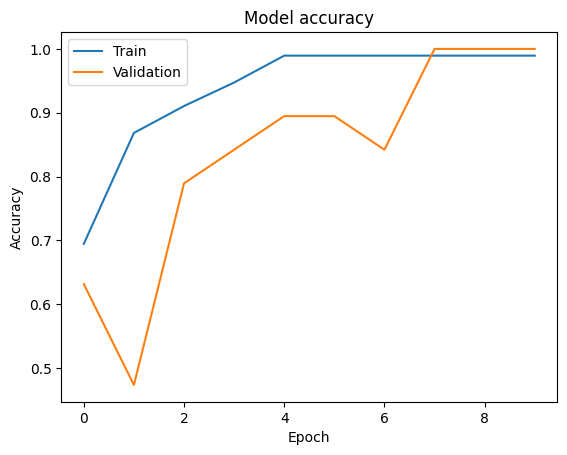

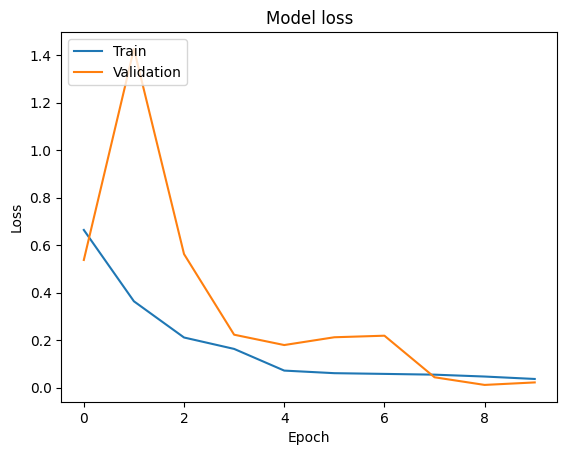

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9000 - loss: 0.1947
Test Loss: 0.19470098614692688
Test Accuracy: 0.8999999761581421
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Test_Time(Sec) : 0.1869044303894043
Manual Accuracy: 0.9
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 


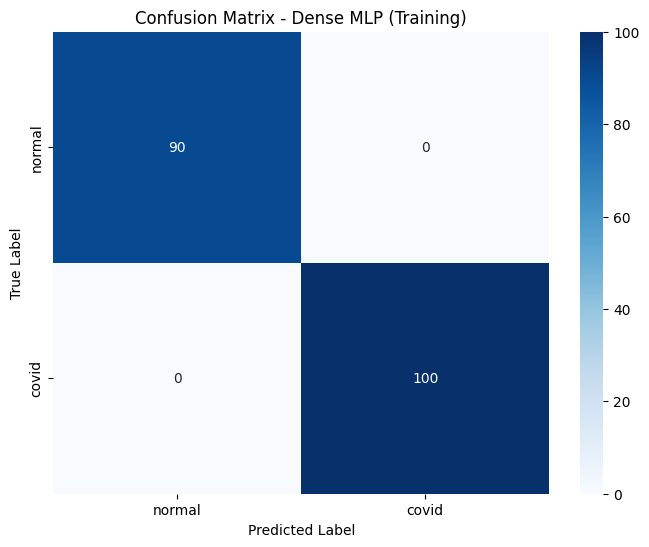

<Figure size 640x480 with 0 Axes>

Classification Accuracy: 0.9000
Classification precision: 0.9167
Classification recall: 0.9000
Classification f_score: 0.8990
[[ 8  2]
 [ 0 10]]
Enter results path:D:\MinorProj\Samp_dsss\2cls_cn\samp_op
label_dic1 before:  {0: 'normal', 1: 'covid'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Validation ROC saved at: D:\MinorProj\Samp_dsss\2cls_cn\samp_op\ValidationMLPROC.png
Adding Confusion Matrix image from: D:\MinorProj\Samp_dsss\2cls_cn\samp_op\Test_Confusion_Matrix.png
Adding ROC image from: D:\MinorProj\Samp_dsss\2cls_cn\samp_op\TestMLPROC.png
Excel file saved successfully at D:\MinorProj\Samp_dsss\2cls_cn\samp_op\Results.xlsx
Process completed successfully.
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Training ROC saved at: D:\MinorProj\Samp_dsss\2cls_cn\samp_op\TrainingMLPROC.png


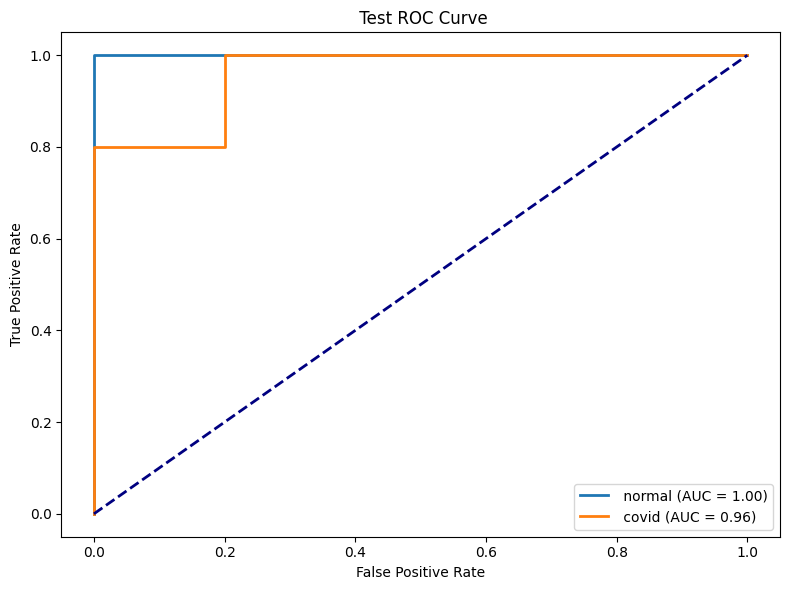

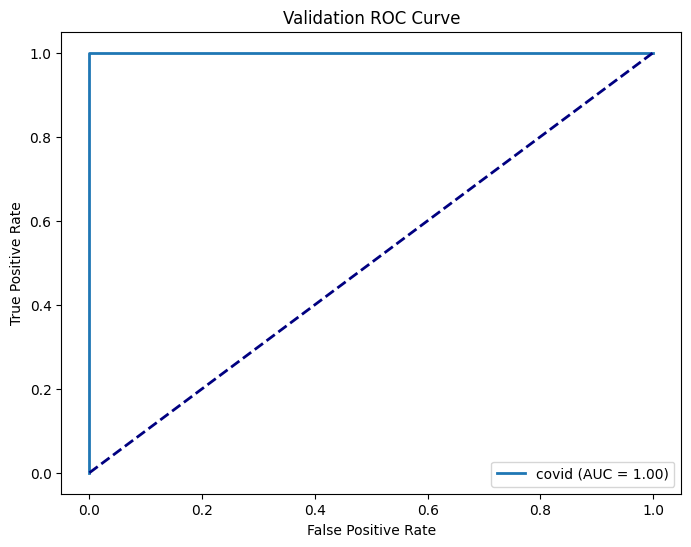

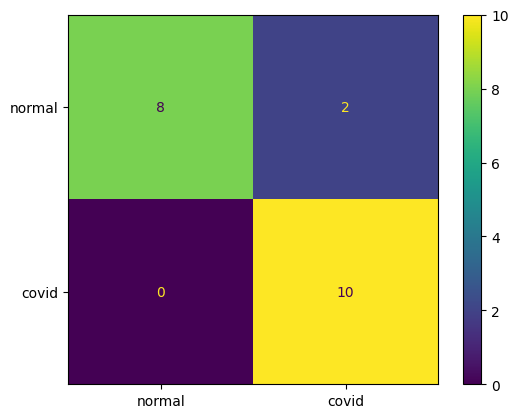

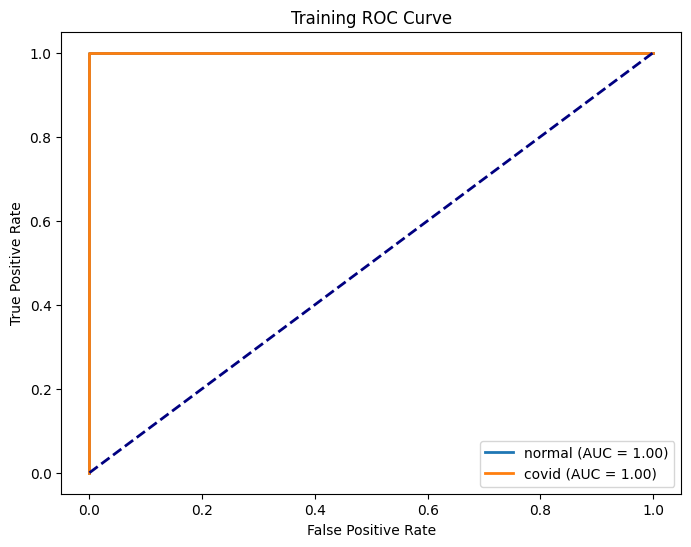

In [48]:
# opt=input("Consider MLP or not (Y/y or N/n): ")

if opt in ['y','Y']:
    input_dim = len(x_train.columns)
    def Normalization(X_Train):
        value_Train=[]
        key_Train=[]
        for i in(X_Train.columns):
            if X_Train[i].std()==0:
                key_Train.append(i)
                value_Train.append(X_Train[i].max())    
        X_Train=(X_Train-X_Train.min())/(X_Train.max()-X_Train.min())
        for i in (X_Train.columns):
            for j in range(len(key_Train)):
                if key_Train[j]==i:
                    if value_Train[j]<=0:
                        X_Train[i]=0
                    elif value_Train[j]>0:
                        X_Train[i]=1
        return X_Train
    def Standardization(X_Train):
        mean = np.mean(X_Train)
        std_dev = np.std(X_Train)
        z_scores = (X_Train - mean) / std_dev
        return z_scores
    def Quantile_Transform(X_Train):
        # Replace NaN and Inf values
        X_Train = np.nan_to_num(X_Train, nan=0.0, posinf=1e308, neginf=-1e308)

        # Initialize Quantile Transformer
        quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)

        # Transform the data
        transformed_data = quantile_transformer.fit_transform(X_Train)

        # Convert back to a DataFrame if the input was a DataFrame
        if isinstance(X_Train, pd.DataFrame):
            X_QT = pd.DataFrame(transformed_data, columns=X_Train.columns)
        else:
            X_QT = transformed_data  # Return as ndarray if input was ndarray

        return X_QT


    def generate_layer_config(initial_units, num_layers, decay_factor=0.5, activation="relu", dropout=0.3, batch_norm=True):
        """
        Generate a dynamic layer configuration.

        Args:
        - initial_units: int, number of units in the first layer.
        - num_layers: int, total number of layers to generate.
        - decay_factor: float, factor by which the number of units decreases for each subsequent layer.
        - activation: str, activation function for all layers.
        - dropout: float, dropout rate for each layer.
        - batch_norm: bool, whether to include BatchNormalization in each layer.

        Returns:
        - layer_config: list of dicts, where each dict defines a layer.
        """
        layer_config = []
        units = initial_units

        for _ in range(num_layers):
            layer_config.append({
                "units": int(units),
                "activation": activation,
                "dropout": dropout,
                "batch_norm": batch_norm
            })
            units *= decay_factor  # Reduce the number of units for the next layer

        return layer_config

    # Example usage


    # Build the model using the dynamically generated layer_config
    # input_dim = 100  # Example input dimension
    # output_dim = 3   # Number of output classes
    # model = build_model(input_dim, layer_config, output_dim, learning_rate=0.001)

    # Print the model summary

    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy

    def build_model(input_dim, layer_config, output_dim, learning_rate=0.001):
        """
        Build a Sequential model based on the layer configuration provided.

        Args:
        - input_dim: int, the dimension of the input features.
        - layer_config: list of dicts, where each dict defines a layer. Example:
            [
                {"units": 1024, "activation": "relu", "dropout": 0.3, "batch_norm": True},
                {"units": 512, "activation": "relu", "dropout": 0.3, "batch_norm": True},
            ]
        - output_dim: int, number of output neurons (e.g., 3 for 3 classes).
        - learning_rate: float, the learning rate for the Adam optimizer.

        Returns:
        - model: Compiled Keras Sequential model.
        """
        model = Sequential()

        # Add the input layer and the first hidden layer
        model.add(Dense(layer_config[0]['units'], input_dim=input_dim, activation=layer_config[0]['activation']))
        if 'dropout' in layer_config[0]:
            model.add(Dropout(layer_config[0]['dropout']))
        if 'batch_norm' in layer_config[0] and layer_config[0]['batch_norm']:
            model.add(BatchNormalization())

        # Add subsequent hidden layers
        for layer in layer_config[1:]:
            model.add(Dense(layer['units'], activation=layer['activation']))
            if 'dropout' in layer:
                model.add(Dropout(layer['dropout']))
            if 'batch_norm' in layer and layer['batch_norm']:
                model.add(BatchNormalization())

        # Add the output layer
        if output_dim == 1 or output_dim==2:
            model.add(Dense(output_dim, activation='sigmoid'))
            model.compile(optimizer=Adam(learning_rate=learning_rate), 
                      loss=BinaryCrossentropy(), 
                      metrics=['accuracy'])
        else:
            model.add(Dense(output_dim, activation='softmax'))
            model.compile(optimizer=Adam(learning_rate=learning_rate), 
                      loss=CategoricalCrossentropy(), 
                      metrics=['accuracy'])
        # Compile the model

        return model

    # Example configuration
    # layer_config = [
    #     {"units": 120, "activation": "relu", "dropout": 0.3, "batch_norm": True},
    #     {"units": 84, "activation": "relu", "dropout": 0.3, "batch_norm": True},

    # ]
    x_t=x_f

    # Build the model
    initial_units = int(input("Enter the units for Initial Layer"))  # Number of units in the first layer
    num_layers = int(input("enter layer size") )       # Total number of layers
    decay_factor = 0.5    # Halve the units with each layer
    layer_config = generate_layer_config(initial_units, num_layers, decay_factor)
    print("Generated Layer Config:")
    print(layer_config)
    #input_dim = int(input("Enter the input dimension"))  # Example input dimension
    
    output_dim = int(input("Enter the output dimension"))   # Number of output classes
    # output_dim=len(df['Label'].unique())
    model = build_model(input_dim, layer_config, output_dim, learning_rate=0.001)
    no_of_epochs = int(input('Enter the number of epochs: '))

    # Print the model summary
    model.summary()

    batch_size=int(input('enter the batch size: '))
    type(batch_size)


    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    import pandas as pd
    df=x_train
    global label_dic
    label_mapping = label_dic.copy()
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    df=df_tr
#     df2=df_val
    # Encode labels for the primary dataset (create a copy to avoid modifying the original)
    df_copy = df.copy()
    df_copy['Label'] = label_encoder.fit_transform(df_copy['Label'])

    # If the dataset type is "2", encode labels for the secondary dataset
    if p == "1":
        df2=df_val
        df2_copy = df2.copy()
        df2_copy['Label'] = label_encoder.transform(df2_copy['Label'])

    # Split data based on the dataset type
    if p == "1":
        # For "2", use the entire primary dataset as the training set
        X = df_copy.iloc[:, :-1]
#         x_df=X
        Y = df_copy['Label']
        train_df = pd.DataFrame(X, columns=df_copy.columns[:-1])
        train_df['Label'] = Y
        print("Train Dataset", train_df['Label'].value_counts())

        # Use the secondary dataset as the validation set
        X_val = df2_copy.iloc[:, :-1]
        Y_val = df2_copy['Label']
        Validation_set = pd.DataFrame(X_val, columns=df2_copy.columns[:-1])
        Validation_set['Label'] = Y_val
        print("Validation_set Dataset", Validation_set['Label'].value_counts())
    else:
        # For other cases, split the primary dataset into train and validation sets
        X = df_copy.iloc[:, :-1]
        Y = df_copy['Label']
        X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)
#         x_df=X_train
        train_df = pd.DataFrame(X_train, columns=df_copy.columns[:-1])
        train_df['Label'] = Y_train
        print("Train Dataset", train_df['Label'].value_counts())

        Validation_set = pd.DataFrame(X_val, columns=df_copy.columns[:-1])
        Validation_set['Label'] = Y_val
        print("Validation_set Dataset", Validation_set['Label'].value_counts())


    # Function to prompt user and apply the selected transformer
    def apply_transformer_ds(X_val, X_train):
#         print("Choose a Normalization to apply:")
#         print("1: Min Max Normalization")
#         print("2: Standardization")
#         print("3: Quantile Transformation")
#         global choice_norm
#         choice_norm = input("Enter your choice (1/2/3): ").strip()

    #     global norm_type = choice

        if choice_norm == "1":
            print("Applying Normalization...")
            X_val = Normalization(X_val)
            X_train = Normalization(X_train)
        elif choice_norm == "2":
            print("Applying Standardization...")
            X_val = Standardization(X_val)
            X_train = Standardization(X_train)
#             X_train=abs(X_train)
#             X_val=abs(X_val)
        elif choice_norm == "3":
            print("Applying Quantile Transformation...")
            X_val = Quantile_Transform(X_val)
            X_train = Quantile_Transform(X_train)
        else:
            print("Invalid choice. Defaulting to Quantile Transformation.")
            X_val = Quantile_Transform(X_val)
            X_train = Quantile_Transform(X_train)

        return X_val, X_train

    X_val=Validation_set.iloc[:,:-1]
    # X_val=Quantile_Transform(X_val)
    y_val=Validation_set['Label']
    y_val = tf.keras.utils.to_categorical(y_val, num_classes=output_dim)

    X_train=df.iloc[:,:-1]
    # X_train=Quantile_Transform(X_train)
    y_train=df['Label']
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=output_dim)

    # Apply the selected transformer
#     X_val, X_train = apply_transformer_ds(X_val, X_train)
#     X_train=x_t
#     X_val=x_v

    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    before_memory = psutil.Process().memory_info().rss
    start=time.time()
    global mlp_X_train
    # Fit the model with early stopping callback
    X_train=abs(X_train)
    X_val=abs(X_val)
    mlp_X_train = X_train
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=no_of_epochs,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping])
    after_memory = psutil.Process().memory_info().rss
    memory_used=after_memory-before_memory
    end=time.time()
    print("Memory_Used (MB):",memory_used/(1024*1024))
    print("Train_Time(Sec) :", (end-start))


    import pickle
    import os

    # Take input for the base path
    model_path = input("Enter the base path where you want to save the model: ")

    # Ensure the base path exists
    if not os.path.exists(model_path):
        os.makedirs(model_path)

    # Define the file names
    filename_sav = os.path.join(model_path, "MLP.sav")
    filename_h5 = os.path.join(model_path, "MLP.h5")

    # Save the model in both formats
    pickle.dump(model, open(filename_sav, 'wb'))
    pickle.dump(model, open(filename_h5, 'wb'))

    print(f"Model saved as .sav at: {filename_sav}")
    print(f"Model saved as .h5 at: {filename_h5}")

    import matplotlib.pyplot as plt

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    model_acc_image_path = os.path.join(model_path,'Model_Accuracy.png')
    plt.savefig(model_acc_image_path)
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    model_loss_image_path = os.path.join(model_path,'Model_Loss.png')
    plt.savefig(model_loss_image_path)
    plt.show()


    import tensorflow as tf
    from sklearn.metrics import accuracy_score

    # Assuming you have trained the model and X_train, y_train are your training data
    # X_test and y_test are your test data
    # Also assuming normalization was applied to X_train, so apply the same transformation to X_test
    
    def ts_apply_transformer_ds(x_test):
#         print("Choose a Normalization to apply:")
#         print("1: Min Max Normalization")
#         print("2: Standardization")
#         print("3: Quantile Transformation")
#         global choice_norm
#         choice_norm = input("Enter your choice (1/2/3): ").strip()

    #     global norm_type = choice

        if choice_norm == "1" or choice_norm==1:
            print("Applying Normalization...")
            x_test = Normalization(x_test)
        elif choice_norm == "2" or choice_norm==2:
            print("Applying Standardization...")
            x_test = Standardization(x_test)
#             X_train=abs(X_train)
#             X_val=abs(X_val)
        elif choice_norm == "3" or choice_norm==3:
            print("Applying Quantile Transformation...")
            x_test = Quantile_Transform(x_test)
        else:
            print("Invalid choice. Defaulting to Quantile Transformation.")
            x_test = Quantile_Transform(x_test)

        return x_test
    
    
    df1=df_ts
    
    #df1['Label']=[0 if x == 'BENIGN' else 1 for x in df1['Label']]
    X_test = df1.iloc[:,:-1]
    y_test=df1['Label']
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(df1['Label'].unique()))
    # Preprocess X_test if needed (e.g., normalization, scaling)
    X_test=abs(X_test)
    
#     X_test = Quantile_Transform(X_test)  # Make sure the normalization is consistent with the training data
#     X_test = ts_apply_transformer_ds(X_test)
    
    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

    # Make predictions on test data
    start=time.time()
    y_pred = model.predict(X_test, batch_size=batch_size)
    end=time.time()
    print("Test_Time(Sec) :", (end-start))
    # Convert predictions to binary (0 or 1) using a threshold of 0.5
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Print first 10 predictions
    #print(f"Predictions (binary): {y_pred_binary[:112611]}")

    # Calculate accuracy manually (optional)
    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f"Manual Accuracy: {accuracy}")


    if p=="1":
        val_metrics = dmclslb_metrics(x_v, y_val, y_val_pred, [], "Dense MLP", model, np.unique(y_val),dataset_name="Validation",model_path=model_path,label_dic=label_dic)

    y_train_pred = model.predict(X_train, batch_size=batch_size)
    # Call the metrics function for training and test data
    train_metrics = dmclslb_metrics(X_train, y_train, y_train_pred, [], "Dense MLP", model, np.unique(y_train),dataset_name="Training",model_path=model_path,label_dic=label_dic)
#     test_metrics = dmclslb_metrics(X_test, y_test, y_pred, [], "Dense MLP", model, np.unique(y_test),dataset_name="Testing",model_path=model_path,label_dic=label_dic)

    # Display confusion matrix and ROC curve for each dataset
    plt.show()  # Display all the figures (train, test, and validation metrics)
        
    
    
    
    from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score
    import numpy as np
    y_test_labels = np.argmax(y_test, axis=1)  # [1, 2, 0, 1]

    # Get predicted class labels
    y_pred_labels = np.argmax(y_pred_binary, axis=1)  # [1, 2, 0, 1]

    # Calculate accuracy
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average='macro')  # 'macro' for multi-class
    recall = recall_score(y_test_labels, y_pred_labels, average='macro')  # 'macro' for multi-class
    f_score = f1_score(y_test_labels, y_pred_labels, average='macro')
    print(f"Classification Accuracy: {accuracy:.4f}")
    print(f"Classification precision: {precision:.4f}")
    print(f"Classification recall: {recall:.4f}")
    print(f"Classification f_score: {f_score:.4f}")
    print(confusion_matrix(y_test_labels, y_pred_labels))

    def TP(cm):
        true_positives = np.diag(cm)
    #     for i, count in enumerate(true_positives):
    #         print(f"True Positives for class {i}: {count}")
        return true_positives
    def true_negatives(cm):
        tn_list = []
        for i in range(len(cm)):
            # Sum all the elements of the confusion matrix
            total_sum = np.sum(cm)
            # Subtract the sum of the i-th row and i-th column and add the diagonal element
            tn = total_sum - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])
            tn_list.append(tn)
        return np.array(tn_list)
    def false_positives(cm):
        fp_list = []
        for i in range(len(cm)):
            # Sum the elements of the i-th column and subtract the diagonal element
            fp = np.sum(cm[:, i]) - cm[i, i]
            fp_list.append(fp)
        return np.array(fp_list)
    def false_negatives(cm):
        fn_list = []
        for i in range(len(cm)):
            # Sum the elements of the i-th row and subtract the diagonal element
            fn = np.sum(cm[i, :]) - cm[i, i]
            fn_list.append(fn)
        return np.array(fn_list)


    def Evaluation_Metrics(cm,Label):
        false_negatives_list = false_negatives(cm)
        false_positives_list = false_positives(cm)
        true_negatives_list = true_negatives(cm)
        true_positives = np.diag(cm)
        SN=[]
        SP=[]
        Pre=[]
        Acc=[]
        Fscore=[]
        BA=[]
        TPR=[]
        FPR=[]
        for TP,FN,FP,TN in zip(true_positives,false_negatives_list,false_positives_list,true_negatives_list):
            sn=TP/(TP+FN)
            sp=TN/(FP+TN)
            pr=TP/(TP+FP)
            acc=(TP+TN)/(TP+TN+FP+FN)
            fpr=(FP/(FP+TN))
            TPR.append(sn)
            FPR.append(FPR)
            SN.append(sn)
            SP.append(sp)
            Pre.append(pr)
            Acc.append(acc)
            Fscore.append(2*(pr*sn)/(pr+sn))
            BA.append((sn+sp)/2)
        #ROC_AUC(FPR, TPR,Label)
        C_M=pd.DataFrame()
        C_M['Label']=Label
        C_M['TP']=true_positives
        C_M['FP']=false_positives_list
        C_M['TN']=true_negatives_list
        C_M['FN']=false_negatives_list
        C_M['Sensitivity']=SN
        C_M['Specificity']=SP
        C_M['Precision']=Pre
        C_M['Accuracy']=Acc
        C_M['F_Score']=Fscore
        C_M['Balance_Accuracy']=BA
        return C_M

    from sklearn.metrics import roc_curve, auc

    def metrics(x, y, y_pred, clf_name, clf, class_labels):
        y_prob = clf.predict(x)
        # if len(class_labels)>2:
        #     y_prob = np.argmax(y_prob, axis=1)
        # print(y_prob)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i, class_label in enumerate(class_labels):
            fpr[i], tpr[i], _ = roc_curve(y == i , y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        fig_roc, ax_roc = plt.subplots(figsize=(8, 6))
        for i, class_label in enumerate(class_labels):
            ax_roc.plot(
                fpr[i], tpr[i], lw=2,
                label=' {} (AUC = {:.2f})'.format(class_labels[i], roc_auc[i]))
        ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax_roc.set_xlabel('False Positive Rate')
        ax_roc.set_ylabel('True Positive Rate')
        ax_roc.set_title(' {}'.format(clf_name))
        ax_roc.legend(loc='lower right')

        plt.tight_layout()

        return fig_roc


    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    import os

    def generate_validation_roc(X_val, y_val, model, label, current_directory):
        # Predict probabilities for validation data
        y_val_pred = model.predict(X_val, batch_size=batch_size)

        # Generate Validation ROC Metrics
        fpr_val = dict()
        tpr_val = dict()
        roc_auc_val = dict()

        # Check if the problem is binary or multiclass
        num_classes = len(label)  # Number of classes

        # If binary classification, reshape y_val and y_val_pred
        if num_classes == 2:
            # For binary classification, the model will return 2 columns (probabilities for class 0 and class 1)
            # Use the second column (class 1) for the ROC curve
            y_val_pred = y_val_pred[:, 1]  # Get probabilities for class 1 (positive class)
            y_val = (y_val == 1).astype(int)  # Ensure y_val is in binary format (0 or 1)

            # Compute ROC curve for binary classification
            fpr_val[1], tpr_val[1], _ = roc_curve(y_val, y_val_pred)
            roc_auc_val[1] = auc(fpr_val[1], tpr_val[1])
        else:
            # For multiclass classification, iterate through each class
            # Ensure that y_val is in one-hot encoded format if it's not already
            if len(y_val.shape) == 1 or y_val.shape[1] == 1:
                # If y_val is not one-hot encoded, we can convert it to one-hot encoding
                from sklearn.preprocessing import LabelBinarizer
                lb = LabelBinarizer()
                y_val = lb.fit_transform(y_val)

            for i, class_label in enumerate(label):
                # Compute ROC curve for each class
                fpr_val[i], tpr_val[i], _ = roc_curve(y_val[:, i], y_val_pred[:, i])
                roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

        # Plot Validation ROC
        fig_roc_val, ax_roc_val = plt.subplots(figsize=(8, 6))

        if num_classes == 2:
            # For binary classification, only plot class 1
            ax_roc_val.plot(fpr_val[1], tpr_val[1], lw=2, label=f'{label[1]} (AUC = {roc_auc_val[1]:.2f})')
        else:
            # For multiclass, plot all classes
            for i, class_label in enumerate(label):
                ax_roc_val.plot(fpr_val[i], tpr_val[i], lw=2, label=f'{label[i]} (AUC = {roc_auc_val[i]:.2f})')

        ax_roc_val.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax_roc_val.set_xlabel('False Positive Rate')
        ax_roc_val.set_ylabel('True Positive Rate')
        ax_roc_val.set_title('Validation ROC Curve')
        ax_roc_val.legend(loc='lower right')

        # Save Validation ROC
        roc_val_image_path = os.path.join(current_directory, 'ValidationMLPROC.png')
        fig_roc_val.savefig(roc_val_image_path)
        print(f"Validation ROC saved at: {roc_val_image_path}")

        return roc_val_image_path

    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
    import xlwings as xw

    def save_excel_with_xlwings(current_directory, cm_image_path, roc_image_path, C_M, y_true_labels, y_pred_labels, label):
        try:
            # Initialize workbook and sheet
            app = xw.App(visible=False)  # Start Excel in the background
            wb = app.books.add()
            sheet = wb.sheets[0]

            # Add metrics and labels
            sheet.range('A22').value = 'Test_results'
            sheet.range('A24').value = C_M    
            sheet.range('N24').value = "Overall_Accuracy"
            sheet.range('N25').value = accuracy_score(y_true_labels, y_pred_labels)
            sheet.range('O24').value = "Precision"
            sheet.range('O25').value = precision_score(y_true_labels, y_pred_labels, average='weighted')
            sheet.range('P24').value = "Recall"
            sheet.range('P25').value = recall_score(y_true_labels, y_pred_labels, average='weighted')
            sheet.range('Q24').value = "F-Score"
            sheet.range('Q25').value = f1_score(y_true_labels, y_pred_labels, average='weighted')

            # Add images to the Excel sheet
            if os.path.exists(cm_image_path):
                print(f"Adding Confusion Matrix image from: {cm_image_path}")
                sheet.pictures.add(cm_image_path,
                                   left=sheet.range('B30').left,
                                   top=sheet.range('B30').top,
                                   width=400,
                                   height=300)
            else:
                print(f"Error: Confusion Matrix image not found at {cm_image_path}")

            if os.path.exists(roc_image_path):
                print(f"Adding ROC image from: {roc_image_path}")
                sheet.pictures.add(roc_image_path,
                                   left=sheet.range('L30').left,
                                   top=sheet.range('L30').top,
                                   width=400,
                                   height=300)
            else:
                print(f"Error: ROC image not found at {roc_image_path}")

            # Save the Excel file
            excel_file_path = os.path.join(current_directory, 'Results.xlsx')
            wb.save(excel_file_path)
            print(f"Excel file saved successfully at {excel_file_path}")
            wb.close()
            app.quit()
        except Exception as e:
            print(f"Error while creating Excel file: {e}")

    # Ensure the directory exists
    current_directory = input('Enter results path:')
    if not os.path.exists(current_directory):
        os.makedirs(current_directory)
        print(f"Directory created at: {current_directory}")

    # Label mapping and metrics calculation
    # label_dic = { 'normal':0, 'covid':1, 'pneumonia':2}
    label_dic1 = {}
    for i in label_dic:
        if label_dic[i] not in label_dic1:
            label_dic1[label_dic[i]] = i
    print('label_dic1 before: ', label_dic1)

    label_mapping = label_dic1.copy()
    label = list(label_dic1.values())
    label1 = list(label_mapping.values())

    ROC_FIG = metrics(X_test, y_test_labels, y_pred_labels, "Test ROC Curve", model, label1)

    y_val = np.argmax(y_val, axis=1)
    # print('X_val: ', X_val.shape)
    # print('y_val_shape: ', y_val.shape)
    # print('y_val: ', y_val)
    # Generate Validation ROC and save it
    validation_roc_image_path = generate_validation_roc(X_val, y_val, model, label1, current_directory)

    # Save ROC figure to the directory
    roc_image_path = os.path.join(current_directory, 'TestMLPROC.png')
    ROC_FIG.savefig(roc_image_path)

    # print('y_test_labels: ',y_test_labels)
    # Convert labels for confusion matrix
    # print('label_mapping: ', label)
    y_true_labels = [label_mapping[val] for val in y_test_labels.tolist()]
    # print('y_true_labels: ', y_true_labels)
    y_pred_labels = [label_mapping[val] for val in y_pred_labels]

    # Compute confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=label1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label1)

    # Plot and save confusion matrix image
    disp.plot(values_format='.0f')
    plt.xlabel('')
    plt.ylabel('')
    cm_image_path = os.path.join(current_directory, 'Test_Confusion_Matrix.png')
    plt.savefig(cm_image_path)

    # Calculate evaluation metrics
    C_M = Evaluation_Metrics(cm, label)

    # Save results to Excel
    save_excel_with_xlwings(current_directory, cm_image_path, roc_image_path, C_M, y_true_labels, y_pred_labels, label)

    print("Process completed successfully.")

    # Generate ROC for Training Set
    def generate_train_roc(X_train, y_train, model, label, current_directory):
        y_train_pred = model.predict(X_train, batch_size=batch_size)

        # Generate Training ROC Metrics
        fpr_train = dict()
        tpr_train = dict()
        roc_auc_train = dict()

        for i, class_label in enumerate(label):
            fpr_train[i], tpr_train[i], _ = roc_curve(y_train[:, i], y_train_pred[:, i])
            roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

        # Plot Training ROC
        fig_roc_train, ax_roc_train = plt.subplots(figsize=(8, 6))
        for i, class_label in enumerate(label):
            ax_roc_train.plot(
                fpr_train[i], tpr_train[i], lw=2,
                label=f'{label[i]} (AUC = {roc_auc_train[i]:.2f})')

        ax_roc_train.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax_roc_train.set_xlabel('False Positive Rate')
        ax_roc_train.set_ylabel('True Positive Rate')
        ax_roc_train.set_title('Training ROC Curve')
        ax_roc_train.legend(loc='lower right')

        # Save Training ROC
        roc_train_image_path = os.path.join(current_directory, 'TrainingMLPROC.png')
        fig_roc_train.savefig(roc_train_image_path)
        print(f"Training ROC saved at: {roc_train_image_path}")

        return roc_train_image_path

    # Generate Training ROC and save it
    training_roc_image_path = generate_train_roc(X_train, y_train, model, label1, current_directory)



In [49]:
def s_generate_cwt_images_scales(img_path, scales=[32, 64, 128], kernel_size=32):
    cwt_images = []
    input_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    for scale in scales:
        kernel = s_generate_2d_kernel_scales(kernel_size, scale)

        # Resize image to match the kernel size if needed
        image_resized = cv2.resize(input_image, (kernel_size, kernel_size))

        # Direct pixel-wise multiplication with the kernel
        kernel_cropped = kernel[:kernel_size, :kernel_size]  # Ensure kernel matches image size
        result = image_resized * kernel_cropped

        # Normalize and colorize the result
        normalized = cv2.normalize(result, None, 0, 1, cv2.NORM_MINMAX)
        colorized = (normalized * 255).astype(np.uint8)
        colorized = cv2.applyColorMap(colorized, cv2.COLORMAP_JET)

        cwt_images.append(colorized)

    return cwt_images



    
def f_process_images(path, size, k, window_size=0, additional_datasets=[]):
    data = []
        

    image_p = cv2.imread(path, 0)

    if k>=0 and k<=13 or (k>=15 and k<=34) :
        image = cv2.resize(image_p, (size, size))
        # Ensure image is of type float
        image = image.astype(np.float32)
        
        rdeig = [np.linalg.matrix_rank(image)]
        rdeig.append(np.linalg.det(image))
        rdeig.append(image.trace())
        eva, evec = np.linalg.eig(image)
        eva = sorted(eva, reverse=True)
        #             rdeig += [abs(i) if isinstance(i, complex) else i for i in eva]
        rdeig +=[np.abs(i) if np.iscomplex(i) else i for i in eva]
        
        image_flattened = image.flatten()
    
    if k == 0:
    #                 Only image pixels
        features = image_flattened
    
    elif k == 1:
    #             Pixels+Matrix Properties
        features = np.append(image_flattened, rdeig)
#         features = np.append(features)
    
    elif k == 2:
    #                 Only Matrix Properties
#         features = np.append(rdeig)
        features = rdeig
        features = np.array(features)

        features = features.astype(np.float32)
    #                 print(features)
    #                 features = np.clip(features, a_min=min(rdeig), a_max=max(rdeig))
    #                 print(len(features))
    
    elif k == 3:                
    #                 Layer1:- Matrix Properties with a given window size and reshaping the obatined properties to a matrix and using those matrix properties
        # (n-f+1)^2 * (f+3) features
        if char=='n'or char=='N':
            window_size = window_size_original
        feature_vector,feature_vector2,mxm_matrix = layer(image, window_size)
#         features = np.append(feature_vector)
        features = feature_vector

    elif k == 4:
        # ((n-f+1)^2 * (f+3)) + (n+3) features
        if char=='n'or char=='N':
            window_size = window_size_original
        feature_vector,feature_vector2,mxm_matrix = layer(image, window_size)
        feature_vector2 = np.append(feature_vector2, rdeig)
#         features = np.append(feature_vector2)
        features = feature_vector2

    elif k == 5:
        # m+3 features
        if char=='n'or char=='N':
            window_size = window_size_original
        feature_vector,feature_vector2,mxm_matrix = layer(image, window_size)
        determinant, trace, rank, eigenvalues = calculate_matrix_properties(mxm_matrix)
        features = []
        features.extend([determinant, trace, rank] + list(eigenvalues))
        features = np.array(features)
#         features = np.append(features)
        features = features

    elif k == 6:
        # (m-n+1)^2 * (n+3) features
        if char=='y'or char=='Y':
            feature_vector,square_vector,mxm_matrix = layer(image, window_size)
            feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size)
        else:
            feature_vector,square_vector,mxm_matrix = layer(image, window_size_original)
            feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size_mxm)
        
#         features = np.append(feature_vector2)
        features = feature_vector2
        
    elif k == 7:
        # ((m-n+1)^2 * (n+3)) + (m+3) features
        if char=='y'or char=='Y':
            feature_vector,square_vector,mxm_matrix = layer(image, window_size)
            feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size)
        else:
            feature_vector,square_vector,mxm_matrix = layer(image, window_size_original)
            feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size_mxm)
        determinant, trace, rank, eigenvalues = calculate_matrix_properties(mxm_matrix)
        features = feature_vector2.copy()
        new_features = np.array([determinant, trace, rank] + list(eigenvalues))
        features = np.append(features, new_features)
        features = np.array(features)
#         features = np.append(features)
        features = features

    elif k == 8:
        # g+3 features
        if char=='y'or char=='Y':
            feature_vector,square_vector,mxm_matrix = layer(image, window_size)
            feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size)
        else:
            feature_vector,square_vector,mxm_matrix = layer(image, window_size_original)
            feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size_mxm)
        determinant, trace, rank, eigenvalues = calculate_matrix_properties(gxg_matrix)
        features = []
        features.extend([determinant, trace, rank] + list(eigenvalues))
        features = np.array(features)
#         features = np.append(features)
        features = features
        
    elif k == 9:
        # (g-m+1)^2 * (m+3) features
        if char=='y'or char=='Y':
            feature_vector,square_vector,mxm_matrix = layer(image, window_size)
            feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size)
            feature_vector3,square_vector3,temp = layer(gxg_matrix,window_size)
        else:
            feature_vector,square_vector,mxm_matrix = layer(image, window_size_original)
            feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size_mxm)
            feature_vector3,square_vector3,temp = layer(gxg_matrix,window_size_gxg)
#         features = np.append(feature_vector3)
        features = feature_vector3

    elif k == 10:
        # ((g-m+1)^2 * (m+3)) + (g+3) features
        if char=='y'or char=='Y':
            feature_vector,square_vector,mxm_matrix = layer(image, window_size)
            feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size)
            feature_vector3,square_vector3,temp = layer(gxg_matrix,window_size)
        else:
            feature_vector,square_vector,mxm_matrix = layer(image, window_size_original)
            feature_vector2,square_vector2,gxg_matrix = layer(mxm_matrix, window_size_mxm)
            feature_vector3,square_vector3,temp = layer(gxg_matrix,window_size_gxg)
        determinant, trace, rank, eigenvalues = calculate_matrix_properties(gxg_matrix)
        features = feature_vector3
#         features.extend([determinant, trace, rank] + list(eigenvalues))
        features = np.append(features, [determinant, trace, rank] + list(eigenvalues))

        features = np.array(features)
#         features = np.append(features)
        features = features
    
    elif k == 11:
         # 5887 + 35 features
        if char=='n'or char=='N':
            window_size = window_size_original
        feature_vector,feature_vector2,mxm_matrix = layer(image, window_size)
        feature_vector = np.append(feature_vector, rdeig)
#         features = np.append(feature_vector)
        features = feature_vector
    
    elif k == 12:
        conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(image, window_size_original)
        spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(image, window_size_original)
        
        conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
        spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
        
        conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
        spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
        
        conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
        spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
        
        conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
        spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
        
        conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
        spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
        
        conditionalNumberArray, conditional_matrix, feature_vector_conditional = condition_number_layer(conditional_matrix, window_size_original)
        spectralNumberArray, spectral_matrix, feature_vector_spectral = spectral_number_layer(spectral_matrix, window_size_original)
        
        charecteristicPolynomial = characteristic_polynomial_coefficients(image)
        length1 = len(charecteristicPolynomial)
#         for i in range(length1, len(image.shape[0])):
        for i in range(length1, image.shape[0]):
            charecteristicPolynomial.append(0)
        
        charecteristicPolynomial = np.array(charecteristicPolynomial)
        features_eva = np.append(eva,charecteristicPolynomial)
        features = np.append(feature_vector_conditional,feature_vector_spectral)
#         features = np.append(features)
        features = features
        
    elif k == 13:
        charecteristicPolynomial = characteristic_polynomial_coefficients_layer(image, window_size_original)
        # print(charecteristicPolynomial)
        
        features = charecteristicPolynomial
        
        conditionalNumberArray, conditionalMatrix, conditionalNumber = condition_number_layer(image, window_size_original) 
        
        features = np.append(features, conditionalNumberArray)
        
        spectralNumberArray, spectralMatrix, spectralNumber = spectral_number_layer(image, window_size_original)
        
        features = np.append(features, spectralNumberArray)
        
#         features = np.append(features)
        features = features
        
    elif k ==14:
        
        size = size1
        kernel_size = kernel_size1
        target_size = target_size1
        filter_choice = filter_choice1
        
        if filter_choice == 'all':
            l1 = ["sobel", "scharr", "roberts", "laplacian", "unsharp", "highpass", "lowpass"]  
            features = []
            for i in l1:
                # image = load_image(image_p)
                image = applyFilter(image_p, target_size, i, kernel_size)
                
                spectralNumber = spectral_norm(image)
    
                conditionNumber = condition_number(image)
    
                charecteristicPolynomial = characteristic_polynomial_coefficients(image)
    
                features1 = charecteristicPolynomial
    
                features1 = np.append(features1, conditionNumber)
    
                features1 = np.append(features1, spectralNumber)

                for val1 in features1:
                    features.append(val1)
                
                
            # features.append(int(di))
            features=features
        
        else:
            # image = load_image(image_p)
            image = applyFilter(image_p, target_size, filter_choice, kernel_size)
            
            # image = image.astype(np.float32)
    
            spectralNumber = spectral_norm(image)
    
            conditionNumber = condition_number(image)
    
            charecteristicPolynomial = characteristic_polynomial_coefficients(image)
    
            features = charecteristicPolynomial
    
            features = np.append(features, conditionNumber)
    
            features = np.append(features, spectralNumber)
            
#             features = np.append(features)
            features=features
            
    elif k==15:
        features=[]
        x=image.copy()
        
        for i in range(3):
            
            
            spectralNumber = spectral_norm(image)
    
            conditionNumber = condition_number(image)
    
            charecteristicPolynomial = characteristic_polynomial_coefficients(image)

            smith_diagonal=smith_normal_form(image)
    
            features1 = charecteristicPolynomial
    
            features1 = np.append(features1, conditionNumber)
    
            features1 = np.append(features1, spectralNumber)

            for val1 in smith_diagonal:
                features.append(val1)

            for val1 in features1:
                features.append(val1)
            image=np.dot(image,x)
            image=normalize_matrix_to_255(image)
            # print(image)
            
        # features.append(int(di))
    elif k==16:
        features=[]
        x=image
        
        for i in range(1):
            
            
            spectralNumber = spectral_norm(image)
    
            conditionNumber = condition_number(image)
    
            charecteristicPolynomial = characteristic_polynomial_coefficients(image)

            smith_diagonal=smith_normal_form(image)
    
            features1 = charecteristicPolynomial
    
            features1 = np.append(features1, conditionNumber)
    
            features1 = np.append(features1, spectralNumber)

            for val1 in smith_diagonal:
                features.append(val1)

            for val1 in features1:
                features.append(val1)
            image=np.dot(image,x)
            
        # features.append(int(di))

    elif k == 17:
        count = 0
        features = []
        A = image.copy()
        if np.linalg.det(A)!=0:
            count+=1
            
            A_inverse = np.linalg.inv(A)
    
            A_inverse = normalize_matrix_to_255(A_inverse)
    
            # A properties Extraction 
            characteristic_polynomial_A = characteristic_polynomial_coefficients(A)
            for val1 in characteristic_polynomial_A:
                features.append(val1)
            
            smith_diagonal_A = smith_normal_form(A)
            for val1 in smith_diagonal_A:
                features.append(val1)
            
            conditional_number_A = condition_number(A)
            features.append(conditional_number_A)
            
            spectral_Norm_A = spectral_norm(A)
            features.append(spectral_Norm_A)
    
            # A_inverse properties Extraction
            characteristic_polynomial_A_inverse = characteristic_polynomial_coefficients(A_inverse)
            for val1 in characteristic_polynomial_A_inverse:
                features.append(val1)
            
            smith_diagonal_A_inverse = smith_normal_form(A_inverse)
            for val1 in smith_diagonal_A_inverse:
                features.append(val1)
                
            conditional_number_A_inverse = condition_number(A_inverse)
            features.append(conditional_number_A_inverse)
            
            spectral_Norm_A_inverse = spectral_norm(A_inverse)
            features.append(spectral_Norm_A_inverse)
            
            # features.append(int(di))
    elif k == 18:
    #             Pixels+Matrix Properties
        features = np.append(image_flattened, rdeig)
        characteristic_polynomial = characteristic_polynomial_coefficients(image)
        for val1 in characteristic_polynomial:
            np.append(features,val1)
        # print(characteristic_polynomial)
#         features = np.append(features)
        features=features
        
    elif k == 19:
        features = np.append(image_flattened, rdeig)
        smith_normal_form_image = smith_normal_form(image)
        for val1 in smith_normal_form_image:
            features = np.append(features,val1)
        # print(characteristic_polynomial)
#         features = np.append(features)
        features=features
        
    elif k == 20:
        image = cv2.resize(image_p, (32, 32))
        image = image.astype(np.float32)
        rdeig = rdeigValues(image)
        smith_normal_form_image32 = smith_normal_form(image)
        features = np.append(rdeig, smith_normal_form_image32)
        
        image = cv2.resize(image_p, (64, 64))
        image = image.astype(np.float32)
        rdeig = rdeigValues(image)
        smith_normal_form_image64 = smith_normal_form(image)
        features = np.append(features, rdeig)
        features = np.append(features, smith_normal_form_image64)
        
        image = cv2.resize(image_p, (128, 128))
        image = image.astype(np.float32)
        rdeig = rdeigValues(image)
        smith_normal_form_image128 = smith_normal_form(image)
        features = np.append(features, rdeig)
        features = np.append(features, smith_normal_form_image128)
        
        image = cv2.resize(image_p, (224, 224))
        image = image.astype(np.float32)
        rdeig = rdeigValues(image)
        smith_normal_form_image224 = smith_normal_form(image)
        features = np.append(features, rdeig)
        features = np.append(features, smith_normal_form_image224)

#         features = np.append(features)
        features=features

    elif k == 21:
        if char=='n'or char=='N':
            window_size = window_size_original
        charecteristicPolynomial = characteristic_polynomial_coefficients_layer(image, window_size_original)
        features = charecteristicPolynomial
#         features = np.append(features)
        features=features

    elif k == 22:
        if char=='n'or char=='N':
            window_size = window_size_original
        minimumPolynomial = minimum_polynomial_coefficients_layer(image, window_size_original)
        features = minimumPolynomial
#         features = np.append(features)
        features=features
        
    elif k == 23:
        if char=='n'or char=='N':
            window_size = window_size_original
        charecteristicPolynomial = characteristic_polynomial_coefficients_layer(image, window_size_original)
        features = charecteristicPolynomial
        minimumPolynomial = minimum_polynomial_coefficients_layer(image, window_size_original)
        features = np.append(features, minimumPolynomial)
        feature_vector,feature_vector2,mxm_matrix = layer(image, window_size)
        features = np.append(features, feature_vector)
#         features = np.append(features)
        features=features
        
    elif k==24:
        features = image_flattened
        
        for img in additional_datasets:
            img = cv2.resize(img, (size, size)).astype(np.float32)  # Resize image to square

            # Compute matrix properties
            rdeig = [np.linalg.matrix_rank(img)]  # Rank
            rdeig.append(np.linalg.det(img))      # Determinant
            rdeig.append(img.trace())             # Trace

            # Eigenvalues
            eigenvalues, _ = np.linalg.eig(img)
            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)

            # Extend the result list with eigenvalues
            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

            # Append matrix properties to the feature set
            features = np.concatenate((features, rdeig), axis=0)

#             features.extend(rdeig)

        
#         features = np.append(features)

    elif k==25:
        # features = image_flatt
        features = rdeig
        # features = features.astype(np.float32)
        for img in additional_datasets:
            img = cv2.resize(img, (size, size)).astype(np.float32)  # Resize image to square

            # Compute matrix properties
            rdeig = [np.linalg.matrix_rank(img)]  # Rank
            rdeig.append(np.linalg.det(img))      # Determinant
            rdeig.append(img.trace())             # Trace

            # Eigenvalues
            eigenvalues, _ = np.linalg.eig(img)
            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)

            # Extend the result list with eigenvalues
            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

            # Append matrix properties to the feature set
            features.extend(rdeig)
        
#         features = np.append(features)

    elif k==26:
        features = image_flattened
        features = np.append(features, rdeig)
        # features = np.append(features)
        
        # features = features.astype(np.float32)
        for img in additional_datasets:
            img = cv2.resize(img, (size, size)).astype(np.float32)  # Resize image to square

            # Compute matrix properties
            rdeig = [np.linalg.matrix_rank(img)]  # Rank
            rdeig.append(np.linalg.det(img))      # Determinant
            rdeig.append(img.trace())             # Trace

            # Eigenvalues
            eigenvalues, _ = np.linalg.eig(img)
            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)

            # Extend the result list with eigenvalues
            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

            # Append matrix properties to the feature set
            features.extend(rdeig)
            
#         features = np.append(features)

    elif k==27:
        # features = image_flattened
        features = rdeig
        # features = np.append(features)
        
        for img in additional_datasets:
            img = cv2.resize(img, (size, size)).astype(np.float32)  # Resize image to square

            # Compute matrix properties
            rdeig = [np.linalg.matrix_rank(img)]  # Rank
            rdeig.append(np.linalg.det(img))      # Determinant
            rdeig.append(img.trace())             # Trace

            # Eigenvalues
            eigenvalues, _ = np.linalg.eig(img)
            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)

            # Extend the result list with eigenvalues
            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

            # Append matrix properties to the feature set
            features.extend(rdeig)
        
#         features = np.append(features)

    elif k==28:
        features = image_flattened
        features = np.append(features, rdeig)
        
        for img in additional_datasets:
            img = cv2.resize(img, (size, size)).astype(np.float32)  # Resize image to square

            # Compute matrix properties
            rdeig = [np.linalg.matrix_rank(img)]  # Rank
            rdeig.append(np.linalg.det(img))      # Determinant
            rdeig.append(img.trace())             # Trace

            # Eigenvalues
            eigenvalues, _ = np.linalg.eig(img)
            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)

            # Extend the result list with eigenvalues
            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

            # Append matrix properties to the feature set
            features.extend(rdeig)
        
#         features = np.append(features)

    elif k==29:
        # features = image_flattened
        #features = rdeig
        # features = np.append(features)
        features = []
        # features = features.astype(np.float32)
        for img in additional_datasets:
            img = cv2.resize(img, (size, size)).astype(np.float32)  # Resize image to square

            # Compute matrix properties
            rdeig = [np.linalg.matrix_rank(img)]  # Rank
            rdeig.append(np.linalg.det(img))      # Determinant
            rdeig.append(img.trace())             # Trace

            # Eigenvalues
            eigenvalues, _ = np.linalg.eig(img)
            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)

            # Extend the result list with eigenvalues
            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

            # Append matrix properties to the feature set
            features.extend(rdeig)
        
#         features = np.append(features)

    elif k==30:
        features=[]
        # features = np.append(features)
        # print('original 32x32: ', len(features))
        # features = features.astype(np.float32)
        for img in additional_datasets:
#             img = cv2.resize(img, (size, size)).astype(np.float32)  # Resize image to square

            # Compute matrix properties
            rdeig = [np.linalg.matrix_rank(img)]  # Rank
            rdeig.append(np.linalg.det(img))      # Determinant
            rdeig.append(img.trace())             # Trace

            # Eigenvalues
            eigenvalues, _ = np.linalg.eig(img)
            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)

            # Extend the result list with eigenvalues
            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

            # Append matrix properties to the feature set
            features.extend(rdeig)
     

    elif k == 31:
        # features = image_flattened
#         features = rdeig
        features=[]
        # features = np.append(features)
        # print('original 32x32: ', len(features))
        # features = features.astype(np.float32)
        for img in additional_datasets:
#             img = cv2.resize(img, (size, size)).astype(np.float32)  # Resize image to square

            # Compute matrix properties
            rdeig = [np.linalg.matrix_rank(img)]  # Rank
            rdeig.append(np.linalg.det(img))      # Determinant
            rdeig.append(img.trace())             # Trace

            # Eigenvalues
            eigenvalues, _ = np.linalg.eig(img)
            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)

            # Extend the result list with eigenvalues
            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

            # Append matrix properties to the feature set
            features.extend(rdeig)
        
#         features = np.append(features)
        
    elif k == 32:
        features = []
#         org_img_path = os.path.join(additional_datasets[0], di)
#         org_img_path = os.path.join(org_img_path, img_name)
#         if os.path.exists(org_img_path):
        org_image = cv2.imread(path).astype(np.float32)
        org_image = cv2.resize(org_image, (32, 32))
        for channel in range(3):
            channel_img = org_image[:, :, channel]
            
            org_img_flatten = channel_img.flatten()
            features = np.append(features, org_img_flatten)
                
        for img in range(1,len(additional_datasets)):
            
            img = cv2.resize(img, (32, 32))
            
            if len(img.shape) == 2:
                # Convert to 3D by adding a channel dimension (e.g., grayscale to RGB by replicating the channel)
                img = np.stack([img] * 3, axis=-1)
            img = cv2.resize(img, (32, 32))
            
            if len(img.shape) == 3:
                # Process each channel separately
                for channel in range(3):  # Assuming BGR channels
                    channel_image = img[:, :, channel]

                    # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
                    rdeig = [np.linalg.matrix_rank(channel_image)]
                    rdeig.append(np.linalg.det(channel_image))
                    rdeig.append(channel_image.trace())

                    # Eigenvalues
                    eigenvalues, _ = np.linalg.eig(channel_image)
                    sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
                    rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

                    # Append matrix properties for this channel to the feature set
                    features = np.append(features, rdeig)
            else:
                print("2d")
                    # print(len(features))
        # Append the label or identifier
#         features = np.append(features)
        
    elif k==33:
        features = image_flattened
        for img in additional_datasets:
            img = cv2.resize(img, (size, size)).astype(np.float32)  # Resize image to square

            # Compute matrix properties
            rdeig = [np.linalg.matrix_rank(img)]  # Rank
            rdeig.append(np.linalg.det(img))      # Determinant
            rdeig.append(img.trace())             # Trace

            # Eigenvalues
            eigenvalues, _ = np.linalg.eig(img)
            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)

            # Extend the result list with eigenvalues
            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

            # Append matrix properties to the feature set
            features.extend(rdeig)
        
#         features = np.append(features)

    elif k==34:
        features = image_flattened
        features = np.append(features, rdeig)
        
        # features = features.astype(np.float32)
        for img in additional_datasets:
            
            img = cv2.resize(img, (size, size)).astype(np.float32)

            # Compute matrix properties (rank, determinant, trace, sorted eigenvalues)
            rdeig = [np.linalg.matrix_rank(img)]
            rdeig.append(np.linalg.det(img))
            rdeig.append(img.trace())
        
            # Eigenvalues
            eigenvalues, _ = np.linalg.eig(img)
            sorted_eigenvalues = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
            rdeig.extend([np.abs(val) if np.iscomplex(val) else val for val in sorted_eigenvalues])

            # Append matrix properties to the feature set
            features = np.append(features, rdeig)
            img_flattened = img.flatten()
            features = np.append(features, img_flattened)
        
#         features = np.append(features)

    else:
        print("Invalid Input")
        
    data.append(features)
            # print(data)
    global xf_data
    xf_data=features
    return pd.DataFrame(data)

global path

if p == 0 or p==1:
    if k==27 or k == 28 or k==29:
        path = input("Enter the test image path :- ")
#         size = int(input("Enter the size :- ")) 
        
#         train_additional_dataset4 = input("Enter the train additional path4 :-")
#         train_additional_dataset5 = input("Enter the train additional path5 :-")
        cwt_images = s_generate_cwt_images_scales(path)
        variations = [cwt_images[0],cwt_images[1],cwt_images[2]]
        train_additional_dataset1 = variations[0]
        train_additional_dataset2 = variations[1]
        train_additional_dataset3 = variations[2]
#         append_train_image(path,size)
        train_df = f_process_images(path, size, k, window_size_original, [train_additional_dataset1, train_additional_dataset2, train_additional_dataset3])
    elif k==24 or k==25 or k==26 or k == 34:
        path = input("Enter the test image path :- ")
#         size = int(input("Enter the size :- "))
        image = cv2.imread(path, 0)
        
        train_additional_dataset1 = generate_scalogram_cwt(image, size)
        train_additional_dataset2 = generate_scalogram_stft(image, size)
        
#         append_train_image(path,size)
        train_df = f_process_images(path, size, k, window_size_original, [train_additional_dataset1, train_additional_dataset2])
    elif k == 14:
        path = input("Enter the test image path :- ")
#         append_train_image(path)
        train_df = f_process_images(path, 32, k, 32)
    
    elif k==30:
        path = input("Enter the test path of the image:- ")
        train_original_path_32 = path
        
        image = cv2.imread(path, 0)
        train_cwt_path_32 = generate_scalogram_cwt(image, 32)
        train_stft_path_32 = generate_scalogram_stft(image, 32)
        
        train_original_path_32 = cv2.resize(image, (32, 32))
        train_original_path_64 = cv2.resize(image, (64, 64))
        train_original_path_128 = cv2.resize(image, (128, 128))
        
        train_cwt_path_32 = cv2.resize(train_cwt_path_32, (32, 32))
        train_cwt_path_64 = cv2.resize(train_cwt_path_32, (64, 64))
        train_cwt_path_128 = cv2.resize(train_cwt_path_32, (128, 128))
        
        train_stft_path_32 = cv2.resize(train_stft_path_32, (32, 32))
        train_stft_path_64 = cv2.resize(train_stft_path_32, (64, 64))
        train_stft_path_128 = cv2.resize(train_stft_path_32, (128, 128))
        

#         append_train_image(train_original_path_32,32)
        train_df = f_process_images(path, 32, k, window_size_original, [train_original_path_32, train_original_path_64, train_original_path_128, train_cwt_path_32, train_cwt_path_64, train_cwt_path_128, train_stft_path_32, train_stft_path_64, train_stft_path_128])

    
    elif k==31:
#         train_original_path_32 = input("Enter the path of 32x32 image size:- ")
#         path = train_original_path_32
#         train_original_path_64 = input("Enter the path of 64x64 image size:- ")
#         train_original_path_128 = input("Enter the path of 128x128 image size:- ")
        
#         train_cwt_path_32 = input("Enter the cwt path of 32x32 image size:- ")
#         train_cwt_path_64 = input("Enter the cwt path of 64x64 image size:- ")
#         train_cwt_path_128 = input("Enter the cwt path of 128x128 image size:- ")

#         train_stft_path_32 = input("Enter the stft path of 32x32 image size:- ")
#         train_stft_path_64 = input("Enter the stft path of 64x364 image size:- ")
#         train_stft_path_128 = input("Enter the stft path of 128x128 image size:- ")
        
#         train_original_path_32 = cv2.imread(train_original_path_32, 0)
#         train_original_path_64 = cv2.imread(train_original_path_64, 0)
#         train_original_path_128 = cv2.imread(train_original_path_128, 0)

#         train_cwt_path_32 = cv2.imread(train_cwt_path_32, 0)
#         train_cwt_path_64 = cv2.imread(train_cwt_path_64, 0)
#         train_cwt_path_128 = cv2.imread(train_cwt_path_128, 0)

#         train_stft_path_32 = cv2.imread(train_stft_path_32, 0)
#         train_stft_path_64 = cv2.imread(train_stft_path_64, 0)
#         train_stft_path_128 = cv2.imread(train_stft_path_128, 0)
        path = input("Enter the test path of the image:- ")
        train_original_path_32 = path
        
        image = cv2.imread(path, 0)
        train_cwt_path_32 = generate_scalogram_cwt(image, 32)
        train_stft_path_32 = generate_scalogram_stft(image, 32)
        
        train_original_path_32 = cv2.resize(image, (32, 32))
        train_original_path_64 = cv2.resize(image, (64, 64))
        train_original_path_128 = cv2.resize(image, (128, 128))
        
        train_cwt_path_32 = cv2.resize(train_cwt_path_32, (32, 32))
        train_cwt_path_64 = cv2.resize(train_cwt_path_32, (64, 64))
        train_cwt_path_128 = cv2.resize(train_cwt_path_32, (128, 128))
        
        train_stft_path_32 = cv2.resize(train_stft_path_32, (32, 32))
        train_stft_path_64 = cv2.resize(train_stft_path_32, (64, 64))
        train_stft_path_128 = cv2.resize(train_stft_path_32, (128, 128))
        

#         append_train_image(train_original_path_32,32)
        train_df = f_process_images(path, 32, k, window_size_original, [train_original_path_32, train_original_path_64, train_original_path_128, train_cwt_path_32, train_cwt_path_64, train_cwt_path_128, train_stft_path_32, train_stft_path_64, train_stft_path_128])
    
    elif k==32:
        train_original_path_32 = input("Enter the test path of the image:- ")
        path = train_original_path_32
        image = cv2.imread(train_original_path_32, 0)
                
        train_cwt_path_32 = generate_scalogram_cwt(image, size)
        train_stft_path_32 = generate_scalogram_stft(image, size)
#         size = int(input("Enter the image size:- "))
#         append_train_image(train_original_path_32, size)
        train_df = f_process_images(train_original_path_32, size, k, window_size_original, [train_original_path_32, train_cwt_path_32, train_stft_path_32])
    
    elif k == 33:
        path = input("Enter the test image path :- ")
#         size = int(input("Enter the size :- ")) 
        train_additional_dataset1 = cv2.imread(input("Enter the additional path :-"), 0)
        # train_additional_dataset2 = input("Enter the train additional path2 :-")
#         append_train_image(path,size)
        train_df = f_process_images(path, size, k, window_size_original, [train_additional_dataset1])
        
    else:
        path = input("Enter the test image path :- ")
#         size = int(input("Enter the size :- "))
#         append_train_image(path,size)
        train_df = f_process_images(path, size, k, window_size_original)

    

    

    global f_x_data
    f_x_data=pd.DataFrame(train_df)


Enter the test image path :- D:\MinorProj\Samp_dsss\2cls_cn\cxr_samp\test\covid\Covid_146.png


C:\Users\dell\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2140: RuntimeWarning: overflow encountered in cast
  r = r.astype(result_t, copy=False)
C:\Users\dell\AppData\Local\Temp\ipykernel_18404\887319729.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  feature_matrix = feature_matrix.astype(np.uint8)


In [50]:
label_dict=label_dic
label_dict

{'normal': 0, 'covid': 1}

In [51]:
#Creation and storing of prototypes
import os
import numpy as np
import cv2
from sklearn.preprocessing import QuantileTransformer
from tqdm import tqdm
import pandas as pd
import joblib  # For loading sklearn models (if using sklearn models)


def px_process_image(image_path):
    features = []
    image = cv2.imread(image_path)
    # Resize image to 224x224 for consistency
    image_resized = cv2.resize(image, (224, 224))
    
    # Convert to grayscale if not already
    if len(image_resized.shape) == 3:
        image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image_resized
    
    # Flatten the grayscale image and add it to the feature list
    features.extend(image_gray.flatten())
    
    # Scale the features using QuantileTransformer
    transformer = QuantileTransformer(random_state=0)
    features = np.array(features).astype(np.float32)
    features[np.isinf(features)] = 255  # Replace infinities with a large number
    features_scaled = transformer.fit_transform(features.reshape(-1, 1))  # Scale features
    features_scaled = features_scaled.flatten()  # Flatten after scaling
    
    return features_scaled



# Function to load prototypes dynamically
def load_prototypes(load_path, label_dict):
    prototypes = {}
    for class_label, idx in label_dict.items():
        prototype_path = os.path.join(load_path, f'class_{idx}_prototype.npy')
        prototypes[class_label] = np.load(prototype_path)
    return prototypes

def load_prototypes(load_path, label_dict):
    prototypes = {}
    for class_label, idx in label_dict.items():
        prototype_path = os.path.join(load_path, f'class_{class_label}_prototype.npy')
        # Check if the prototype file exists before attempting to load
        if os.path.exists(prototype_path):
            prototypes[class_label] = np.load(prototype_path)
        else:
            print(f"Warning: Prototype file for class {class_label} not found at {prototype_path}")
            prototypes[class_label] = None  # You can decide what to do here, e.g., assign None
    return prototypes



# Function to classify images and create prototypes dynamically
def classify_and_create_prototype(model, train_features_df, dataset_path, label_dict):
    """
    Classify the images and create prototypes for each class dynamically.
    """
#     global 
    global class_prototypes  # Declare class_prototypes as global

    # Extract features and labels from the dataframe
    features = df_xx.iloc[:, :-1].values
#     features = df.iloc[1:, :-1].values
    labels = df_xx.iloc[:, -1].values

#     Extract features and labels from the dataframe
#     features = f_all_df.iloc[1:, :-1].values
#     labels = f_all_df.iloc[1:, -1].values

    # Initialize prototypes dictionary based on label_dict
    prototypes = {label: [] for label in label_dict.keys()}

    # Create list of folder paths corresponding to classes
    class_folders = {label: os.path.join(dataset_path, label) for label in label_dict.keys()}

    # Initialize a list to track the index of images in each class folder
    folder_indices = {label: 0 for label in label_dict.keys()}
    print("folder_indices: ",folder_indices)
    # Iterate through the features and match the images
    for idx, feature_set in tqdm(enumerate(features), desc="Processing Features"):
        # Convert the class label from float to integer
        class_label = int(labels[idx])  # Ensure it's an integer

        # Map integer labels to class names
        class_name = [key for key, value in label_dict.items() if value == class_label][0]
        # Get the folder for the current class
        img_folder = class_folders[class_name]

        # Ensure the folder exists
        if not os.path.exists(img_folder):
            print(f"Folder not found for class {class_name}: {img_folder}")
            continue

        # List all image files in the folder and ensure order is consistent
#         img_files = sorted(os.listdir(img_folder))
        img_files = os.listdir(img_folder)

        # Track the current image index for the class
        current_index = folder_indices[class_name]

        # Check if we have enough images in the folder to match the CSV row
        if current_index >= len(img_files):
#             print(f"Mismatch: Not enough images for row {idx} in class {class_name}.")
            continue

        img_name = img_files[current_index]
        img_path = os.path.join(img_folder, img_name)

        # Process the image to get its features
        img_features = px_process_image(img_path)
        
        if img_features is not None:

            
            input_data = feature_set.reshape(1, -1)


            # Step 5: Make prediction
            prediction = model.predict(input_data)
            if opt in ['y','Y']:
                predicted_class = np.argmax(prediction)
            else:
                predicted_class = prediction

            # If correctly classified, append the features to the respective class prototype
            predicted_class_name = [key for key, value in label_dict.items() if value == predicted_class][0]

            if predicted_class_name == class_name:
#                 print("pcn: ",predicted_class_name)
#                 print("cn: ",class_name)
                    
                prototypes[class_name].append(img_features)
                    

            # Increment the index for the current class folder
            folder_indices[class_name] += 1

    # Calculate mean for each class prototype and update the global class_prototypes
    class_prototypes = {cls: np.mean(features, axis=0) for cls, features in prototypes.items() if features}
    print("Class Prototypes Created Successfully.")

    return class_prototypes




# Main script
if __name__ == "__main__":
    global select_vis_type
    select_vis_type = int(input("Select Visualization techique:\n1. SVD Based Visualization\n2. Prototype Based Visualization Technique\n"))
        
    if select_vis_type == 2:
        opc = int(input("1. Build Prototype 2. Use Specific Paths: ").strip())

        # Global variable
        global prototypes

        if opc == 1:
            # User inputs
            dataset_path = input("Enter the path to the dataset folder (e.g., 'train'): ").strip()
            prot_save_path = input("Please enter the directory path to save the prototypes: ")

  
            print("Label Dictionary:", label_dict)



            # Generate prototypes
            prototypes = classify_and_create_prototype(model, df_xx, dataset_path, label_dict)
            
#             prot_save_path = input("Please enter the directory path to save the prototypes: ")
            # Ensure the directory exists
            if not os.path.exists(prot_save_path):
                os.makedirs(prot_save_path)
            # Assuming prototypes is a dictionary with class labels as keys and prototype data as values
            for class_label, prototype in prototypes.items():
                prototype_path = os.path.join(prot_save_path, f"class_{class_label}_prototype.npy")
                np.save(prototype_path, np.array(prototype))
                print(f"Saved prototype for Class {class_label} as '{prototype_path}'")

            print(f"Prototypes saved to {prot_save_path}")


        elif opc == 2:

            print("Label Dictionary:", label_dict)

            # Path for loading prototypes
            load_path = input("Enter the path to the folder containing prototypes: ").strip()

            
            prototypes = load_prototypes(load_path, label_dict)

            # Print loaded prototypes
            for class_label, prototype in prototypes.items():
                if prototype is not None:
                    print(f"Loaded Prototype for Class {class_label}")
                else:
                    print(f"Prototype for Class {class_label} not found.")


Select Visualization techique:
1. SVD Based Visualization
2. Prototype Based Visualization Technique
2
1. Build Prototype 2. Use Specific Paths: 1
Enter the path to the dataset folder (e.g., 'train'): D:\MinorProj\Samp_dsss\2cls_cn\cxr_samp\train
Please enter the directory path to save the prototypes: D:\MinorProj\Samp_dsss\2cls_cn\samp_op
Label Dictionary: {'normal': 0, 'covid': 1}
folder_indices:  {'normal': 0, 'covid': 0}


Processing Features: 0it [00:00, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 1it [00:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 2it [00:00,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Features: 3it [00:00,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Features: 4it [00:00,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Features: 5it [00:01,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Features: 6it [00:01,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 7it [00:01,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 8it [00:01,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 9it [00:01,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Features: 10it [00:01,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 11it [00:01,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Features: 12it [00:02,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 13it [00:02,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Features: 14it [00:02,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Features: 15it [00:02,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 16it [00:02,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Features: 18it [00:02,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 19it [00:02,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 20it [00:03,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Features: 21it [00:03,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 22it [00:03,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Features: 23it [00:03,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 24it [00:03,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 25it [00:03,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Features: 26it [00:03,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 27it [00:03,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Features: 28it [00:03,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 29it [00:04,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Features: 30it [00:04,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 31it [00:04,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 33it [00:04,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 34it [00:04,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Features: 35it [00:04,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Features: 36it [00:04,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Features: 37it [00:05,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 38it [00:05,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 39it [00:05,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 40it [00:05,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 41it [00:05,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Features: 42it [00:05,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 43it [00:05,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Features: 44it [00:05,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Features: 45it [00:05,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 46it [00:06,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 47it [00:06,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 48it [00:06,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Features: 49it [00:06,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Features: 51it [00:06,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 52it [00:06,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Features: 53it [00:06,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Features: 55it [00:06,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Features: 56it [00:07,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 57it [00:07,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Features: 58it [00:07,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Features: 59it [00:07,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Features: 60it [00:07,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 61it [00:07,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 62it [00:07,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 63it [00:07,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 64it [00:08,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Features: 65it [00:08,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 66it [00:08,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 67it [00:08,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Features: 68it [00:08,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Features: 69it [00:08,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 70it [00:08,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Features: 71it [00:08,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 72it [00:08,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 73it [00:09,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Features: 74it [00:09,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Features: 75it [00:09,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Features: 76it [00:09,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Features: 77it [00:09,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 78it [00:09,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Features: 79it [00:09,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Features: 80it [00:10,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Features: 81it [00:10,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Features: 82it [00:10,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Features: 83it [00:10,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Features: 84it [00:10,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Features: 85it [00:10,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Features: 86it [00:10,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Features: 87it [00:11,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Features: 88it [00:11,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Features: 89it [00:11,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Features: 90it [00:11,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Features: 91it [00:11,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Features: 92it [00:11,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Features: 93it [00:11,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Features: 94it [00:12,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Features: 95it [00:12,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Features: 96it [00:12,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 97it [00:12,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Features: 98it [00:12,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Features: 99it [00:12,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Features: 100it [00:12,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Features: 101it [00:13,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Features: 102it [00:13,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Features: 103it [00:13,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Features: 104it [00:13,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Features: 105it [00:13,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Features: 106it [00:13,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Features: 107it [00:13,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Features: 108it [00:14,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Features: 109it [00:14,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Features: 110it [00:14,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Features: 111it [00:14,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Features: 112it [00:14,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Features: 113it [00:14,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Features: 114it [00:14,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Features: 115it [00:15,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 116it [00:15,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 117it [00:15,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Features: 118it [00:15,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Features: 119it [00:15,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Features: 120it [00:15,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Features: 121it [00:15,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Features: 122it [00:15,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Features: 123it [00:15,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Features: 124it [00:16,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 125it [00:16,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 126it [00:16,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Features: 127it [00:16,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 128it [00:16,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 129it [00:16,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 130it [00:16,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Features: 131it [00:16,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Features: 132it [00:17,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 133it [00:17,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 134it [00:17,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Features: 135it [00:17,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 136it [00:17,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing Features: 137it [00:17,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Features: 138it [00:17,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 139it [00:17,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Features: 140it [00:18,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Features: 141it [00:18,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 142it [00:18,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Features: 143it [00:18,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Features: 144it [00:18,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing Features: 145it [00:18,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Features: 147it [00:18,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Features: 148it [00:18,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Features: 149it [00:19,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 150it [00:19,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 151it [00:19,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Features: 152it [00:19,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Features: 153it [00:19,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Features: 154it [00:19,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Features: 155it [00:19,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Features: 156it [00:19,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Features: 157it [00:20,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Features: 158it [00:20,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Features: 159it [00:20,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Features: 160it [00:20,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Features: 161it [00:20,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Features: 162it [00:20,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Features: 163it [00:20,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Features: 164it [00:20,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Features: 165it [00:21,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 166it [00:21,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Features: 167it [00:21,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Features: 168it [00:21,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Features: 169it [00:21,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Features: 170it [00:21,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 171it [00:21,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing Features: 172it [00:21,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Features: 173it [00:22,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 174it [00:22,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Features: 175it [00:22,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Features: 176it [00:22,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 177it [00:22,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Features: 178it [00:22,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Features: 179it [00:22,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Features: 180it [00:22,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Features: 181it [00:22,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Features: 183it [00:23,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Features: 184it [00:23,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Features: 185it [00:23,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Features: 186it [00:23,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing Features: 187it [00:23,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Features: 188it [00:23,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Features: 189it [00:23,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Features: 190it [00:24,  7.89it/s]

Class Prototypes Created Successfully.
Saved prototype for Class normal as 'D:\MinorProj\Samp_dsss\2cls_cn\samp_op\class_normal_prototype.npy'
Saved prototype for Class covid as 'D:\MinorProj\Samp_dsss\2cls_cn\samp_op\class_covid_prototype.npy'
Prototypes saved to D:\MinorProj\Samp_dsss\2cls_cn\samp_op


In [52]:
df_f=x_train

# if np.any(np.isnan(df_f)) or np.any(np.isinf(df_f)):
#     # Replace NaN and infinite values with 0
#     df_f = np.nan_to_num(df_f, nan=0.0, posinf=0.0, neginf=0.0)
    
# if np.iscomplexobj(df_f):
#     df_f = np.real(df_f)  # Use real part if it's complex


import numpy as np
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, StandardScaler

def minmax_Normalization(f, X_Train):

    # Ensure `f` is a NumPy array and reshape it if necessary
    f = np.asarray(f)

    # Ensure `x_train_min` and `x_train_max` are 1D arrays (with the same number of features as `f`)
    x_train_min = np.min(x_train, axis=0)
    x_train_max = np.max(x_train, axis=0)

    # Create mask for features with no variance (x_train_max == x_train_min)
    mask = x_train_max == x_train_min

    # Create an array to store the scaled values
    scaled_f = np.zeros(f.shape)

    # Reshape `f` to match the shape of `x_train_min` and `x_train_max` during scaling
    for i in range(f.shape[1]):
        if not mask[i]:  # Apply scaling only for features that have variance
            scaled_f[0, i] = (f[0, i] - x_train_min[i]) / (x_train_max[i] - x_train_min[i])
        else:
            scaled_f[0, i] = f[0, i]  # Keep original value if no variance (constant)

    # Handle NaN and infinite values
    scaled_f = np.nan_to_num(scaled_f, nan=0, posinf=999, neginf=-999)

    return scaled_f




def norm_Standardization(f, X_Train):

    # Ensure that `f` and `X_Train` are pandas DataFrames
    f = pd.DataFrame(f)
    X_Train = pd.DataFrame(X_Train)

    # Convert the DataFrames to numeric and handle errors by coercing invalid values
    X_Train = X_Train.apply(pd.to_numeric, errors='coerce').fillna(0)
    f = f.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Ensure f has the shape (1, 6272)
    if f.shape[0] != 1:
        f = f.T  



    # Calculate the mean and std of the training data along axis 0 (for each feature)
    mean_tr = X_Train.mean(axis=0)  # Mean along columns (features)
    std_tr = X_Train.std(axis=0)  # Std along columns (features)

    # Replace std of 0 with 1 to avoid division by zero
    std_tr[std_tr == 0] = 1

    # Apply the standardization (f - mean) / std to each feature (column-wise)
    standardized_f = (f - mean_tr.values) / std_tr.values  # Use .values to ensure NumPy array broadcasting


    # Handle NaN and infinite values by replacing them with 0 or special values
    standardized_f = np.nan_to_num(standardized_f, nan=0, posinf=999, neginf=-999)

    # Clip the standardized data to avoid extreme values
    standardized_f = np.clip(standardized_f, -1e10, 1e10)

    # If the standardized data contains complex values, take the absolute value
    standardized_f = np.abs(standardized_f) if np.iscomplexobj(standardized_f) else standardized_f

    # Return the standardized feature vector
    return standardized_f



def norm_Quantile_Transform(f, X_Train):
    
    x_train=X_Train
    if isinstance(x_train, pd.DataFrame):
        x_train = x_train.to_numpy()

    if isinstance(f, pd.DataFrame):
        f = f.to_numpy()
    x_train = np.real(x_train)
    f = np.real(f)

    x_train = np.nan_to_num(x_train, nan=0)
    x_train = np.clip(x_train, -1e10, 1e10)
    x_train = np.abs(x_train) if np.iscomplexobj(x_train) else x_train

    f = np.nan_to_num(f, nan=0)
    f = np.clip(f, -1e10, 1e10)
    f = np.abs(f) if np.iscomplexobj(f) else f

    # Initialize the QuantileTransformer and fit it on the training data
    transformer = QuantileTransformer(random_state=0)
    transformer.fit(x_train)  # Fitting transformer on the training data

    # Apply the transformer to the single test input (f)
    f_transformed = transformer.transform(f)

    return f_transformed




def apply_norm_technique(f, technique):
        
    
    if not isinstance(f, np.ndarray):
        f = np.array(f)
    f_reshaped = f.reshape(1, -1)

#     # Create a new DataFrame with reshaped data
    f_reshaped_df = pd.DataFrame(f_reshaped, columns=[f"Feature_{i}" for i in range(f_reshaped.shape[1])])

    # Display the reshaped DataFrame
#     f_reshaped_df
    

        
    if technique in {1, '1'}:  # Min-Max Scaling
        n_df = minmax_Normalization(f_reshaped_df, df_f)
        if isinstance(n_df, pd.DataFrame):  # If it's a pandas DataFrame
            n_array = n_df.to_numpy()
        else:  # It's already a numpy array
            n_array = n_df
        f_normalized = n_array
        
    elif technique in {2, '2'}:  # Standardization
        n_df = norm_Standardization(f_reshaped_df, df_f)
        n_df = np.nan_to_num(n_df, nan=0.0, posinf=1e308, neginf=-1e308)
        if isinstance(n_df, pd.DataFrame):  # If it's a pandas DataFrame
            n_array = n_df.to_numpy()
        else:  # It's already a numpy array
            n_array = n_df
        f_normalized = n_array
        
    elif technique in {3, '3'}:  # Quantile Transformation
        n_df = norm_Quantile_Transform(f_reshaped_df, df_f)
        if isinstance(n_df, pd.DataFrame):  # If it's a pandas DataFrame
            n_array = n_df.to_numpy()
        else:  # It's already a numpy array
            n_array = n_df
        f_normalized = n_array
        
    else:
        raise ValueError("Invalid normalization technique. Choose from '1', '2', or '3'.")
    
    return f_normalized

C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (190). n_quantiles is set to n_samples.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
normal Confidence Score: 24.5851%
covid Confidence Score: 75.4149%

Predicted class: covid
Confidence score of predicted class: 75.4149%


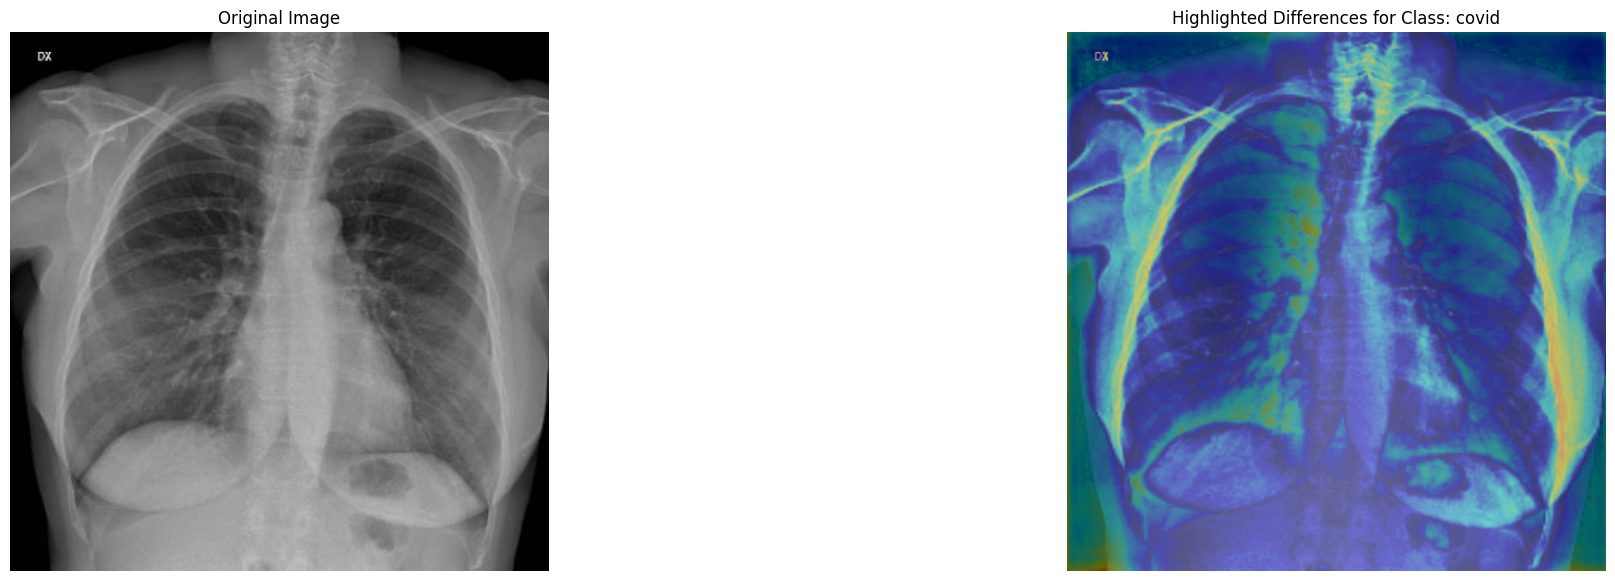

In [53]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import Normalize

#svd

import numpy as np
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt

# Function to preprocess the image
def svd_preprocess_image(image_path):
    # Step 1: Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found. Please check the path.")
    
    # Step 2: Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   
    # Step 3: Resize the image to 32x32
    resized_image = cv2.resize(gray_image, (32, 32))
    
    return resized_image

# Function to process the image and highlight differences with a heatmap
def process_image_with_svd_heatmap(image_path):
    
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orgimg_224x224 = cv2.resize(gray_image, (224, 224))
    
    # Preprocess the image
    image_32x32 = svd_preprocess_image(image_path)
    
    # Step 1: Perform SVD
    U, S, VT = np.linalg.svd(image_32x32, full_matrices=True)
    
    # Step 2: Retain top eigenvalue
    S_new = np.zeros_like(S)
    S_new[0] = S[0]  # Retain only the largest singular value
    S_matrix = np.diag(S_new[:1])  # Create a 1x1 diagonal matrix
    
    # Step 3: Modify U and VT
    U_new = U[:, :1]  # Retain the first column of U (32x1)
    VT_new = VT[:1, :]  # Retain the first row of V^T (1x32)
    
    # Step 4: Reconstruct the approximation
    A_approx = np.dot(U_new, np.dot(S_matrix, VT_new))
    
    # Step 5: Resize the reconstructed image to 224x224
    A_approx_224 = cv2.resize(A_approx, (224, 224))
    
    # Step 6: Compute the difference
    difference = np.abs(image_32x32 - A_approx)
    difference_224 = cv2.resize(difference, (224, 224))
    
    # Normalize the difference for heatmap
    normalized_diff = (difference_224 - np.min(difference_224)) / (np.max(difference_224) - np.min(difference_224))
    
    # Convert normalized difference to heatmap
    heatmap = cv2.applyColorMap((normalized_diff * 255).astype(np.uint8), cv2.COLORMAP_JET)
    
    # Overlay the heatmap on the reconstructed image
    overlay = cv2.addWeighted(cv2.cvtColor(A_approx_224.astype(np.uint8), cv2.COLOR_GRAY2BGR), 0.6, heatmap, 0.4, 0)

    # Visualization: only display original and heatmap images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(orgimg_224x224, cmap='gray')
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Highlighted Image")
    plt.imshow(overlay[..., ::-1])  # Convert BGR to RGB for display
    plt.axis("off")
    
    plt.show()


f=xf_data

#Prototype vis

def process_and_highlight_image(orgimg_path, predicted_class, prototypes, label_dict, save_to_pdf=False, pdf=None):
    """
    Process an image, highlight the differences with the prototype, and visualize the results.
    """

    def px_process_image(image):
        features = []
        # Resize the image
        image_resized = cv2.resize(image, (224, 224))
        
        # Convert to grayscale
        if len(image_resized.shape) == 3:
            image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        else:
            image_gray = image_resized
        
        # Flatten the image
        features.extend(image_gray.flatten())
        
        # Scale the features using QuantileTransformer
        transformer = QuantileTransformer(random_state=0)
        features = np.array(features).astype(np.float32)
        features[np.isinf(features)] = 255  # Handle infinities
        features_scaled = transformer.fit_transform(features.reshape(-1, 1))
        return features_scaled.flatten()

    def highlight_diff(test_features, prototype):
        """
        Calculate and visualize differences between the test features and the prototype.
        """
        # Separate pixel-level features from other features
        pixel_features = test_features[:50176]  # First 224x224 = 50176 values
        prototype_pixel_features = prototype[:50176]

        # Compute absolute differences
        diff_pixel_features = np.abs(pixel_features - prototype_pixel_features)

        # Normalize the differences
        diff_pixel_normalized = cv2.normalize(diff_pixel_features, None, 0, 255, cv2.NORM_MINMAX)

        # Reshape to image dimensions
        diff_pixel_image = diff_pixel_normalized.reshape(224, 224)

        # Create a heatmap
        heatmap_pixel = cv2.applyColorMap(diff_pixel_image.astype(np.uint8), cv2.COLORMAP_JET)

        return heatmap_pixel, diff_pixel_image

    # Check if the image path exists
    if not os.path.exists(orgimg_path):
        raise FileNotFoundError(f"The image file does not exist at: {orgimg_path}")

    # Read the image
    test_image = cv2.imread(orgimg_path)
    if test_image is None:
        raise ValueError(f"Failed to load image at: {orgimg_path}")

    # Process the image to extract features
    px_test_features = px_process_image(test_image)

    # Fetch the prototype for the predicted class
    predicted_class_name = [key for key, value in label_dict.items() if value == predicted_class]
    if not predicted_class_name:
        raise ValueError(f"Invalid predicted class: {predicted_class}")
    predicted_class_name = predicted_class_name[0]

    prototype = prototypes.get(predicted_class_name)
    if prototype is None:
        raise ValueError(f"No prototype found for class: {predicted_class_name}")

    # Highlight the differences between the test image and its prototype
    highlighted_image, matrix_diff_image = highlight_diff(px_test_features, prototype)

    # Prepare for visualization
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Resize the highlighted image to match the original image size
    highlighted_image_resized = cv2.resize(highlighted_image, (test_image.shape[1], test_image.shape[0]))

    # Convert to BGR if necessary
    if len(highlighted_image_resized.shape) == 2:
        highlighted_image_resized = cv2.cvtColor(highlighted_image_resized, cv2.COLOR_GRAY2BGR)

    # Overlay the heatmap on the original image
    alpha = 0.4
    overlay = cv2.addWeighted(test_image_rgb, 1 - alpha, highlighted_image_resized, alpha, 0)

    # Normalize for consistent visualization
    norm = Normalize(vmin=0, vmax=255)

    # Plot the results
    plt.figure(figsize=(25, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(test_image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB), cmap='jet', norm=norm)
    plt.title(f"Highlighted Differences for Class: {predicted_class_name}")
    plt.axis('off')

    # Save the visualization to a PDF if required
    if save_to_pdf and pdf is not None:
        pdf.savefig()
    plt.show()


# Example usage
if __name__ == "__main__":
#     orgimg_path = input("Enter the path to the test image: ").strip()
    orgimg_path = path

#     predicted_class = int(input("Enter the predicted class index: ").strip())
#     f = ExtractFeatures(orgimg_path)
#     feature_set_reshaped = f.reshape(-1, 1)
    
#     quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
#     transformed_feature_set = quantile_transformer.fit_transform(feature_set_reshaped)
#     transformed_feature_set_1d = transformed_feature_set.flatten()
    
#     input_data = transformed_feature_set_1d.reshape(1, -1)
#     print(f"Input shape for prediction: {input_data.shape}")
    
    
    # Apply the chosen normalization technique
#     norm_type=3
    if np.iscomplexobj(f):
        f = np.abs(f)  # Take the absolute value of complex numbers

    normalized_f = apply_norm_technique(f, choice_norm)
    if not isinstance(normalized_f, np.ndarray):
        normalized_f = np.array(normalized_f)
    normalized_f_reshaped = normalized_f.reshape(1, -1)
    input_data = normalized_f_reshaped
#     print(input_data)
    global gb_ip_ff
    gb_ip_ff=input_data
    
    if opt in ['n','N']:
        # Assuming prediction is a 2D array of shape (1, num_classes), i.e., (1, 2) for binary classification.
        prediction_probabilities = model.predict_proba(input_data)
    
    else:
        prediction_probabilities = model.predict(input_data)
        predicted_class = np.argmax(prediction_probabilities)
        
    # Check if the sum of probabilities is 1 (indicating they're already normalized)
    if np.abs(np.sum(prediction_probabilities, axis=1) - 1) > 1e-6:
        # Normalize the probabilities only if necessary
        prediction_probabilities = prediction_probabilities / np.sum(prediction_probabilities, axis=1, keepdims=True)
#         print("Normalization applied to probabilities.")
    else:
        prediction_probabilities = prediction_probabilities
#         print("Probabilities are already normalized.")

    # Print confidence score for each label using label_dic
    for i, confidence in enumerate(prediction_probabilities[0]):
        # Find class name from label_dic using index i
        class_name = [k for k, v in label_dic.items() if v == i][0]
        confidence_percentage = confidence * 100
        print(f"{class_name} Confidence Score: {confidence_percentage:.4f}%")

    # Get predicted class and its corresponding name
    predicted_class = np.argmax(prediction_probabilities)
    predicted_class_name = [k for k, v in label_dic.items() if v == predicted_class][0]

    # Get confidence score for the predicted class
    confidence_score = np.max(prediction_probabilities)
    print(f"\nPredicted class: {predicted_class_name}")
    print(f"Confidence score of predicted class: {confidence_score * 100:.4f}%")

    
    
    if select_vis_type == 1:
        process_image_with_svd_heatmap(orgimg_path)
    else:
        # Call the function
        process_and_highlight_image(orgimg_path, predicted_class, prototypes, label_dict)

    


normal Confidence Score: 0.2459
covid Confidence Score: 0.7541


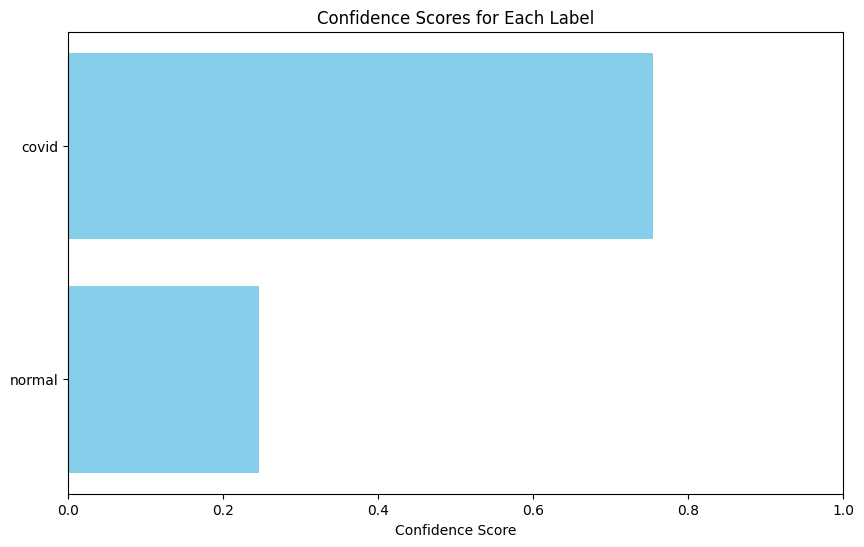

In [54]:
import matplotlib.pyplot as plt

# Assuming 'prediction' and 'label_dic' are defined

# Prepare the data
labels = []
confidence_scores = []
prediction=prediction_probabilities
for i, confidence in enumerate(prediction[0]):
    # Find class name from label_dic using index i
    class_name = [k for k, v in label_dic.items() if v == i][0]
    labels.append(class_name)
    confidence_scores.append(confidence)

# Print confidence scores
for class_name, confidence in zip(labels, confidence_scores):
    print(f"{class_name} Confidence Score: {confidence:.4f}")

# Create a bar chart to visualize the confidence scores
plt.figure(figsize=(10, 6))
plt.barh(labels, confidence_scores, color='skyblue')
plt.xlabel('Confidence Score')
plt.title('Confidence Scores for Each Label')
plt.xlim(0, 1)
plt.show()



# Standardization

In [54]:
def standardize(x_train, y_train, x_test, y_test, sheet_name, x_val=None, y_val=None):
    # Define classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(random_state=0),
        'Decision Tree': DecisionTreeClassifier(random_state=0),
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(probability=True),
        'LDA': LinearDiscriminantAnalysis(),
        'MLP': MLPClassifier(random_state=0),
        'QDA': QuadraticDiscriminantAnalysis(),
        'XGB': xgb.XGBClassifier()
    }

    # Convert data to numeric
    x_train = x_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    x_test = x_test.apply(pd.to_numeric, errors='coerce').fillna(0)
    if x_val is not None:
        x_val = x_val.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Calculate mean and std, handling cases where std is zero
    mean_tr = x_train.mean()
    std_tr = x_train.std().replace(0, 1)  # Replace 0 std with 1 to avoid division by zero

    mean_te = x_test.mean()
    std_te = x_test.std().replace(0, 1)

    x_tr = (x_train - mean_tr) / std_tr
    x_te = (x_test - mean_te) / std_te

    if x_val is not None:
        mean_va = x_val.mean()
        std_va = x_val.std().replace(0, 1)
        x_va = (x_val - mean_va) / std_va

    # Handle NaN and infinite values
    x_tr = np.nan_to_num(x_tr, nan=0, posinf=999, neginf=-999)
    x_te = np.nan_to_num(x_te, nan=0, posinf=999, neginf=-999)
    if x_val is not None:
        x_va = np.nan_to_num(x_va, nan=0, posinf=999, neginf=-999)

    x_tr = np.clip(x_tr, -1e10, 1e10)
    x_te = np.clip(x_te, -1e10, 1e10)
    if x_val is not None:
        x_va = np.clip(x_va, -1e10, 1e10)

    x_tr = np.abs(x_tr) if np.iscomplexobj(x_tr) else x_tr
    x_te = np.abs(x_te) if np.iscomplexobj(x_te) else x_te
    if x_val is not None:
        x_va = np.abs(x_va) if np.iscomplexobj(x_va) else x_va

    # Initialize result storage
    train_results, test_results, validation_results = [], [], []
    train_fig_cm, train_fig_roc = [], []
    test_fig_cm, test_fig_roc = [], []
    validation_fig_cm, validation_fig_roc = [], []

    class_labels = {1: 'COVID', 0: 'Normal', 2: 'Pneumonia', 3: 'Lung Opacity'}

    if np.array_equal(np.unique(y_train), [0, 2]):
        y_train = np.where(y_train == 2, 1, y_train)
        y_test = np.where(y_test == 2, 1, y_test)
        class_labels = {0: 'Normal', 1: 'Pneumonia'}
        if x_val is not None:
            y_val = np.where(y_val == 2, 1, y_val)
            
    if np.array_equal(np.unique(y_train), [1, 2]):
        y_train = np.where(y_train == 2, 0, y_train)
        y_test = np.where(y_test == 2, 0, y_test)
        class_labels = {1: 'Covid', 0: 'Pneumonia'}
        if x_val is not None:
            y_val = np.where(y_val == 2, 0, y_val)

    if np.array_equal(np.unique(y_train), [0, 3]):
        y_train = np.where(y_train == 3, 1, y_train)
        y_test = np.where(y_test == 3, 1, y_test)
        class_labels = {1: 'Asthama', 0: 'Normal'}
        if x_val is not None:
            y_val = np.where(y_val == 3, 1, y_val)

    if np.array_equal(np.unique(y_train), [1, 3]):
        y_train = np.where(y_train == 3, 0, y_train)
        y_test = np.where(y_test == 3, 0, y_test)
        class_labels = {1: 'Covid', 0: 'Asthama'}
        if x_val is not None:
            y_val = np.where(y_val == 3, 0, y_val)

    if np.array_equal(np.unique(y_train), [2, 3]):
        y_train = np.where(y_train == 2, 0, y_train)
        y_train = np.where(y_train == 3, 1, y_train)
        y_test = np.where(y_test == 2, 0, y_test)
        y_test = np.where(y_test == 3, 1, y_test)
        class_labels = {1: 'Asthama', 0: 'Pneumonia'}
        if x_val is not None:
            y_val = np.where(y_val == 2, 0, y_val)
            y_val = np.where(y_val == 3, 1, y_val)

    if np.array_equal(np.unique(y_train), [0, 1, 3]):
        y_train = np.where(y_train == 3, 2, y_train)
        y_test = np.where(y_test == 3, 2, y_test)
        class_labels = {1: 'Covid', 0: 'Normal', 2: 'Asthama'}
        if x_val is not None:
            y_val = np.where(y_val == 3, 2, y_val)

    # Create the CFM_ROC directory
    cfm_roc_dir = os.path.join(respath, 'Standardize', sheet_name, 'CFM_ROC')
    os.makedirs(cfm_roc_dir, exist_ok=True)
    save_features_to_csv(x_tr, y_train, os.path.join(modelpath,'StandardFeaturesTrain.csv'))
    save_features_to_csv(x_te, y_test, os.path.join(modelpath,'StandardFeaturesTest.csv'))
    if x_val is not None:
        print('x_val',type(x_val))
        print('y_val',type(y_val))
        save_features_to_csv(x_va, y_val, os.path.join(modelpath, 'StandardFeaturesValidate.csv'))

    for clf_name, clf in classifiers.items():
        print(clf_name)
        clf.fit(x_tr, y_train)
        pickle.dump(clf, open(os.path.join(modelpath, 'Standardize', sheet_name, f'{clf_name}.sav'), 'wb'))

        # Training predictions and metrics
        y_train_pred = clf.predict(x_tr)
        fig_cm_train, fig_roc_train = metrics(x_tr, y_train, y_train_pred, train_results, clf_name, clf, class_labels)
        train_fig_cm.append(fig_cm_train)
        train_fig_roc.append(fig_roc_train)

        # Testing predictions and metrics
        y_test_pred = clf.predict(x_te)
        fig_cm_test, fig_roc_test = metrics(x_te, y_test, y_test_pred, test_results, clf_name, clf, class_labels)
        test_fig_cm.append(fig_cm_test)
        test_fig_roc.append(fig_roc_test)

        # Validation predictions and metrics, only if validation data is provided
        if x_val is not None:
            y_val_pred = clf.predict(x_va)
            fig_cm_validation, fig_roc_validation = metrics(x_va, y_val, y_val_pred, validation_results, clf_name, clf, class_labels)
            validation_fig_cm.append(fig_cm_validation)
            validation_fig_roc.append(fig_roc_validation)
        else:
            validation_fig_cm.append(None)
            validation_fig_roc.append(None)

    train_results_df = pd.DataFrame(train_results)
    test_results_df = pd.DataFrame(test_results)
    validation_results_df = pd.DataFrame(validation_results)

    # Append '-standardize' to the sheet name
    sheet_name_standardize = f"{sheet_name}-standardize"

    with pd.ExcelWriter(f"{respath}.xlsx", mode='a', engine="openpyxl", if_sheet_exists='overlay') as writer:
        if sheet_name_standardize in writer.sheets:
            max_row = writer.sheets[sheet_name_standardize].max_row
        else:
            max_row = train_results_df.shape[0] + 2

        train_results_df.to_excel(writer, sheet_name=sheet_name_standardize, startrow=1, index=False)
        test_results_df.to_excel(writer, sheet_name=sheet_name_standardize, startrow=max_row + 2, index=False)
        max_row_val = max_row + test_results_df.shape[0] + 2
        if x_val is not None:
            validation_results_df.to_excel(writer, sheet_name=sheet_name_standardize, startrow=max_row_val + 2, index=False)

    # The remaining part of the function remains the same
    wb = xw.Book(f"{respath}.xlsx")
    sht = wb.sheets[sheet_name_standardize]

    # Formatting headers
    sht.range('A1').value = "Training"
    sht.range('A1').api.Font.Bold = True
    sht.range('A1').api.Interior.Color = 0xFFFF00

    sht.range(f'A{max_row + 2}').value = "Testing"
    sht.range(f'A{max_row + 2}').api.Font.Bold = True
    sht.range(f'A{max_row + 2}').api.Interior.Color = 0xFFFF00
    
    if x_val is not None:
        sht.range(f'A{max_row_val + 2}').value = "Validating"
        sht.range(f'A{max_row_val + 2}').api.Font.Bold = True
        sht.range(f'A{max_row_val + 2}').api.Interior.Color = 0xFFFF00

    sht.range(f'B{max_row_val + 14}').value = "Training"
    sht.range(f'B{max_row_val + 14}').api.Font.Bold = True
    sht.range(f'B{max_row_val + 14}').api.Interior.Color = 0xFFFF00

    sht.range(f'I{max_row_val + 14}').value = "Testing"
    sht.range(f'I{max_row_val + 14}').api.Font.Bold = True
    sht.range(f'I{max_row_val + 14}').api.Interior.Color = 0xFFFF00
    
    if x_val is not None:
        sht.range(f'N{max_row_val + 14}').value = "Validating"
        sht.range(f'N{max_row_val + 14}').api.Font.Bold = True
        sht.range(f'N{max_row_val + 14}').api.Interior.Color = 0xFFFF00

    c = max_row_val + 16

    # Save images in classifier-specific folders
    for clf_name, fig_cm_train, fig_roc_train, fig_cm_test, fig_roc_test, fig_cm_validation, fig_roc_validation in zip(classifiers.keys(), train_fig_cm, train_fig_roc, test_fig_cm, test_fig_roc, validation_fig_cm, validation_fig_roc):
        clf_dir = os.path.join(cfm_roc_dir, clf_name.replace(' ', '_'))
        os.makedirs(clf_dir, exist_ok=True)
        
        # Save training and testing images
        cm_train_path = os.path.join(clf_dir, f'train_cm_{clf_name.replace(" ", "_")}.png')
        cm_test_path = os.path.join(clf_dir, f'test_cm_{clf_name.replace(" ", "_")}.png')
        roc_train_path = os.path.join(clf_dir, f'train_roc_{clf_name.replace(" ", "_")}.png')
        roc_test_path = os.path.join(clf_dir, f'test_roc_{clf_name.replace(" ", "_")}.png')
        
        fig_cm_train.savefig(cm_train_path, bbox_inches='tight')
        fig_cm_test.savefig(cm_test_path, bbox_inches='tight')
        fig_roc_train.savefig(roc_train_path, bbox_inches='tight')
        fig_roc_test.savefig(roc_test_path, bbox_inches='tight')

        # Save validation images if available
        if x_val is not None:
            cm_validation_path = os.path.join(clf_dir, f'validation_cm_{clf_name.replace(" ", "_")}.png')
            roc_validation_path = os.path.join(clf_dir, f'validation_roc_{clf_name.replace(" ", "_")}.png')

            fig_cm_validation.savefig(cm_validation_path, bbox_inches='tight')
            fig_roc_validation.savefig(roc_validation_path, bbox_inches='tight')

        # Insert images into the Excel sheet
        sht.range(f'A{c}').value = f"{clf_name} - Confusion Matrix"
        sht.range(f'A{c}').api.Font.Color = 0xFF0000
        sht.pictures.add(cm_train_path, left=sht.range(f'B{c + 1}').left, top=sht.range(f'B{c + 1}').top, height=300, width=300)
        sht.pictures.add(cm_test_path, left=sht.range(f'I{c + 1}').left, top=sht.range(f'I{c + 1}').top, height=300, width=300)

        if x_val is not None:
            sht.pictures.add(cm_validation_path, left=sht.range(f'N{c + 1}').left, top=sht.range(f'N{c + 1}').top, height=300, width=300)

        c += 22
        sht.range(f'A{c}').value = f"{clf_name} - ROC Curve"
        sht.range(f'A{c}').api.Font.Color = 0xFF0000
        sht.pictures.add(roc_train_path, left=sht.range(f'B{c + 1}').left, top=sht.range(f'B{c + 1}').top, height=300, width=300)
        sht.pictures.add(roc_test_path, left=sht.range(f'I{c + 1}').left, top=sht.range(f'I{c + 1}').top, height=300, width=300)

        if x_val is not None:
            sht.pictures.add(roc_validation_path, left=sht.range(f'N{c + 1}').left, top=sht.range(f'N{c + 1}').top, height=300, width=300)

        c += 22

    wb.save()
    wb.close()
    print("Excel report has been generated and saved successfully.")

# MIN_MAX

In [55]:
def min_max(x_train, y_train, x_test, y_test, sheet_name, x_val=None, y_val=None):
    # Define classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(random_state=0),
        'Decision Tree': DecisionTreeClassifier(random_state=0),
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(probability=True),
        'LDA': LinearDiscriminantAnalysis(),
        'MLP': MLPClassifier(random_state=0),
        'QDA': QuadraticDiscriminantAnalysis(),
        'XGB': xgb.XGBClassifier()
    }

    # Convert any complex numbers to real
    x_train = np.real(x_train)
    x_test = np.real(x_test)
    if x_val is not None:
        x_val = np.real(x_val)

    # Convert data to NumPy array to avoid issues with SymPy objects
    x_train = np.asarray(x_train)
    x_test = np.asarray(x_test)
    if x_val is not None:
        x_val = np.asarray(x_val)

    # Min-max scaling
    def min_max_scale(data):
        data_min = np.min(data, axis=0)
        data_max = np.max(data, axis=0)

        # Check if any min and max are the same to avoid division by zero
        mask = data_max == data_min
        scaled_data = np.zeros(data.shape)
        if not mask.all():
            scaled_data[:, ~mask] = (data[:, ~mask] - data_min[~mask]) / (data_max[~mask] - data_min[~mask])
        return scaled_data

    # Apply the modified min-max scaling
    x_tr = min_max_scale(x_train)
    x_te = min_max_scale(x_test)
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    if x_val is not None:
        x_va = min_max_scale(x_val)
        y_val = y_val.astype(int)
    
    # Handle NaN and infinite values
    x_tr = np.nan_to_num(x_tr, nan=0, posinf=999, neginf=-999)
    x_te = np.nan_to_num(x_te, nan=0, posinf=999, neginf=-999)
    if x_val is not None:
        x_va = np.nan_to_num(x_va, nan=0, posinf=999, neginf=-999)
    
    # Optionally clip data to a reasonable range
    # x_tr = np.clip(x_tr, -1e10, 1e10)
    # x_te = np.clip(x_te, -1e10, 1e10)
    # if x_val is not None:
    #     x_va = np.clip(x_va, -1e10, 1e10)
    
    
    # Debugging step: Check for NaN values after scaling
    # print("Checking for NaN values after scaling...")
    # print("NaNs in x_train:", np.isnan(x_tr).sum())
    # print("NaNs in x_test:", np.isnan(x_te).sum())
    # if x_val is not None:
    #     print("NaNs in x_val:", np.isnan(x_va).sum())

    # Initialize result storage
    train_results, test_results, validation_results = [], [], []
    train_fig_cm, train_fig_roc = [], []
    test_fig_cm, test_fig_roc = [], []
    validation_fig_cm, validation_fig_roc = [], []

    class_labels = {1: 'COVID', 0: 'Normal', 2: 'Pneumonia', 3: 'Asthama'}

    if np.array_equal(np.unique(y_train), [0, 2]):
        y_train = np.where(y_train == 2, 1, y_train)
        y_test = np.where(y_test == 2, 1, y_test)
        class_labels = {0: 'Normal', 1: 'Pneumonia'}
        if x_val is not None:
            y_val = np.where(y_val == 2, 1, y_val)
            
    if np.array_equal(np.unique(y_train), [1, 2]):
        y_train = np.where(y_train == 2, 0, y_train)
        y_test = np.where(y_test == 2, 0, y_test)
        class_labels = {1: 'Covid', 0: 'Pneumonia'}
        if x_val is not None:
            y_val = np.where(y_val == 2, 0, y_val)

    if np.array_equal(np.unique(y_train), [0, 3]):
        y_train = np.where(y_train == 3, 1, y_train)
        y_test = np.where(y_test == 3, 1, y_test)
        class_labels = {1: 'Asthama', 0: 'Normal'}
        if x_val is not None:
            y_val = np.where(y_val == 3, 1, y_val)

    if np.array_equal(np.unique(y_train), [1, 3]):
        y_train = np.where(y_train == 3, 0, y_train)
        y_test = np.where(y_test == 3, 0, y_test)
        class_labels = {1: 'Covid', 0: 'Asthama'}
        if x_val is not None:
            y_val = np.where(y_val == 3, 0, y_val)

    if np.array_equal(np.unique(y_train), [2, 3]):
        y_train = np.where(y_train == 2, 0, y_train)
        y_train = np.where(y_train == 3, 1, y_train)
        y_test = np.where(y_test == 2, 0, y_test)
        y_test = np.where(y_test == 3, 1, y_test)
        class_labels = {1: 'Asthama', 0: 'Pneumonia'}
        if x_val is not None:
            y_val = np.where(y_val == 2, 0, y_val)
            y_val = np.where(y_val == 3, 1, y_val)

    if np.array_equal(np.unique(y_train), [0, 1, 3]):
        y_train = np.where(y_train == 3, 2, y_train)
        y_test = np.where(y_test == 3, 2, y_test)
        class_labels = {1: 'Covid', 0: 'Normal', 2: 'Asthama'}
        if x_val is not None:
            y_val = np.where(y_val == 3, 2, y_val)
    

    
    # Create the CFM_ROC directory
    cfm_roc_dir = os.path.join(respath, 'Min_max', sheet_name, 'CFM_ROC')
    os.makedirs(cfm_roc_dir, exist_ok=True)
    # print(x_tr.shape)
    # print(y_train.shape)
    # print()
    # print(type(x_tr))
    # print(type(y_train))
    save_features_to_csv(x_tr, y_train, os.path.join(modelpath,'MinMaxFeaturesTrain.csv'))
    save_features_to_csv(x_te, y_test, os.path.join(modelpath,'MinMaxFeaturesTest.csv'))

    if x_val is not None:
        save_features_to_csv(x_val, y_val, os.path.join(modelpath, 'MinMaxFeaturesValidate.csv'))

    for clf_name, clf in classifiers.items():
        print(clf_name)
        clf.fit(x_tr, y_train)
        pickle.dump(clf, open(os.path.join(modelpath, 'Min_max', sheet_name, f'{clf_name}.sav'), 'wb'))
        
        # Training predictions and metrics
        y_train_pred = clf.predict(x_tr)
        fig_cm_train, fig_roc_train = metrics(x_tr, y_train, y_train_pred, train_results, clf_name, clf, class_labels)
        train_fig_cm.append(fig_cm_train)
        train_fig_roc.append(fig_roc_train)
        
        # Testing predictions and metrics
        y_test_pred = clf.predict(x_te)
        fig_cm_test, fig_roc_test = metrics(x_te, y_test, y_test_pred, test_results, clf_name, clf, class_labels)
        test_fig_cm.append(fig_cm_test)
        test_fig_roc.append(fig_roc_test)
        
        # Validation predictions and metrics, only if validation data is provided
        if x_val is not None:
            y_val_pred = clf.predict(x_va)
            fig_cm_validation, fig_roc_validation = metrics(x_va, y_val, y_val_pred, validation_results, clf_name, clf, class_labels)
            validation_fig_cm.append(fig_cm_validation)
            validation_fig_roc.append(fig_roc_validation)
        else:
            validation_fig_cm.append(None)
            validation_fig_roc.append(None)

    train_results_df = pd.DataFrame(train_results)
    test_results_df = pd.DataFrame(test_results)
    validation_results_df = pd.DataFrame(validation_results)

    # Append '-min_max' to the sheet name
    sheet_name_min_max = f"{sheet_name}-min_max"

    with pd.ExcelWriter(f"{respath}.xlsx", mode='a', engine="openpyxl", if_sheet_exists='overlay') as writer:
        if sheet_name_min_max in writer.sheets:
            max_row = writer.sheets[sheet_name_min_max].max_row
        else:
            max_row = train_results_df.shape[0] + 2

        train_results_df.to_excel(writer, sheet_name=sheet_name_min_max, startrow=1, index=False)
        test_results_df.to_excel(writer, sheet_name=sheet_name_min_max, startrow=max_row + 2, index=False)
        max_row_val = max_row + test_results_df.shape[0] + 2
        if x_val is not None:
            validation_results_df.to_excel(writer, sheet_name=sheet_name_min_max, startrow=max_row_val + 2, index=False)

    wb = xw.Book(f"{respath}.xlsx")
    sht = wb.sheets[sheet_name_min_max]

    # Formatting headers
    sht.range('A1').value = "Training"
    sht.range('A1').api.Font.Bold = True
    sht.range('A1').api.Interior.Color = 0xFFFF00

    sht.range(f'A{max_row + 2}').value = "Testing"
    sht.range(f'A{max_row + 2}').api.Font.Bold = True
    sht.range(f'A{max_row + 2}').api.Interior.Color = 0xFFFF00
    
    if x_val is not None:
        sht.range(f'A{max_row_val + 2}').value = "Validating"
        sht.range(f'A{max_row_val + 2}').api.Font.Bold = True
        sht.range(f'A{max_row_val + 2}').api.Interior.Color = 0xFFFF00

    sht.range(f'B{max_row_val + 14}').value = "Training"
    sht.range(f'B{max_row_val + 14}').api.Font.Bold = True
    sht.range(f'B{max_row_val + 14}').api.Interior.Color = 0xFFFF00

    sht.range(f'I{max_row_val + 14}').value = "Testing"
    sht.range(f'I{max_row_val + 14}').api.Font.Bold = True
    sht.range(f'I{max_row_val + 14}').api.Interior.Color = 0xFFFF00
    
    if x_val is not None:
        sht.range(f'N{max_row_val + 14}').value = "Validating"
        sht.range(f'N{max_row_val + 14}').api.Font.Bold = True
        sht.range(f'N{max_row_val + 14}').api.Interior.Color = 0xFFFF00

    c = max_row_val + 16

    # Save images in classifier-specific folders
    for clf_name, fig_cm_train, fig_roc_train, fig_cm_test, fig_roc_test, fig_cm_validation, fig_roc_validation in zip(classifiers.keys(), train_fig_cm, train_fig_roc, test_fig_cm, test_fig_roc, validation_fig_cm, validation_fig_roc):
        clf_dir = os.path.join(cfm_roc_dir, clf_name.replace(' ', '_'))
        os.makedirs(clf_dir, exist_ok=True)
        
        # Save training and testing images
        cm_train_path = os.path.join(clf_dir, f'train_cm_{clf_name.replace(" ", "_")}.png')
        cm_test_path = os.path.join(clf_dir, f'test_cm_{clf_name.replace(" ", "_")}.png')
        roc_train_path = os.path.join(clf_dir, f'train_roc_{clf_name.replace(" ", "_")}.png')
        roc_test_path = os.path.join(clf_dir, f'test_roc_{clf_name.replace(" ", "_")}.png')
        
        fig_cm_train.savefig(cm_train_path, bbox_inches='tight')
        fig_cm_test.savefig(cm_test_path, bbox_inches='tight')
        fig_roc_train.savefig(roc_train_path, bbox_inches='tight')
        fig_roc_test.savefig(roc_test_path, bbox_inches='tight')

        # Save validation images if available
        if x_val is not None:
            cm_validation_path = os.path.join(clf_dir, f'validation_cm_{clf_name.replace(" ", "_")}.png')
            roc_validation_path = os.path.join(clf_dir, f'validation_roc_{clf_name.replace(" ", "_")}.png')

            fig_cm_validation.savefig(cm_validation_path, bbox_inches='tight')
            fig_roc_validation.savefig(roc_validation_path, bbox_inches='tight')

        # Insert images into the Excel sheet
        sht.range(f'A{c}').value = f"{clf_name} - Confusion Matrix"
        sht.range(f'A{c}').api.Font.Color = 0xFF0000
        sht.pictures.add(cm_train_path, left=sht.range(f'B{c + 1}').left, top=sht.range(f'B{c + 1}').top, height=300, width=300)
        sht.pictures.add(cm_test_path, left=sht.range(f'I{c + 1}').left, top=sht.range(f'I{c + 1}').top, height=300, width=300)

        if x_val is not None:
            sht.pictures.add(cm_validation_path, left=sht.range(f'N{c + 1}').left, top=sht.range(f'N{c + 1}').top, height=300, width=300)

        c += 23

        sht.range(f'A{c}').value = f"{clf_name} - ROC Curve"
        sht.range(f'A{c}').api.Font.Color = 0xFF0000
        sht.pictures.add(roc_train_path, left=sht.range(f'B{c + 1}').left, top=sht.range(f'B{c + 1}').top, height=300, width=300)
        sht.pictures.add(roc_test_path, left=sht.range(f'I{c + 1}').left, top=sht.range(f'I{c + 1}').top, height=300, width=300)

        if x_val is not None:
            sht.pictures.add(roc_validation_path, left=sht.range(f'N{c + 1}').left, top=sht.range(f'N{c + 1}').top, height=300, width=300)
        
        c += 23

    # Adjust column widths for better readability
    sht.range('A:A').column_width = 25
    sht.range('B:B').column_width = 30
    sht.range('F:F').column_width = 20
    sht.range('H:H').column_width = 18
    sht.range('I:I').column_width = 30
    sht.range('J:J').column_width = 30
    if x_val is not None:
        sht.range('N:N').column_width = 30

    # Format table font size and borders
    train_table_range = f'A2:{chr(65 + train_results_df.shape[1])}{train_results_df.shape[0] + 1}'
    test_table_range = f'A{max_row + 3 + 2}:{chr(65 + test_results_df.shape[1])}{max_row + 3 + test_results_df.shape[0] + 1}'
    
    sht.range(train_table_range).api.Font.Size = 12
    sht.range(test_table_range).api.Font.Size = 12
    sht.range(train_table_range).api.Borders.Weight = 2
    sht.range(test_table_range).api.Borders.Weight = 2
    
    if x_val is not None:
        validation_table_range = f'A{max_row_val + 3 + 2 + 2}:{chr(65 + validation_results_df.shape[1])}{max_row_val + 3 + validation_results_df.shape[0] + 1}'
        sht.range(validation_table_range).api.Font.Size = 12
        sht.range(validation_table_range).api.Borders.Weight = 2

    wb.save()
    wb.close()

    print("Excel report has been generated and saved successfully.")

# QUANTILE_TRANS

In [56]:
from sklearn.exceptions import NotFittedError

def validate_probabilities(y_prob):
    if np.isnan(y_prob).any() or np.isinf(y_prob).any():
        raise ValueError("Classifier probabilities contain NaN or infinity.")

def quant(x_train, y_train, x_test, y_test, sheet_name, x_validation=None, y_validation=None):
    # Define classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(random_state=0),
        'Decision Tree': DecisionTreeClassifier(random_state=0),
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(probability=True),
        'LDA': LinearDiscriminantAnalysis(),
        'MLP': MLPClassifier(random_state=0),
        'QDA': QuadraticDiscriminantAnalysis(),
        'XGB': xgb.XGBClassifier()
    }
    
    # x_train = x_train.to_numpy()
    # x_test = x_test.to_numpy()
    # if x_validation is not None:
    #     x_validation = x_validation.to_numpy()

    if isinstance(x_train, pd.DataFrame):
        x_train = x_train.to_numpy()
    
    if isinstance(x_test, pd.DataFrame):
        x_test = x_test.to_numpy()
    
    if x_validation is not None:
        if isinstance(x_validation, pd.DataFrame):
            x_validation = x_validation.to_numpy()
    
    # Convert any complex numbers to real
    x_train = np.real(x_train)
    x_test = np.real(x_test)
    if x_validation is not None:
        x_validation = np.real(x_validation)

    
    
        
    # Load and transform data
    transformer = QuantileTransformer(random_state=0)
    x_train = np.nan_to_num(x_train, nan=0)
    # x_train[np.isinf(x_train)] = 999
    
    x_test = np.nan_to_num(x_test, nan=0)
    # x_test[np.isinf(x_test)] = 999
    
    if x_validation is not None:
        x_validation = np.nan_to_num(x_validation, nan=0)
        #x_validation[np.isinf(x_validation)] = 999
    
    x_train = np.clip(x_train, -1e10, 1e10)
    x_test = np.clip(x_test, -1e10, 1e10)
    if x_validation is not None:
        x_validation = np.clip(x_validation, -1e10, 1e10)
    
    
    if x_validation is not None:
        x_validation = pd.DataFrame(transformer.fit_transform(x_validation))
        x_validation = np.nan_to_num(x_validation, nan=0)
        x_validation[np.isinf(x_validation)] = 999
    
    x_train = np.abs(x_train) if np.iscomplexobj(x_train) else x_train
    x_test = np.abs(x_test) if np.iscomplexobj(x_test) else x_test

    
    

    if x_validation is not None:
        x_validation = np.abs(x_validation) if np.iscomplexobj(x_validation) else x_validation
        
#     print("x_train before rs store: ",x_train)
#     print("x_test before rs store: ",x_test)
    

    # Initialize lists for storing results and figures
    train_results, test_results, validation_results = [], [], []
    train_fig_cm, train_fig_roc = [], []
    test_fig_cm, test_fig_roc = [], []
    validation_fig_cm, validation_fig_roc = [], []

    class_labels = {1: 'COVID', 0: 'Normal', 2: 'Pneumonia', 3:'Lung Opacity'}

    if np.array_equal(np.unique(y_train), [0, 2]):
        y_train = np.where(y_train == 2, 1, y_train)
        y_test = np.where(y_test == 2, 1, y_test)
        class_labels = {0: 'Normal', 1: 'Pneumonia'}
        if x_validation is not None:
            y_validation = np.where(y_validation == 2, 1, y_validation)
            
    if np.array_equal(np.unique(y_train), [1, 2]):
        y_train = np.where(y_train == 2, 0, y_train)
        y_test = np.where(y_test == 2, 0, y_test)
        class_labels = {1: 'Covid', 0: 'Pneumonia'}
        if x_validation is not None:
            y_validation = np.where(y_validation == 2, 0, y_val)

    if np.array_equal(np.unique(y_train), [0, 3]):
        y_train = np.where(y_train == 3, 1, y_train)
        y_test = np.where(y_test == 3, 1, y_test)
        class_labels = {1: 'Asthama', 0: 'Normal'}
        if x_validation is not None:
            y_validation = np.where(y_validation == 3, 1, y_val)

    if np.array_equal(np.unique(y_train), [1, 3]):
        y_train = np.where(y_train == 3, 0, y_train)
        y_test = np.where(y_test == 3, 0, y_test)
        class_labels = {1: 'Covid', 0: 'Asthama'}
        if x_validation is not None:
            y_validation = np.where(y_validation == 3, 0, y_validation)

    if np.array_equal(np.unique(y_train), [2, 3]):
        y_train = np.where(y_train == 2, 0, y_train)
        y_train = np.where(y_train == 3, 1, y_train)
        y_test = np.where(y_test == 2, 0, y_test)
        y_test = np.where(y_test == 3, 1, y_test)
        class_labels = {1: 'Asthama', 0: 'Pneumonia'}
        if x_validation is not None:
            y_validation = np.where(y_validation == 2, 0, y_validation)
            y_validation = np.where(y_validation == 3, 1, y_validation)

    if np.array_equal(np.unique(y_train), [0, 1, 3]):
        y_train = np.where(y_train == 3, 2, y_train)
        y_test = np.where(y_test == 3, 2, y_test)
        class_labels = {1: 'Covid', 0: 'Normal', 2: 'Asthama'}
        if x_validation is not None:
            y_validation = np.where(y_validation == 3, 2, y_validation)

    # Create the CFM_ROC directory
    cfm_roc_dir = os.path.join(respath, 'Quant', sheet_name, 'CFM_ROC')
    os.makedirs(cfm_roc_dir, exist_ok=True)
   
    save_features_to_csv(x_train, y_train, os.path.join(modelpath,'QuantileFeaturesTrain.csv'))
    save_features_to_csv(x_test, y_test, os.path.join(modelpath,'QuantileFeaturesTest.csv'))
    if x_validation is not None:
        save_features_to_csv(x_validation, y_validation, os.path.join(modelpath, 'QuantileFeaturesValidate.csv'))
    
    x_train = pd.DataFrame(transformer.fit_transform(x_train))
    x_test = pd.DataFrame(transformer.fit_transform(x_test))
    
#     print("x_train after xl rs store: ",x_train)
#     print("x_test after xl rs store: ",x_test)
    
    scaler_path = os.path.join(modelpath, 'Quant', sheet_name, 'scaler.sav')
    scaler_dir = os.path.dirname(scaler_path)  # Get the directory path
    os.makedirs(scaler_dir, exist_ok=True)    # Create the directory if it doesn't exist
    pickle.dump(transformer, open(scaler_path, 'wb'))  # Save the transformer
    
    for clf_name, clf in classifiers.items():
        clf.fit(x_train, y_train)
        pickle.dump(clf, open(os.path.join(modelpath, 'Quant', sheet_name, f'{clf_name}.sav'), 'wb'))
#         print("inside for x_train: ",x_train)
        y_train_pred = clf.predict(x_train)
#         print("y_train_pred: ",y_train_pred)
        fig_cm_train, fig_roc_train = metrics(x_train, y_train, y_train_pred, train_results, clf_name, clf, class_labels)
        train_fig_cm.append(fig_cm_train)
        train_fig_roc.append(fig_roc_train)
        
        y_test_pred = clf.predict(x_test)
        fig_cm_test, fig_roc_test = metrics(x_test, y_test, y_test_pred, test_results, clf_name, clf, class_labels)
        test_fig_cm.append(fig_cm_test)
        test_fig_roc.append(fig_roc_test)

        if x_validation is not None:
            y_validation_pred = clf.predict(x_validation)
            fig_cm_validation, fig_roc_validation = metrics(x_validation, y_validation, y_validation_pred, validation_results, clf_name, clf, class_labels)
            validation_fig_cm.append(fig_cm_validation)
            validation_fig_roc.append(fig_roc_validation)
        else:
            validation_fig_cm.append(None)
            validation_fig_roc.append(None)

    train_results_df = pd.DataFrame(train_results)
    test_results_df = pd.DataFrame(test_results)
    validation_results_df = pd.DataFrame(validation_results) 

    sheet_name_full = sheet_name + "-quant"

    with pd.ExcelWriter(f"{respath}.xlsx", mode='a', engine="openpyxl", if_sheet_exists='overlay') as writer:
        if sheet_name_full in writer.sheets:
            max_row = writer.sheets[sheet_name_full].max_row
        else:
            max_row = train_results_df.shape[0] + 2

        train_results_df.to_excel(writer, sheet_name=sheet_name_full, startrow=1, index=False)
        test_results_df.to_excel(writer, sheet_name=sheet_name_full, startrow=max_row + 2, index=False)
        max_row_val = max_row + test_results_df.shape[0] + 2
        if x_validation is not None:
            validation_results_df.to_excel(writer, sheet_name=sheet_name_full, startrow=max_row_val + 2, index=False)

    wb = xw.Book(f"{respath}.xlsx")
    sht = wb.sheets[sheet_name_full]

    # Formatting headers
    sht.range('A1').value = "Training"
    sht.range('A1').api.Font.Bold = True
    sht.range('A1').api.Interior.Color = 0xFFFF00

    sht.range(f'A{max_row + 2}').value = "Testing"
    sht.range(f'A{max_row + 2}').api.Font.Bold = True
    sht.range(f'A{max_row + 2}').api.Interior.Color = 0xFFFF00
    
    if x_validation is not None:
        sht.range(f'A{max_row_val + 2}').value = "Validating"
        sht.range(f'A{max_row_val + 2}').api.Font.Bold = True
        sht.range(f'A{max_row_val + 2}').api.Interior.Color = 0xFFFF00

    sht.range(f'B{max_row_val + 14}').value = "Training"
    sht.range(f'B{max_row_val + 14}').api.Font.Bold = True
    sht.range(f'B{max_row_val + 14}').api.Interior.Color = 0xFFFF00

    sht.range(f'I{max_row_val + 14}').value = "Testing"
    sht.range(f'I{max_row_val + 14}').api.Font.Bold = True
    sht.range(f'I{max_row_val + 14}').api.Interior.Color = 0xFFFF00
    
    if x_validation is not None:
        sht.range(f'N{max_row_val + 14}').value = "Validating"
        sht.range(f'N{max_row_val + 14}').api.Font.Bold = True
        sht.range(f'N{max_row_val + 14}').api.Interior.Color = 0xFFFF00

    c = max_row_val + 16

    for clf_name, fig_cm_train, fig_roc_train, fig_cm_test, fig_roc_test, fig_cm_validation, fig_roc_validation in zip(classifiers.keys(), train_fig_cm, train_fig_roc, test_fig_cm, test_fig_roc, validation_fig_cm, validation_fig_roc):
        clf_dir = os.path.join(cfm_roc_dir, clf_name.replace(' ', '_'))
        os.makedirs(clf_dir, exist_ok=True)
        
        cm_train_path = os.path.join(clf_dir, f'train_cm_{clf_name.replace(" ", "_")}.png')
        cm_test_path = os.path.join(clf_dir, f'test_cm_{clf_name.replace(" ", "_")}.png')
        roc_train_path = os.path.join(clf_dir, f'train_roc_{clf_name.replace(" ", "_")}.png')
        roc_test_path = os.path.join(clf_dir, f'test_roc_{clf_name.replace(" ", "_")}.png')

        fig_cm_train.savefig(cm_train_path, bbox_inches='tight')
        fig_cm_test.savefig(cm_test_path, bbox_inches='tight')
        fig_roc_train.savefig(roc_train_path, bbox_inches='tight')
        fig_roc_test.savefig(roc_test_path, bbox_inches='tight')

        if x_validation is not None:
            cm_validation_path = os.path.join(clf_dir, f'validation_cm_{clf_name.replace(" ", "_")}.png')
            roc_validation_path = os.path.join(clf_dir, f'validation_roc_{clf_name.replace(" ", "_")}.png')
            
            fig_cm_validation.savefig(cm_validation_path, bbox_inches='tight')
            fig_roc_validation.savefig(roc_validation_path, bbox_inches='tight')
        
        # Insert images into the Excel sheet
        sht.range(f'A{c}').value = f"{clf_name} - Confusion Matrix"
        sht.range(f'A{c}').api.Font.Color = 0xFF0000
        sht.pictures.add(cm_train_path, left=sht.range(f'B{c + 1}').left, top=sht.range(f'B{c + 1}').top, height=300, width=300)
        sht.pictures.add(cm_test_path, left=sht.range(f'I{c + 1}').left, top=sht.range(f'I{c + 1}').top, height=300, width=300)
        
        if x_validation is not None:
            sht.pictures.add(cm_validation_path, left=sht.range(f'N{c + 1}').left, top=sht.range(f'N{c + 1}').top, height=300, width=300)
        c+=23

        #sht.range(f'A{c}').value = f"{clf_name} - ROC Curve"
        sht.range(f'A{c}').api.Font.Color = 0xFF0000
        sht.pictures.add(roc_train_path, left=sht.range(f'B{c + 1}').left, top=sht.range(f'B{c + 1}').top, height=300, width=300)
        sht.pictures.add(roc_test_path, left=sht.range(f'I{c + 1}').left, top=sht.range(f'I{c + 1}').top, height=300, width=300)
        
        if x_validation is not None:
            sht.pictures.add(roc_validation_path, left=sht.range(f'N{c + 1}').left, top=sht.range(f'N{c + 1}').top, height=300, width=300)
            
        c += 23  # Move down after adding the ROC curves
    
    # Adjust column widths for better readability
    sht.range('A:A').column_width = 25
    sht.range('B:B').column_width = 30
    sht.range('F:F').column_width = 20
    sht.range('H:H').column_width = 18
    sht.range('I:I').column_width = 30
    sht.range('J:J').column_width = 30
    if x_validation is not None:
        sht.range('N:N').column_width = 30

    # Format table font size and borders
    train_table_range = f'A2:{chr(65 + train_results_df.shape[1])}{train_results_df.shape[0] + 1}'
    test_table_range = f'A{max_row + 3 + 2}:{chr(65 + test_results_df.shape[1])}{max_row + 3 + test_results_df.shape[0] + 1}'
    
    sht.range(train_table_range).api.Font.Size = 12
    sht.range(test_table_range).api.Font.Size = 12
    sht.range(train_table_range).api.Borders.Weight = 2
    sht.range(test_table_range).api.Borders.Weight = 2
    
    if x_validation is not None:
        validation_table_range = f'A{max_row_val + 3 + 2 + 2}:{chr(65 + validation_results_df.shape[1])}{max_row_val + 3 + validation_results_df.shape[0] + 1}'
        sht.range(validation_table_range).api.Font.Size = 12
        sht.range(validation_table_range).api.Borders.Weight = 2

    wb.save()
    wb.close()
    print("Excel report has been generated and saved successfully.")


Choose the feature selection algorithm to be applied on the dataset (separate multiple options by commas), or press Enter to apply all by default: 
 0. No Feature Selection/Extraction to be applied
 1. GLCM 
 2. HOG 
 3. LBP 
 4. PCA
 5. LDA
 6. Information Gain
 7. Gain Ratio
 8. chi-squared
 9. Correlation Coefficient 
 10. Ridge Regression
0


C:\Users\dell\AppData\Local\Temp\ipykernel_10824\3218024792.py:35: RuntimeWarning: invalid value encountered in subtract
  scaled_data[:, ~mask] = (data[:, ~mask] - data_min[~mask]) / (data_max[~mask] - data_min[~mask])
C:\Users\dell\AppData\Local\Temp\ipykernel_10824\3218024792.py:35: RuntimeWarning: invalid value encountered in divide
  scaled_data[:, ~mask] = (data[:, ~mask] - data_min[~mask]) / (data_max[~mask] - data_min[~mask])


Logistic Regression
Decision Tree
Naive Bayes
SVM
LDA
MLP


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\AppData\Local\Temp\ipykernel_10824\833502892.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig_cm, ax_cm = plt.subplots(figsize=(8, 6))


QDA


C:\Users\dell\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


XGB
Excel report has been generated and saved successfully.


C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (190). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (20). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Excel report has been generated and saved successfully.
Logistic Regression
Decision Tree
Naive Bayes
SVM
LDA
MLP
QDA


C:\Users\dell\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


XGB
Excel report has been generated and saved successfully.


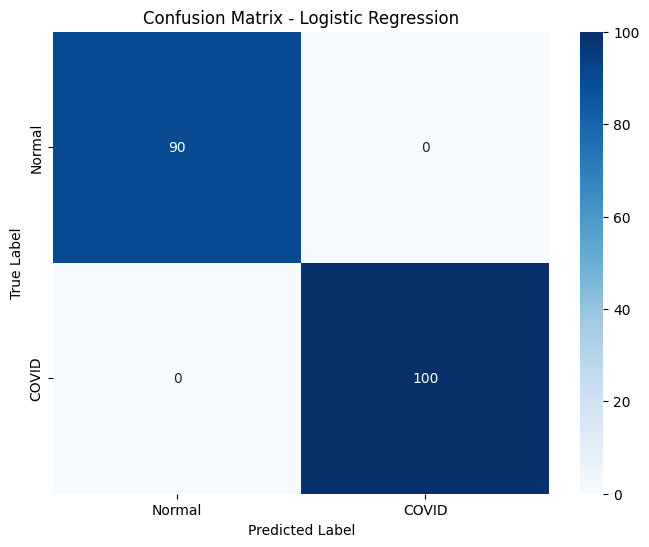

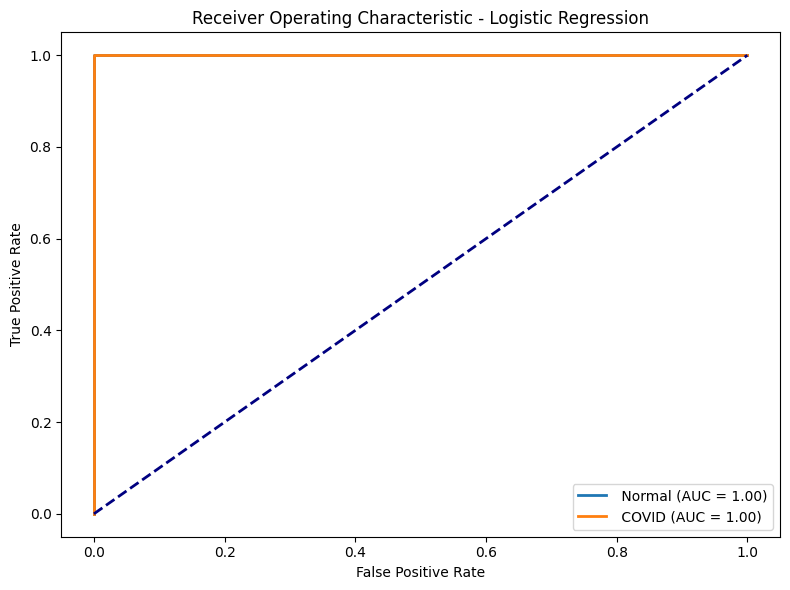

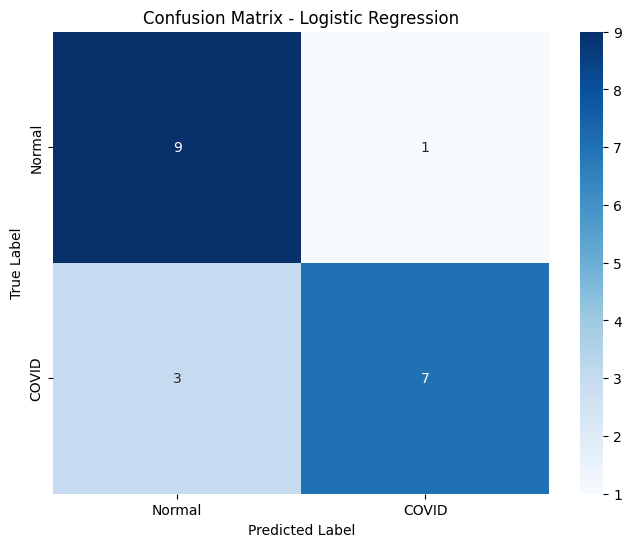

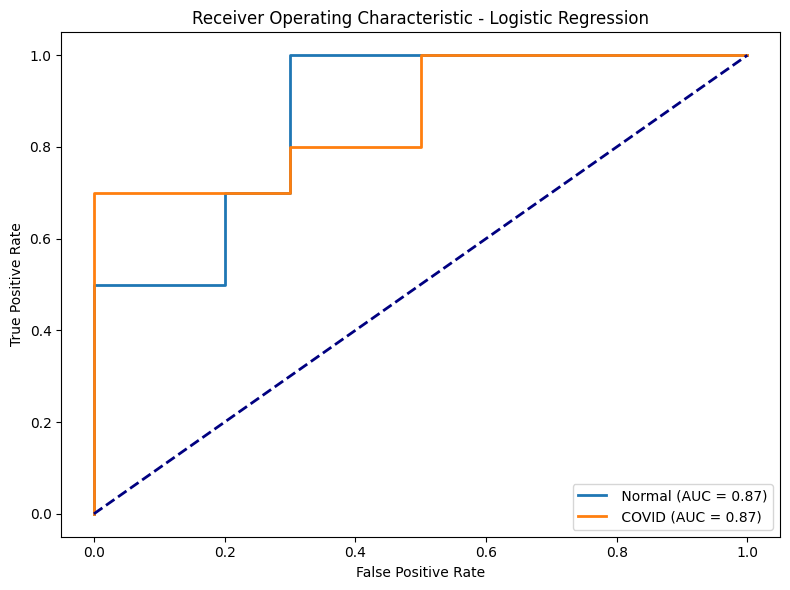

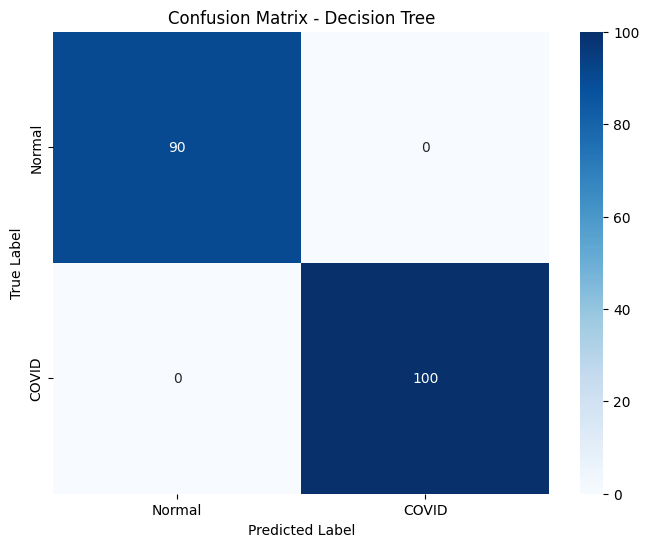

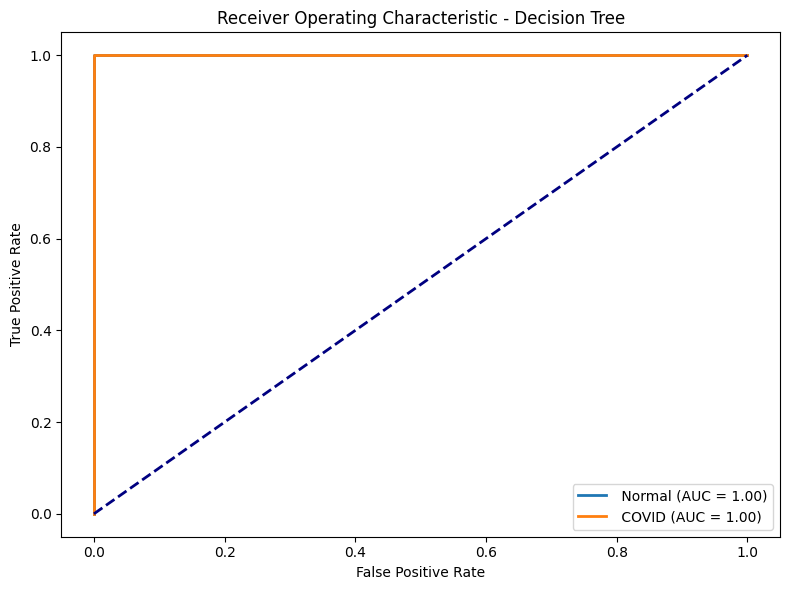

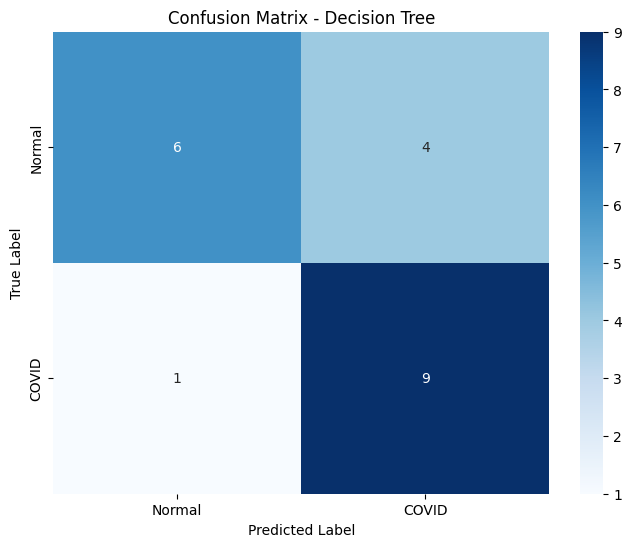

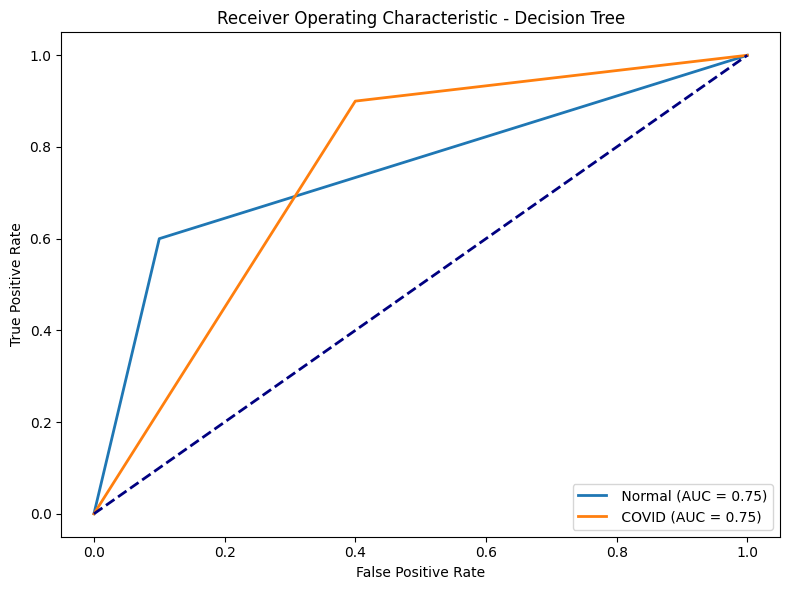

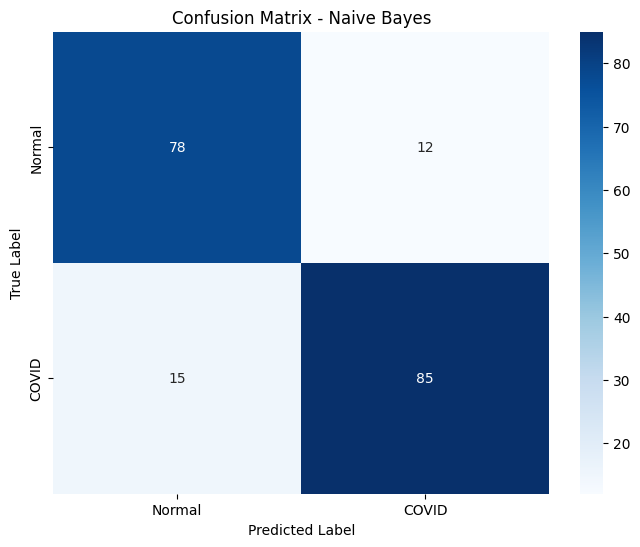

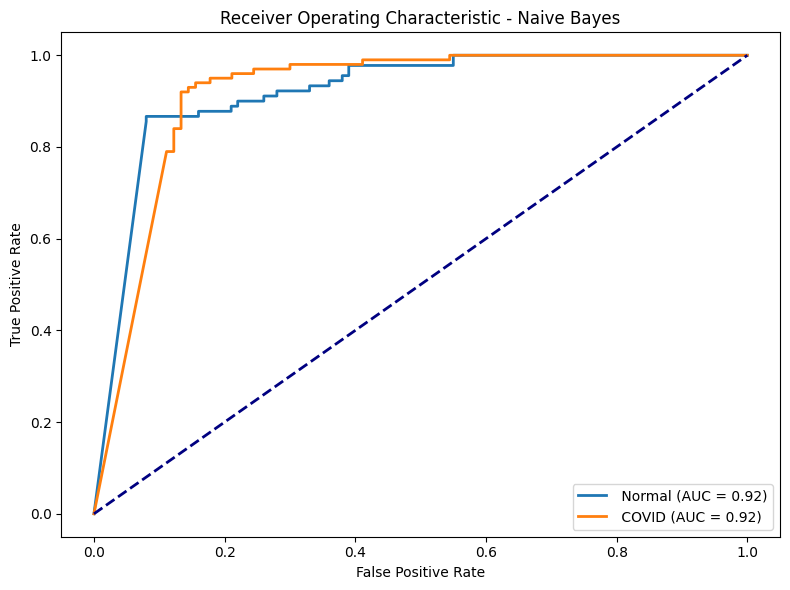

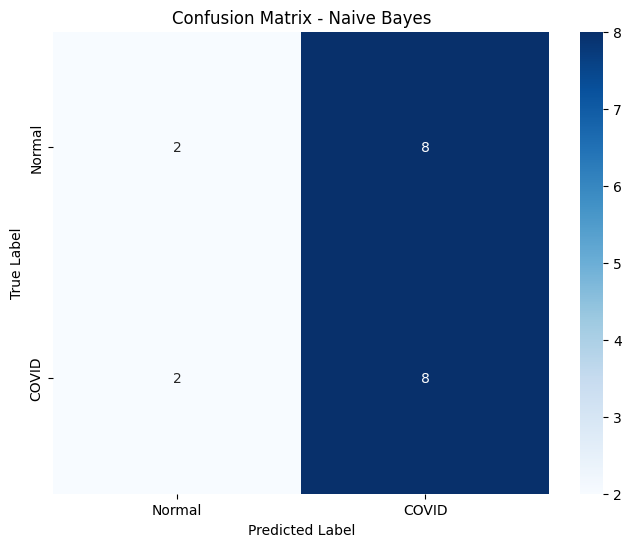

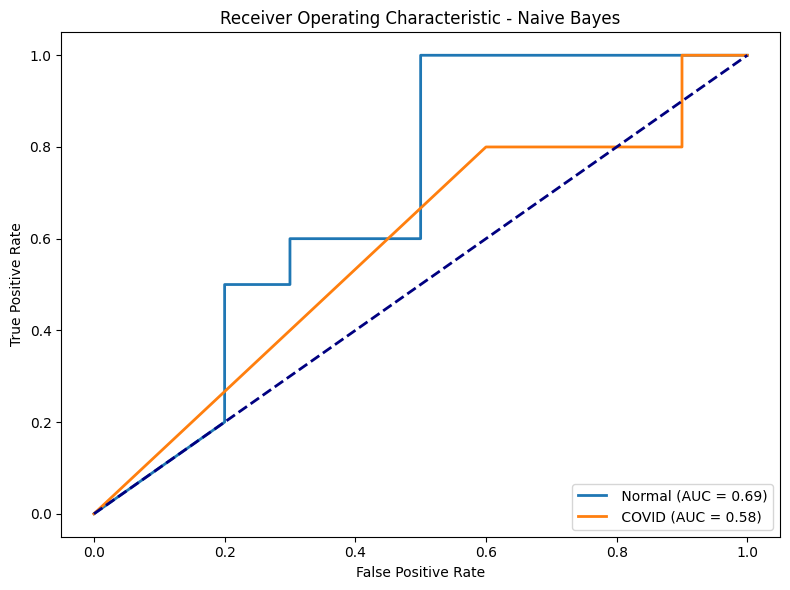

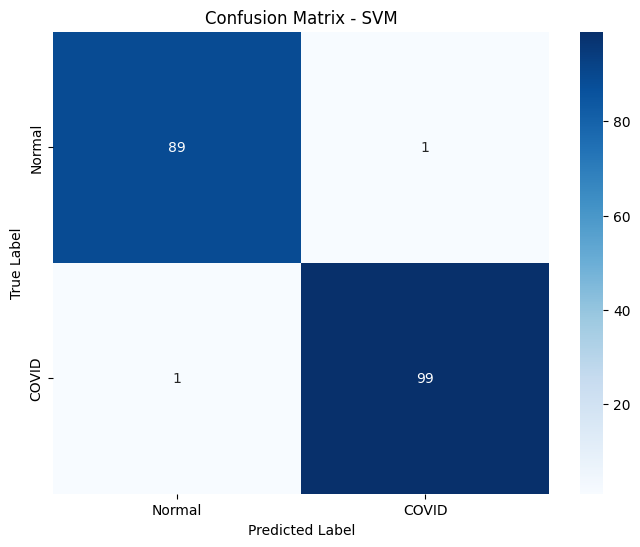

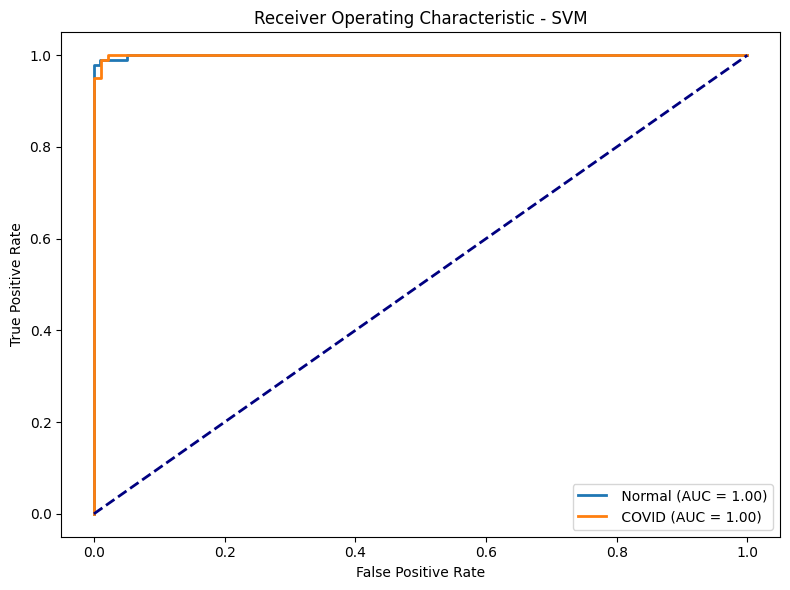

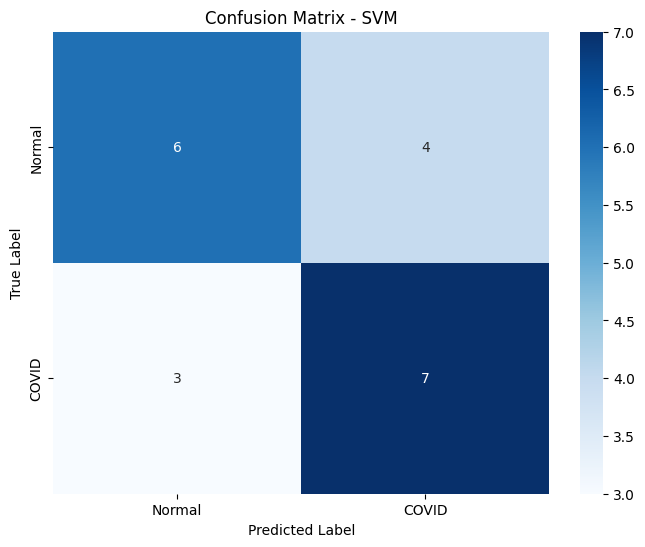

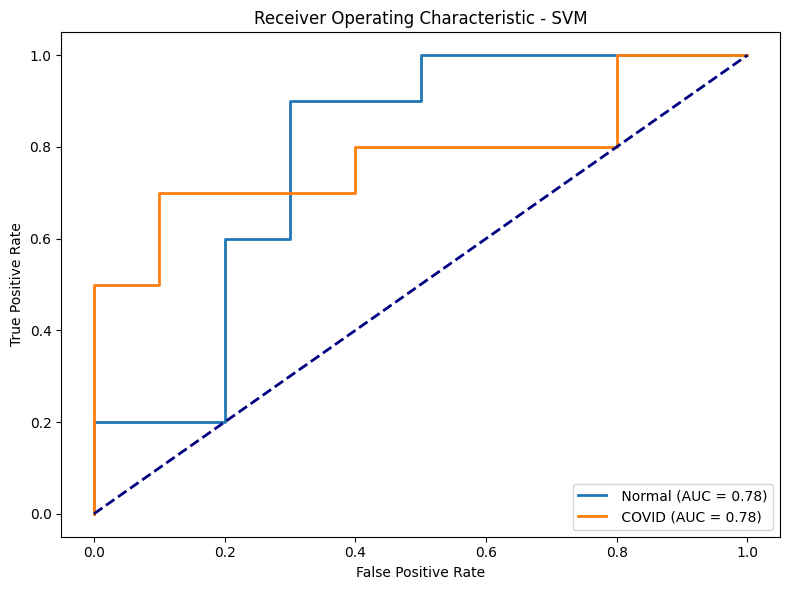

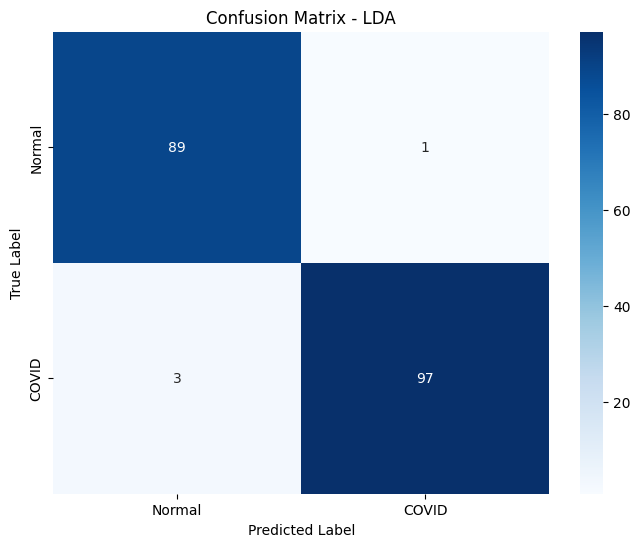

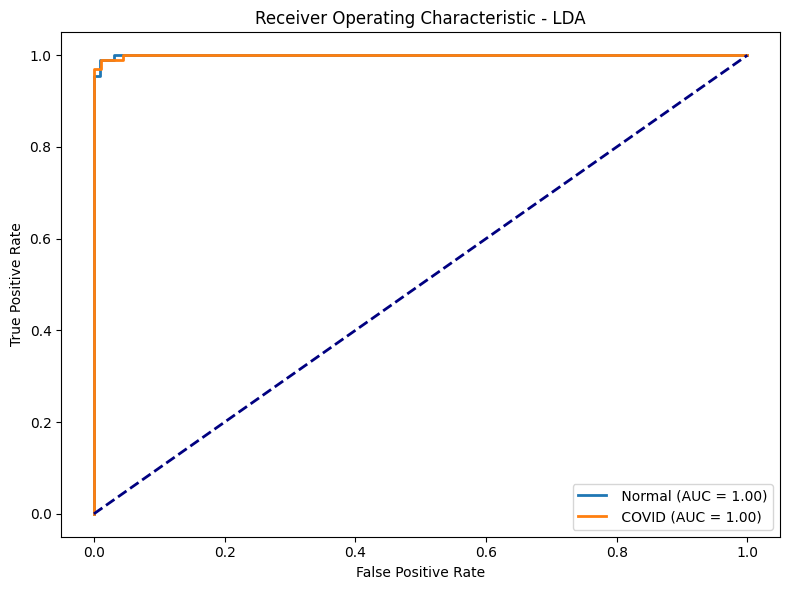

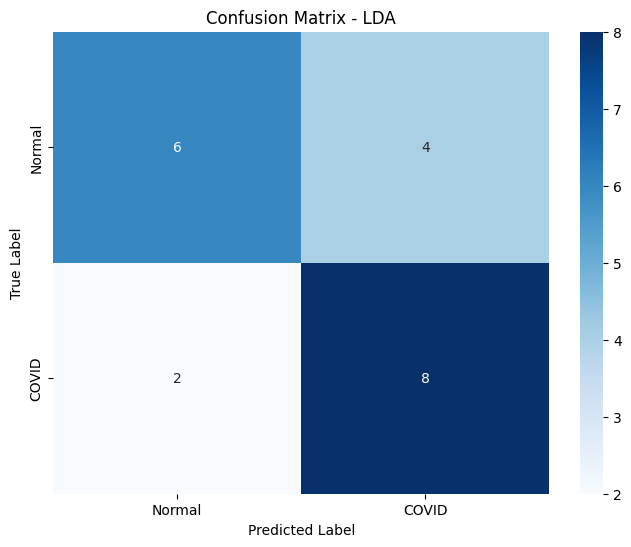

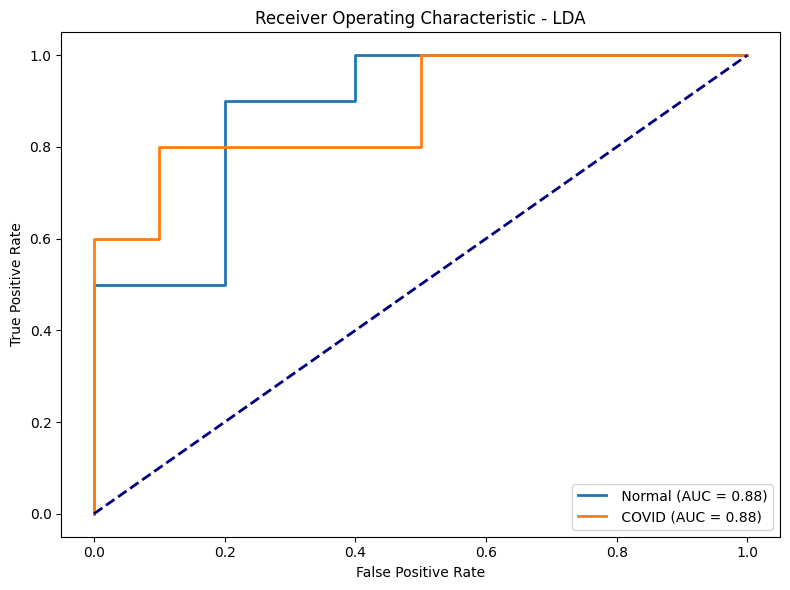

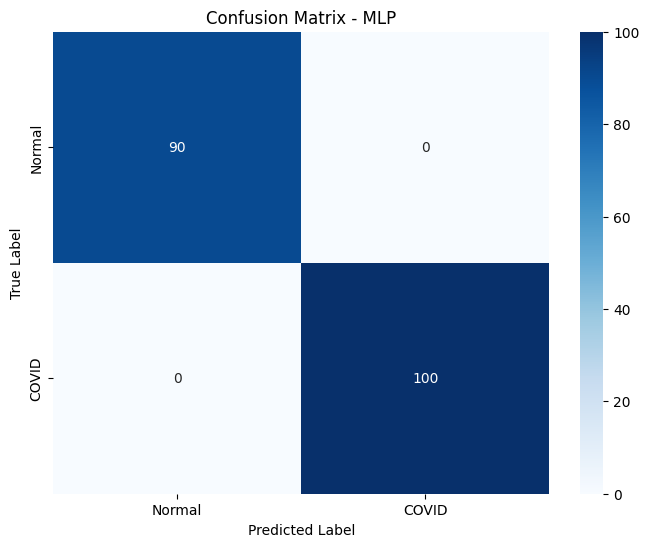

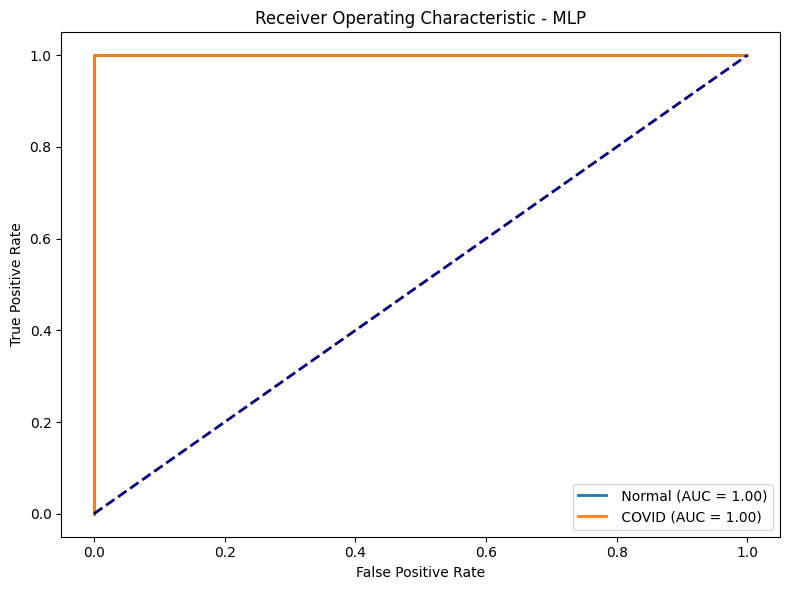

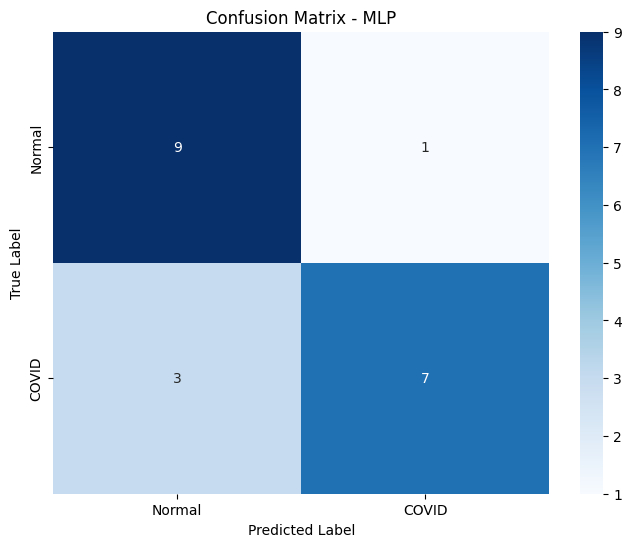

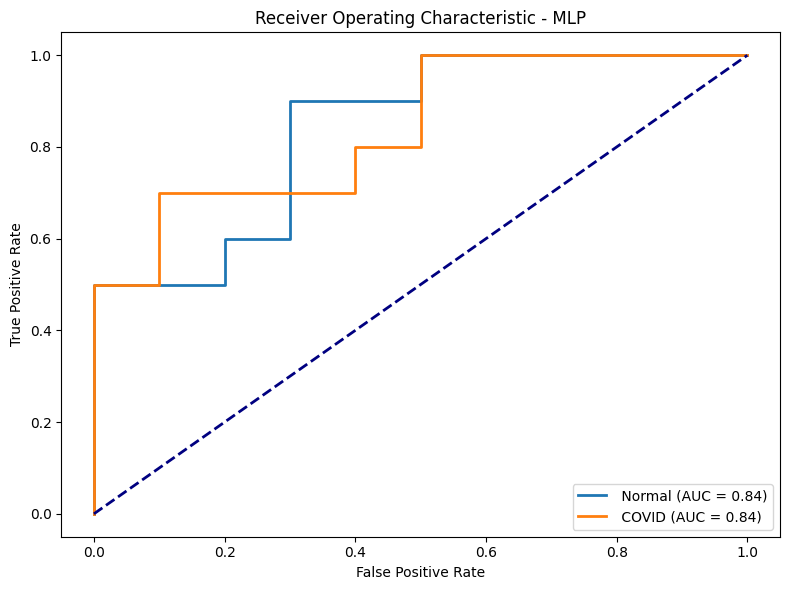

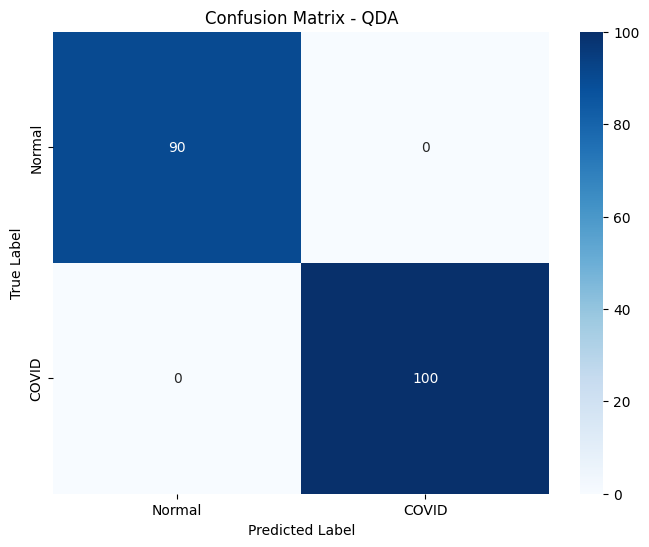

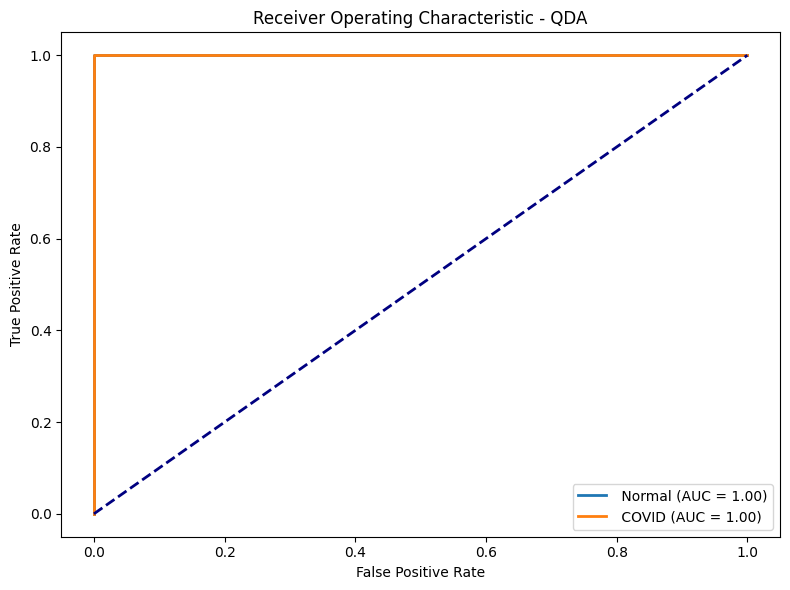

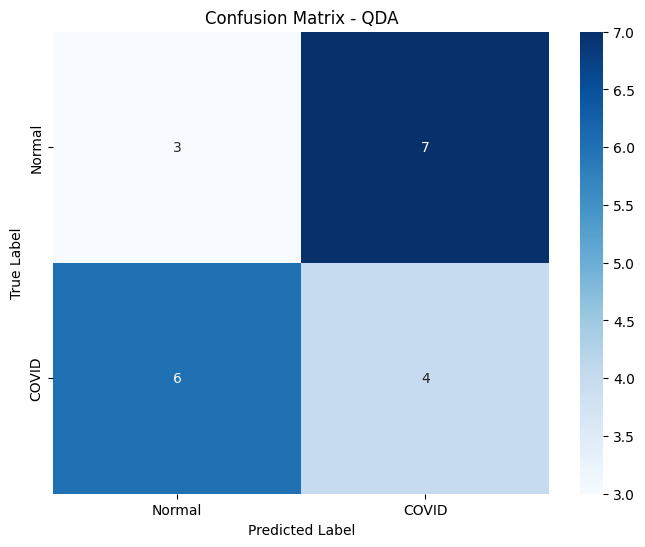

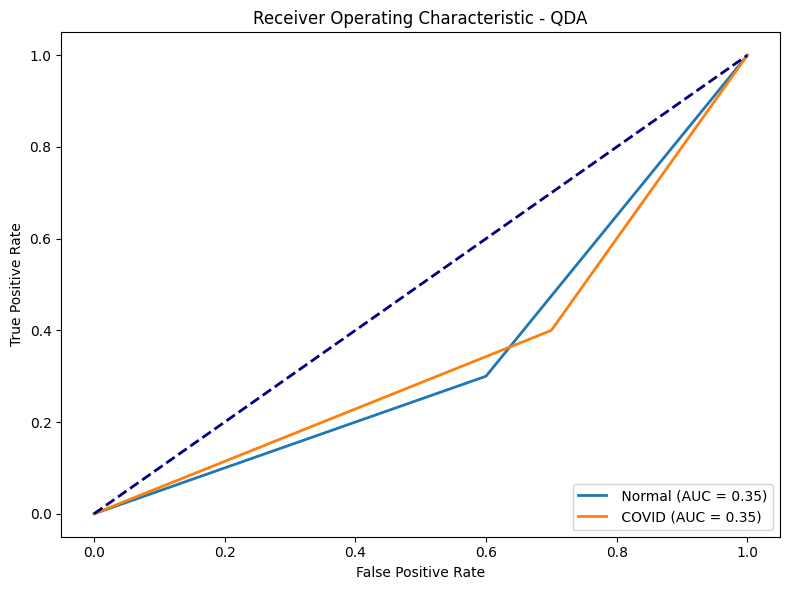

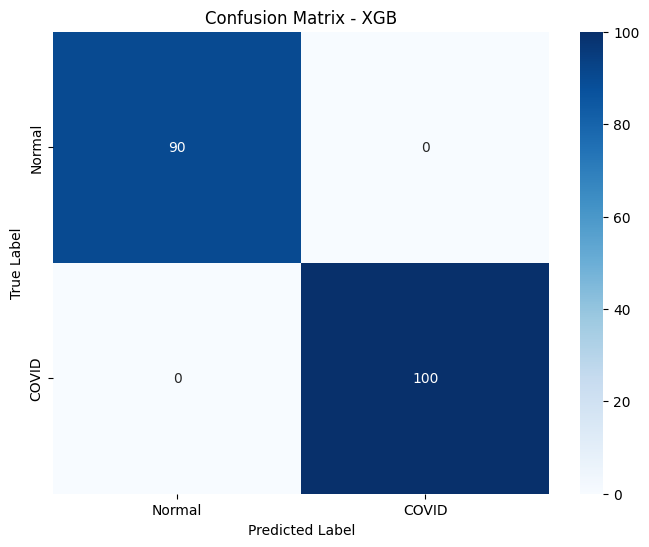

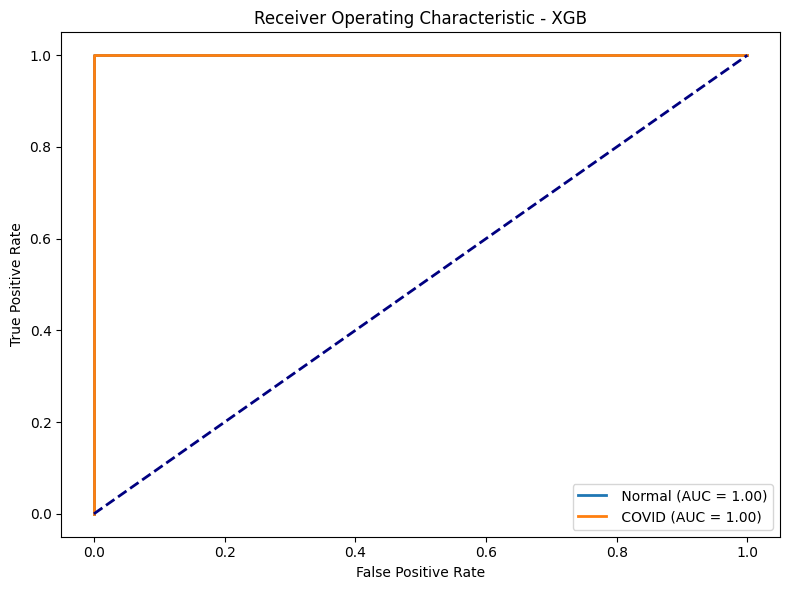

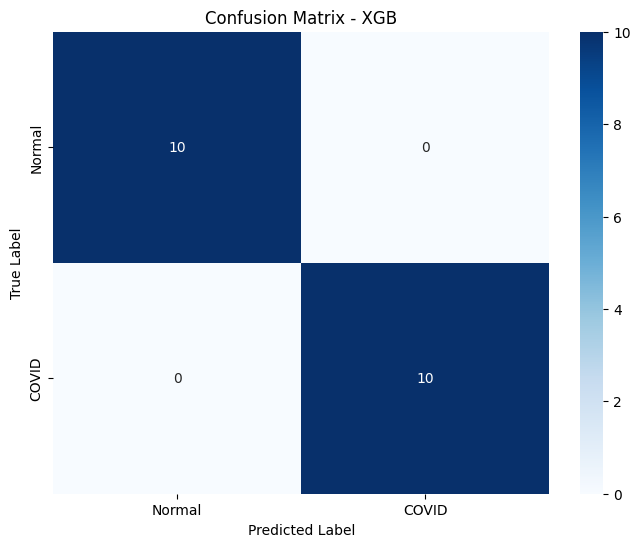

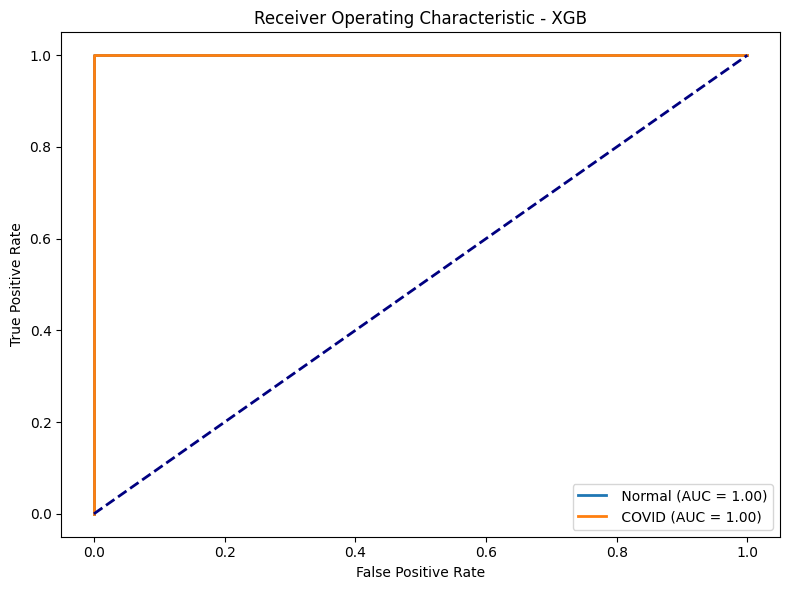

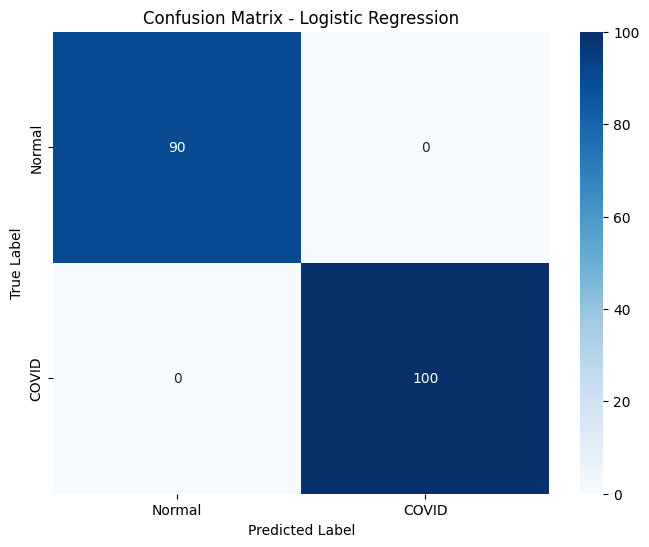

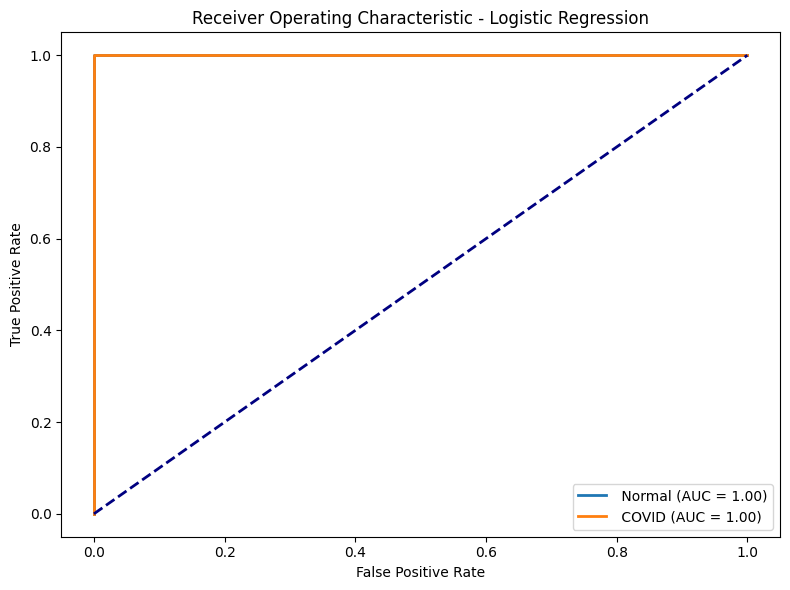

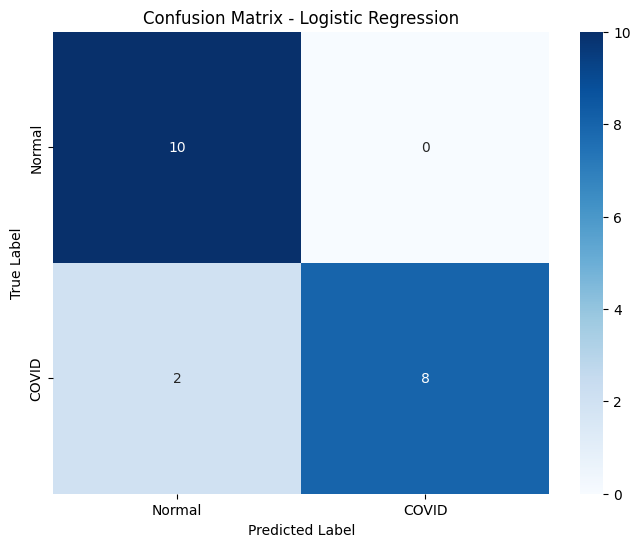

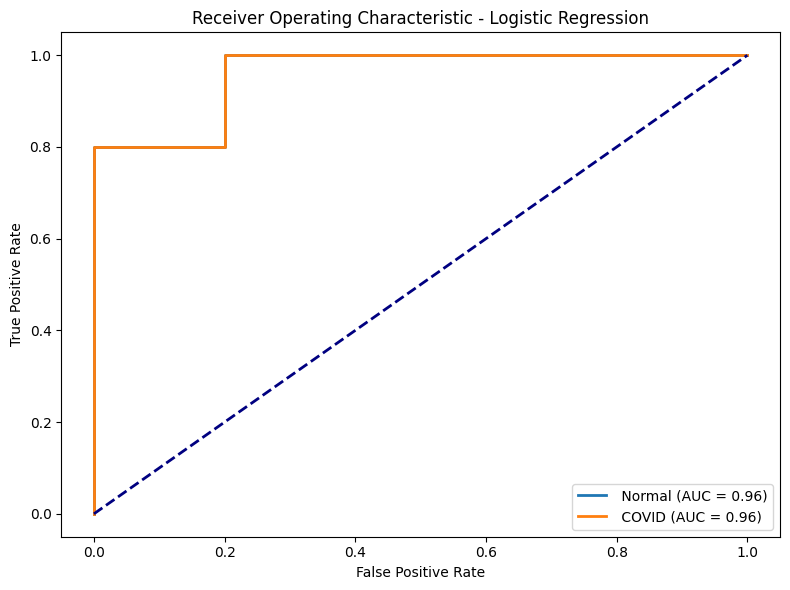

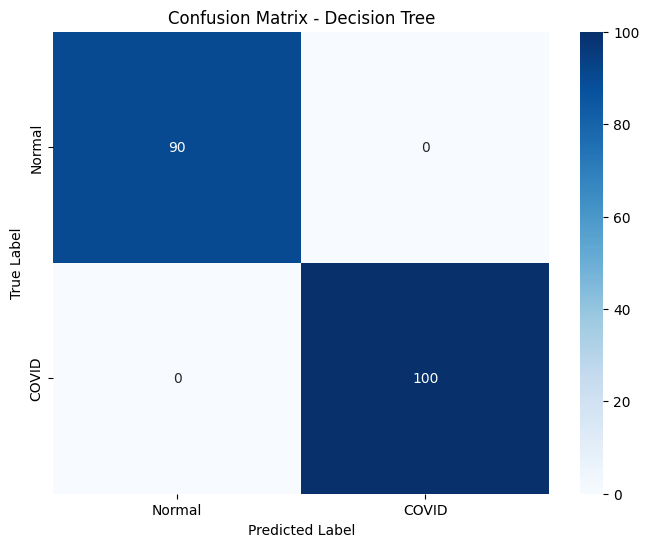

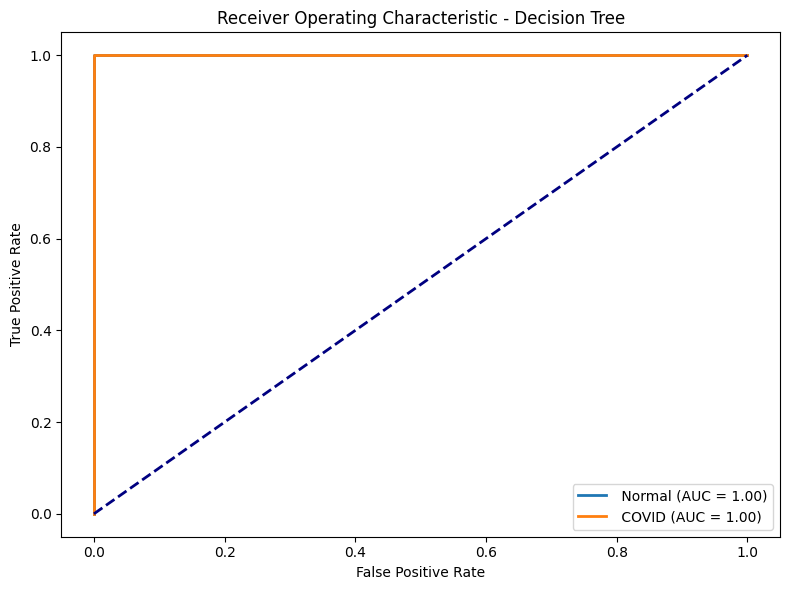

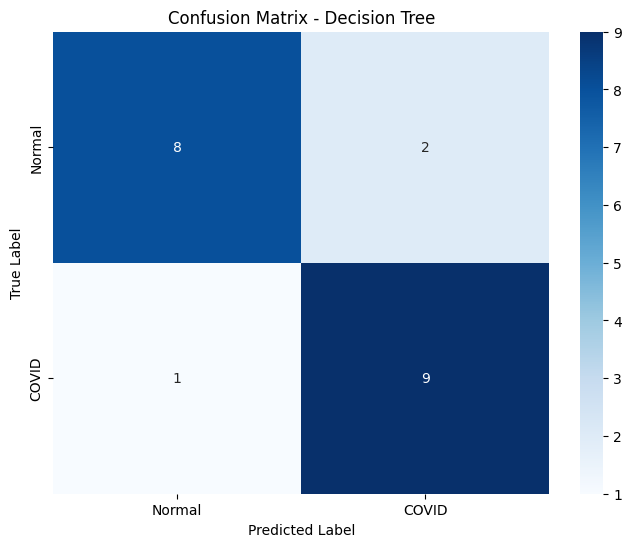

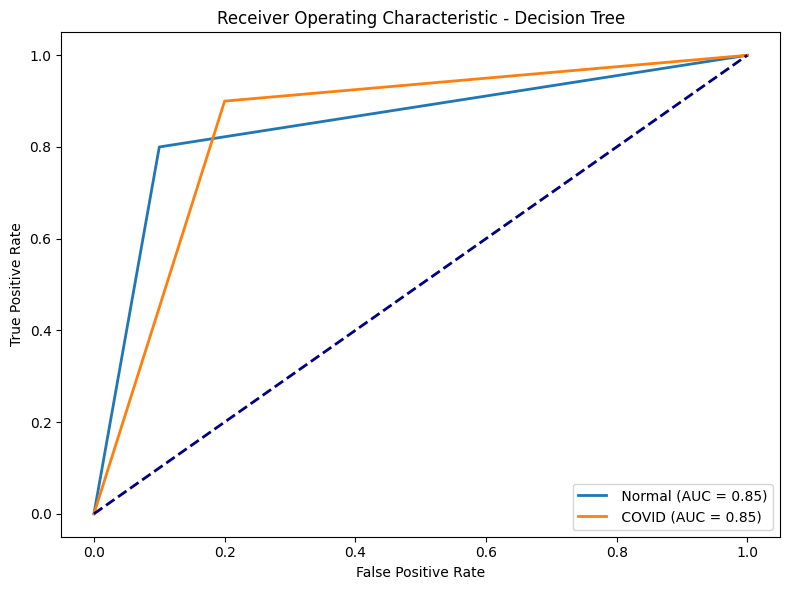

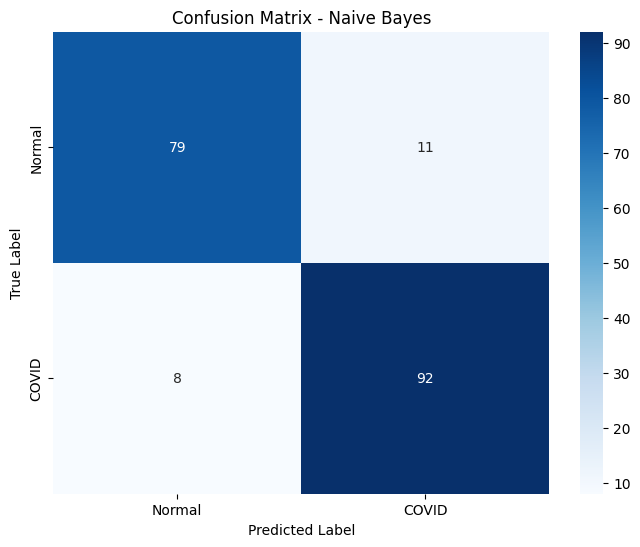

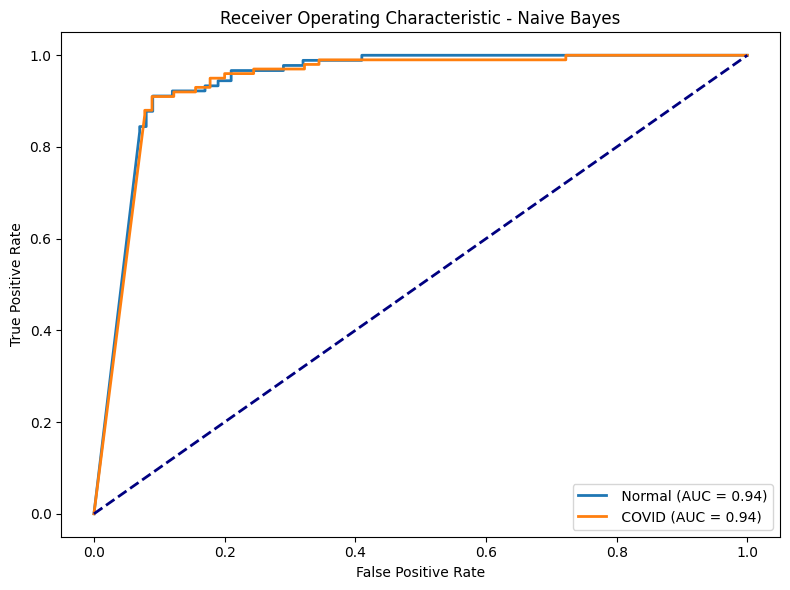

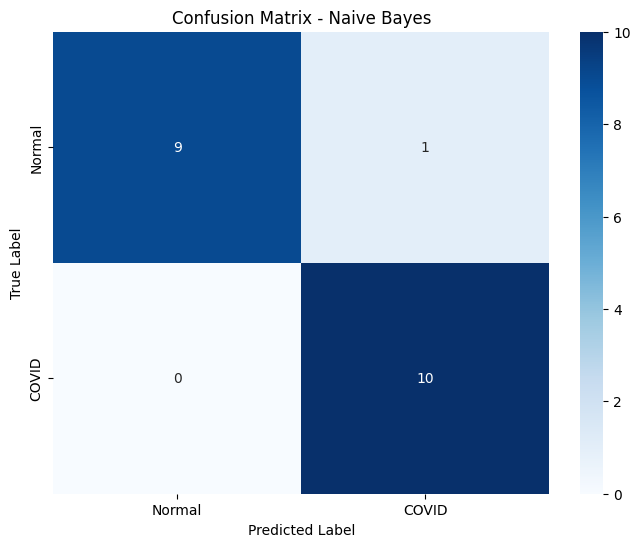

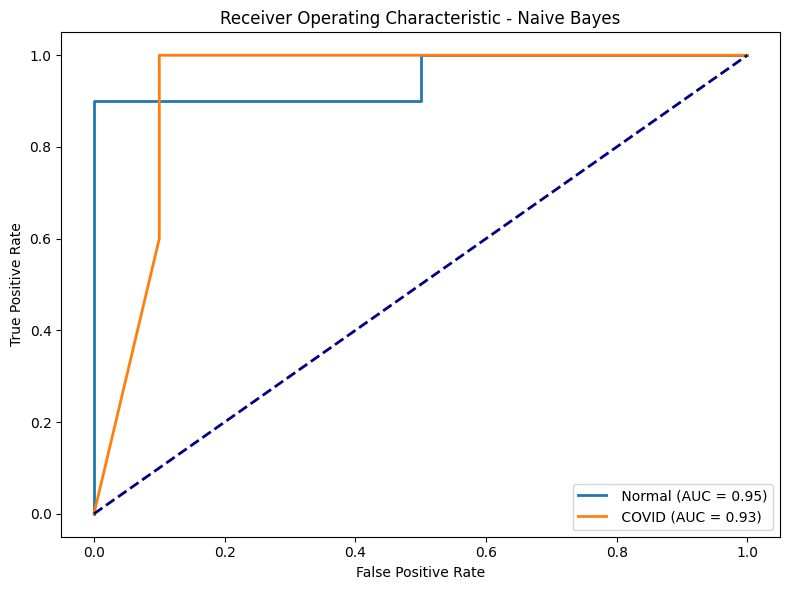

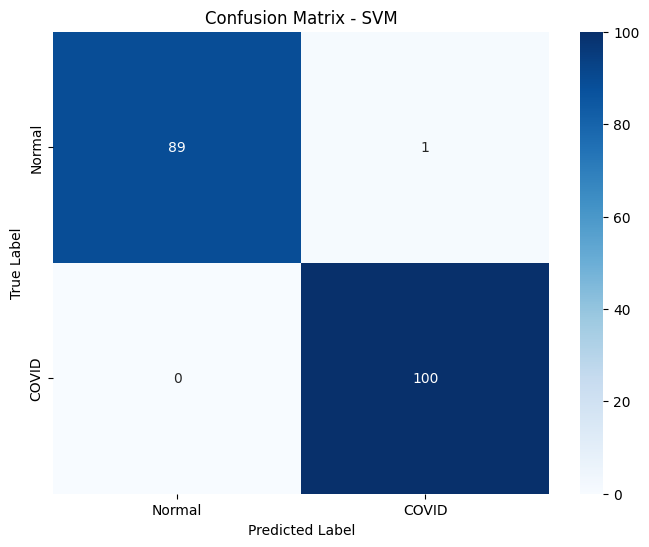

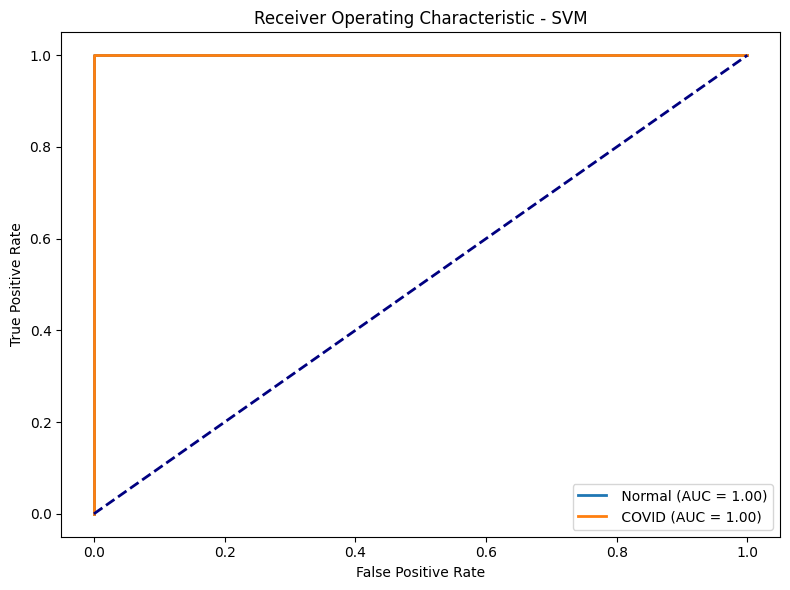

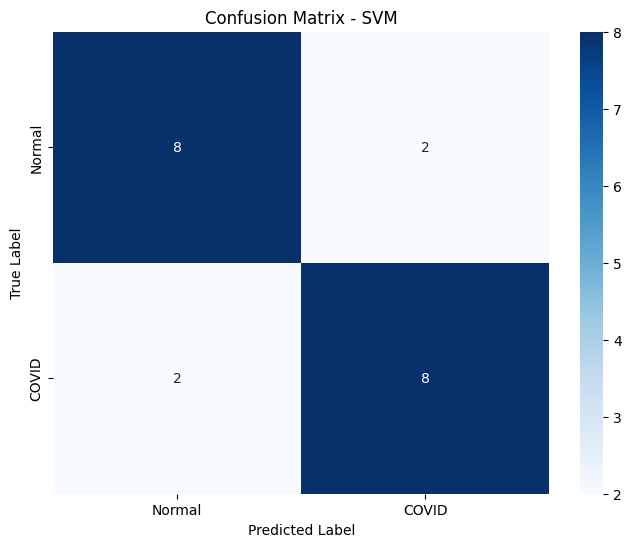

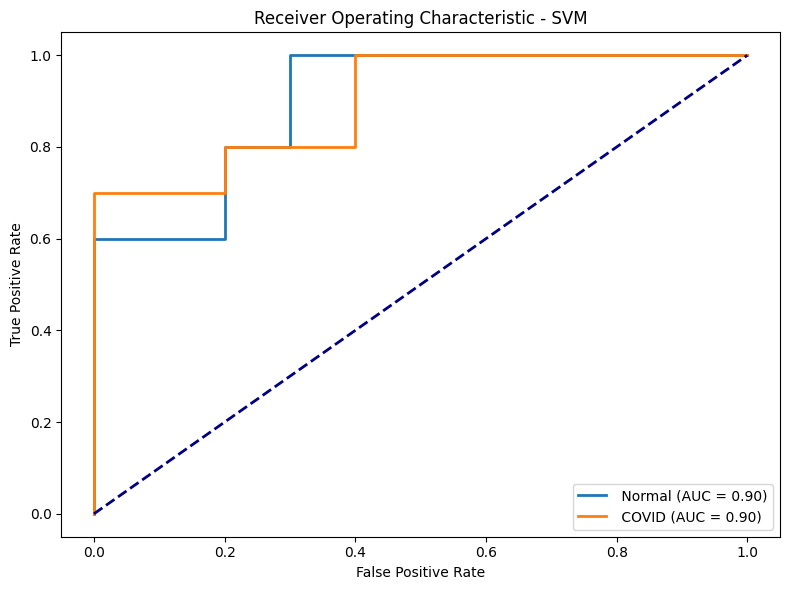

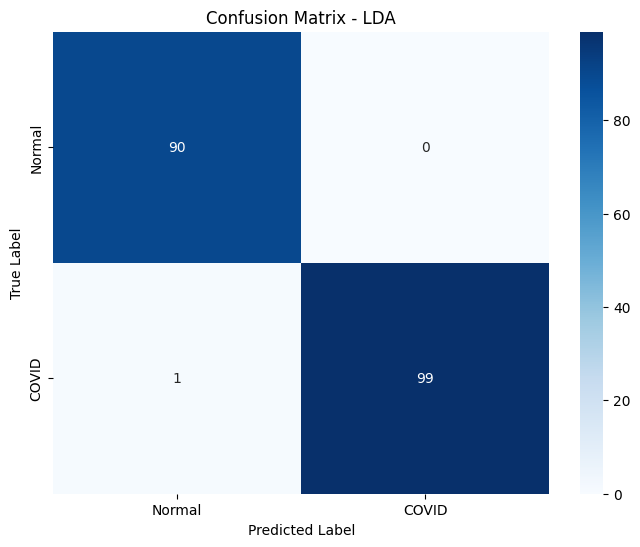

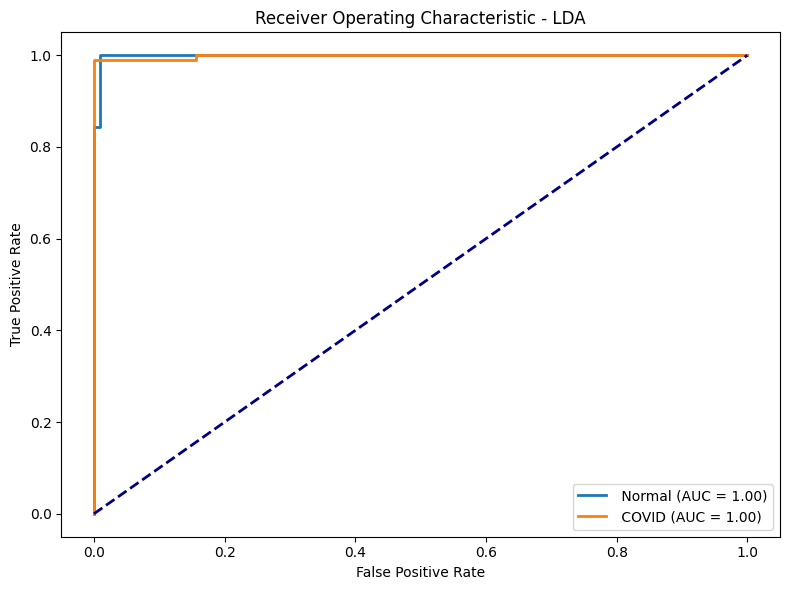

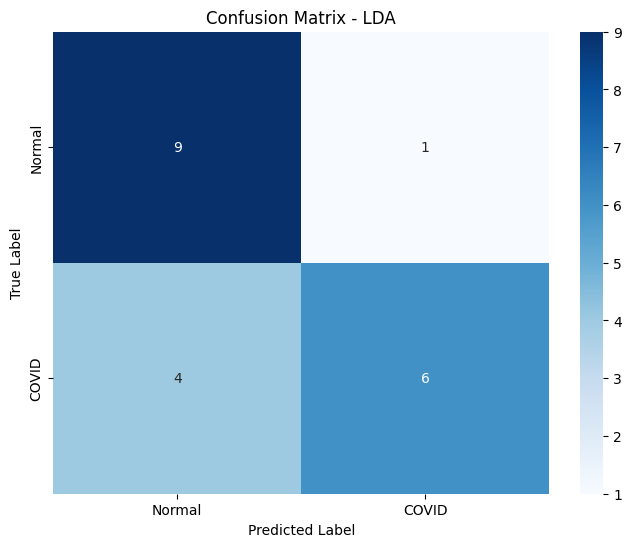

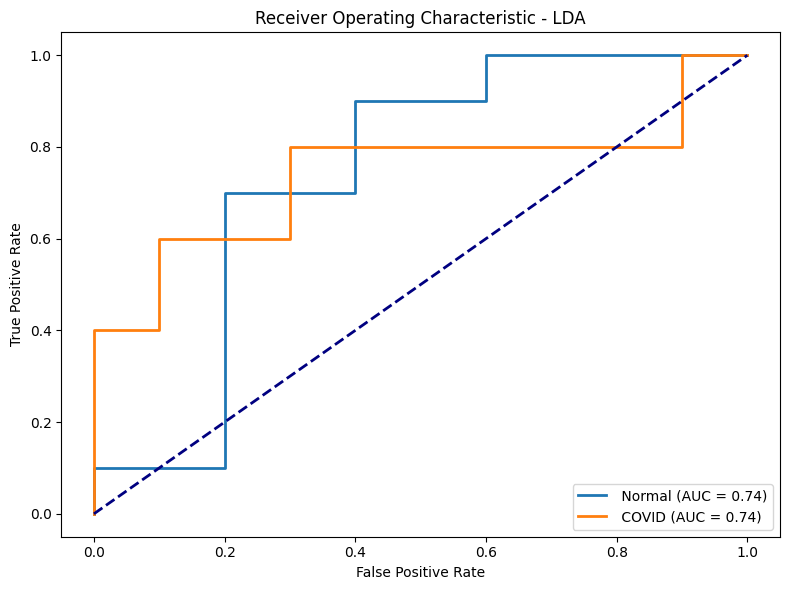

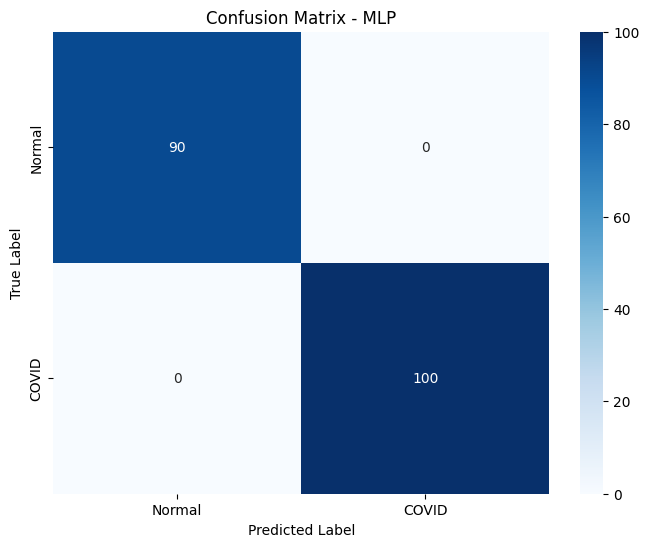

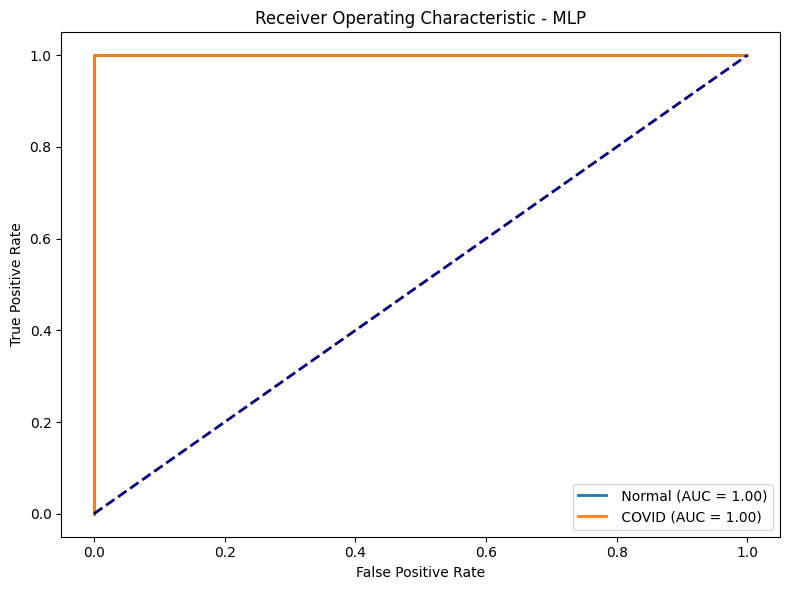

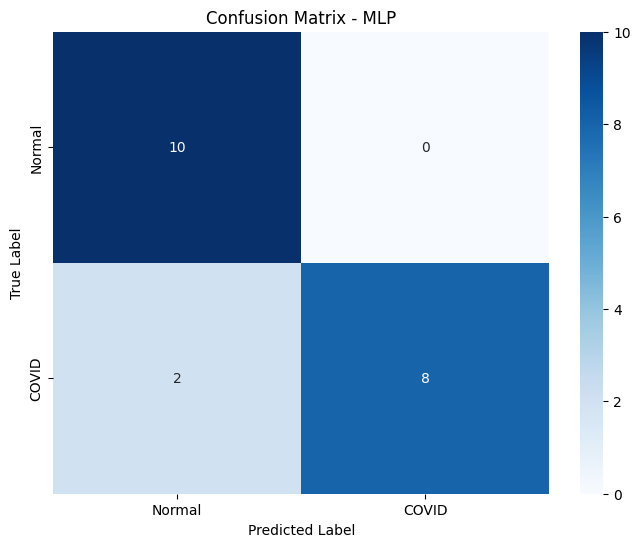

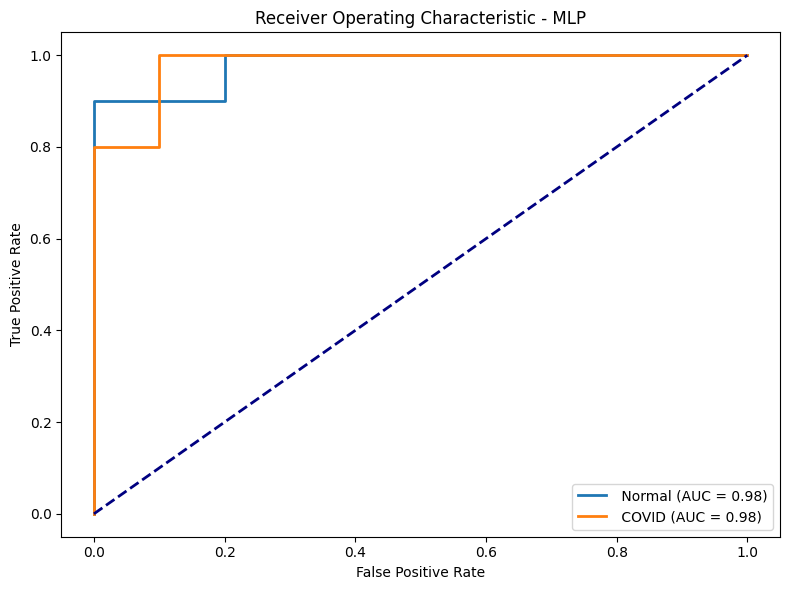

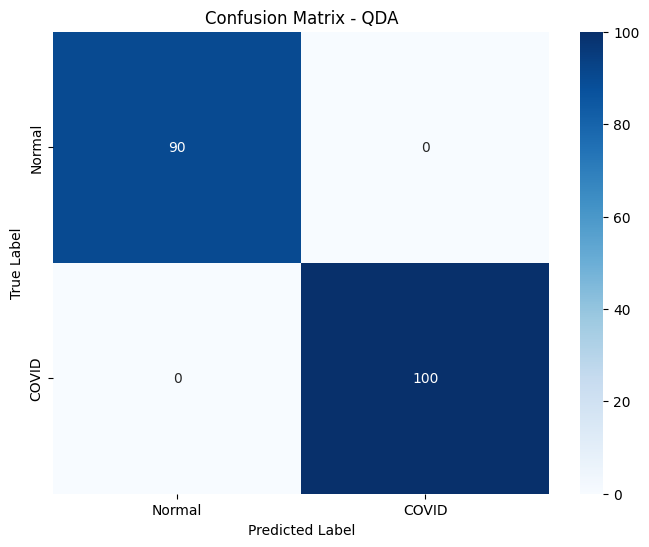

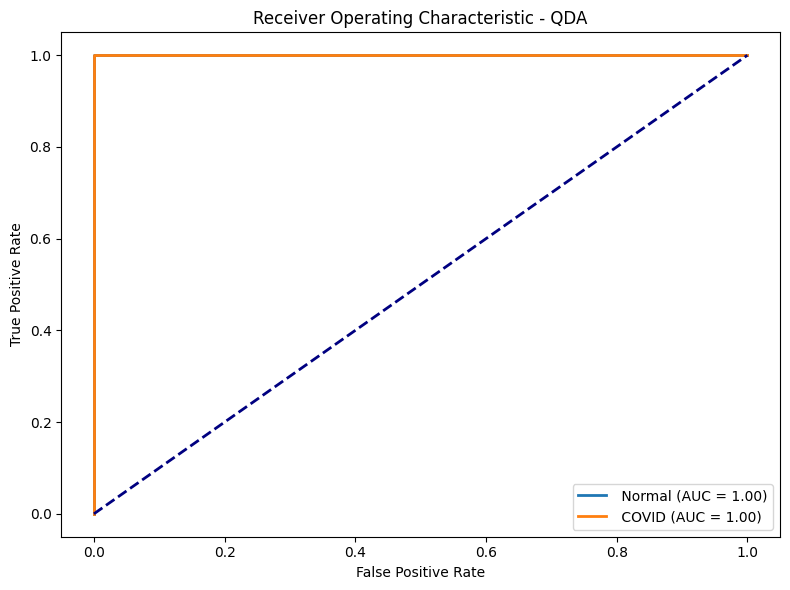

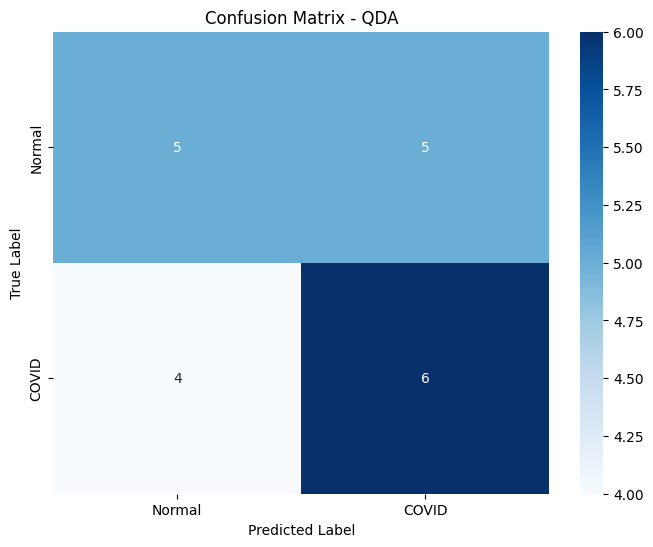

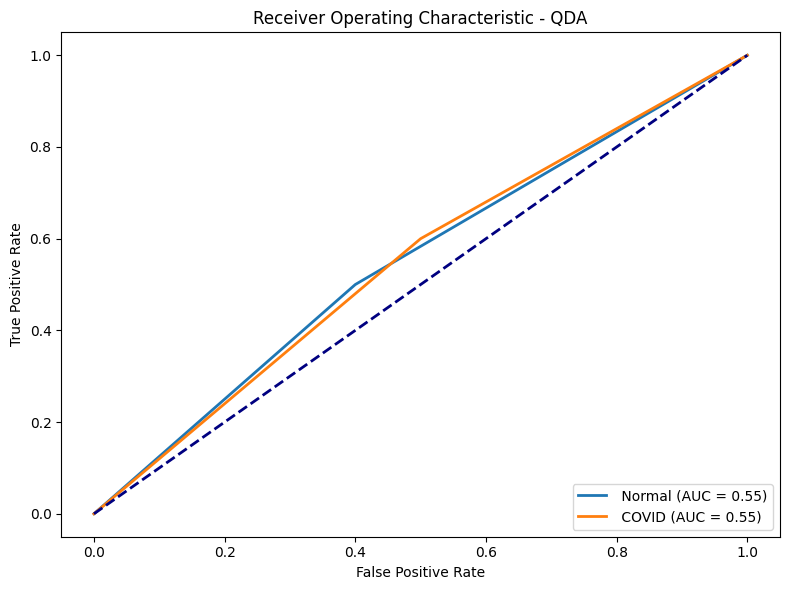

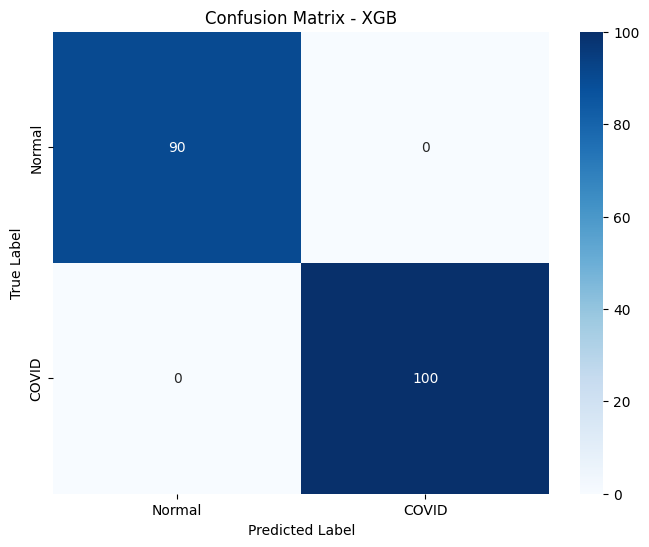

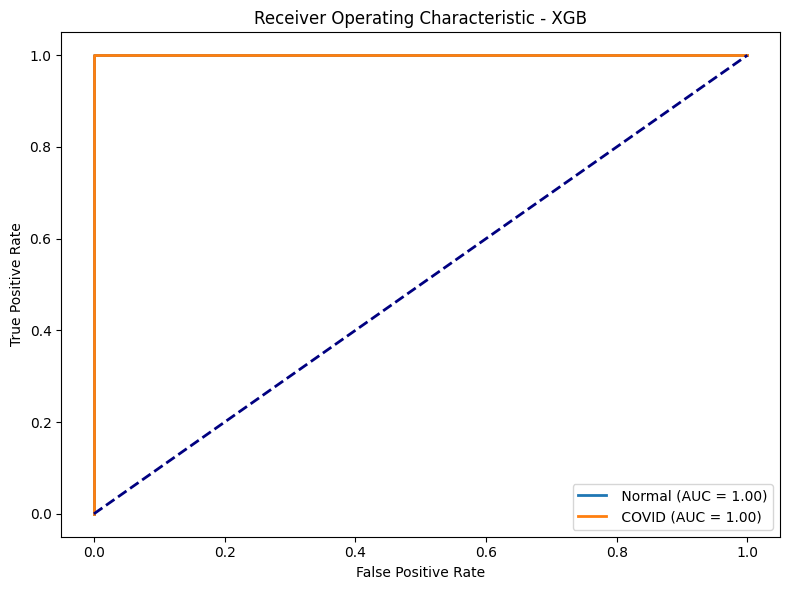

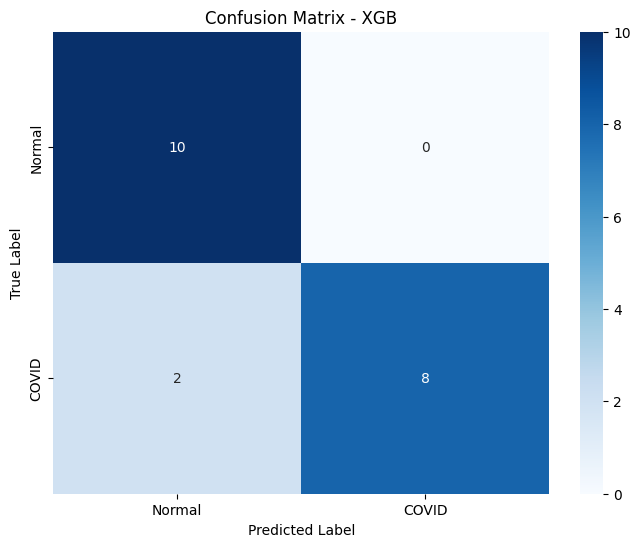

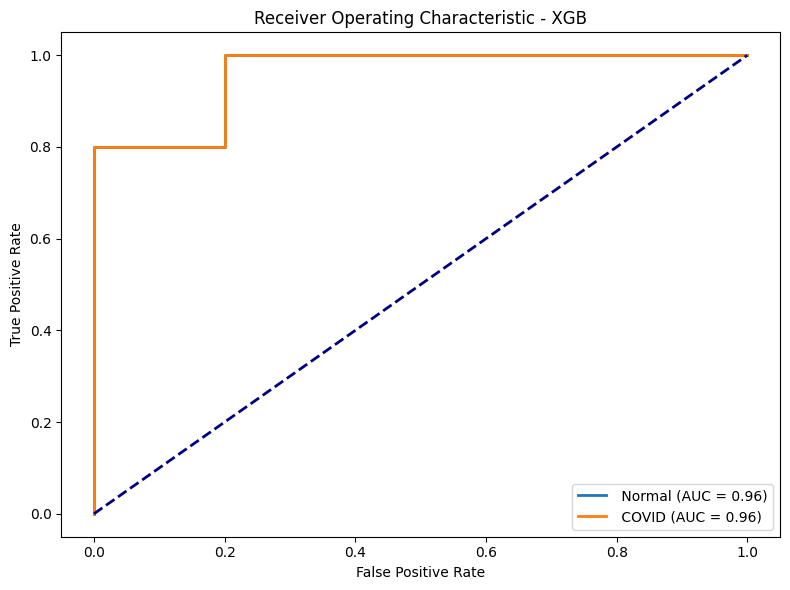

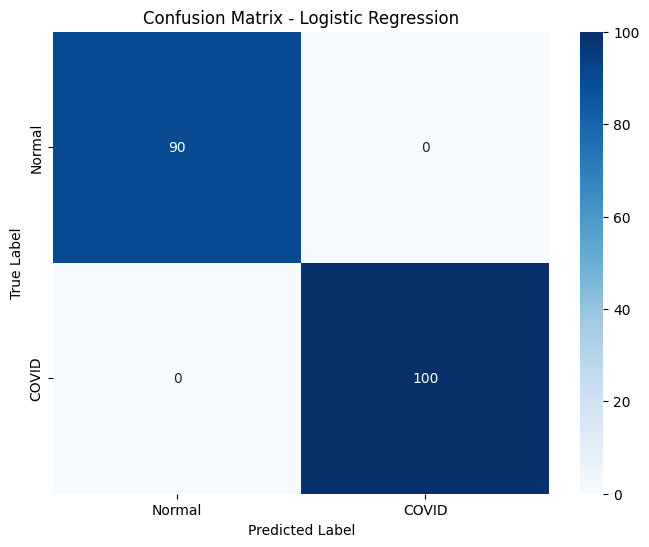

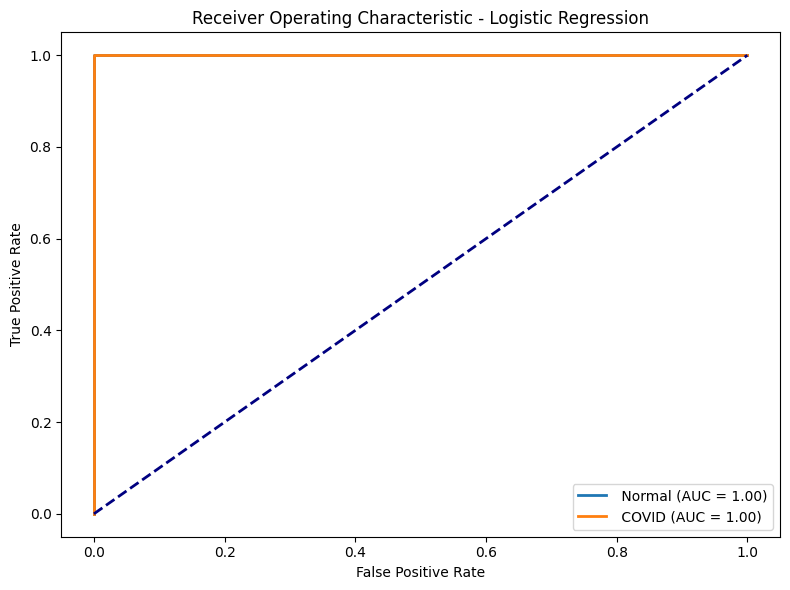

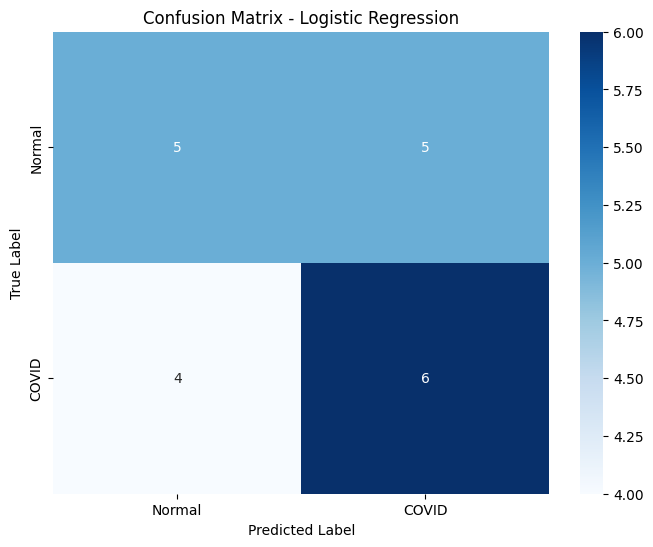

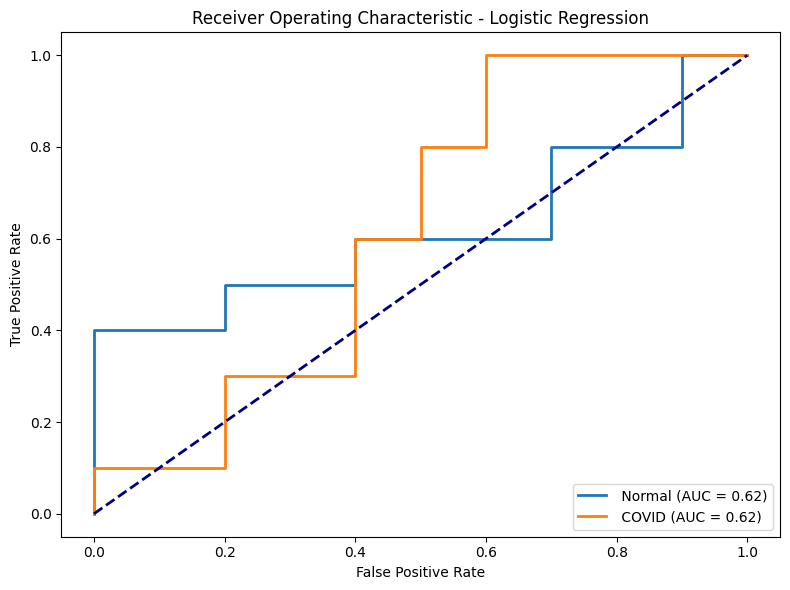

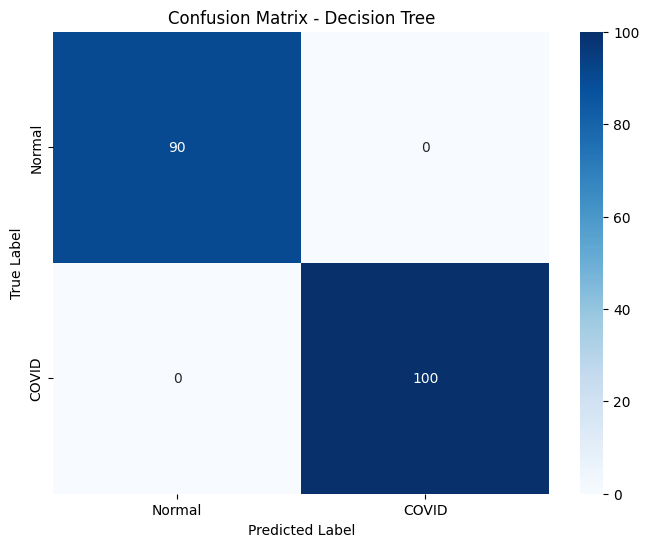

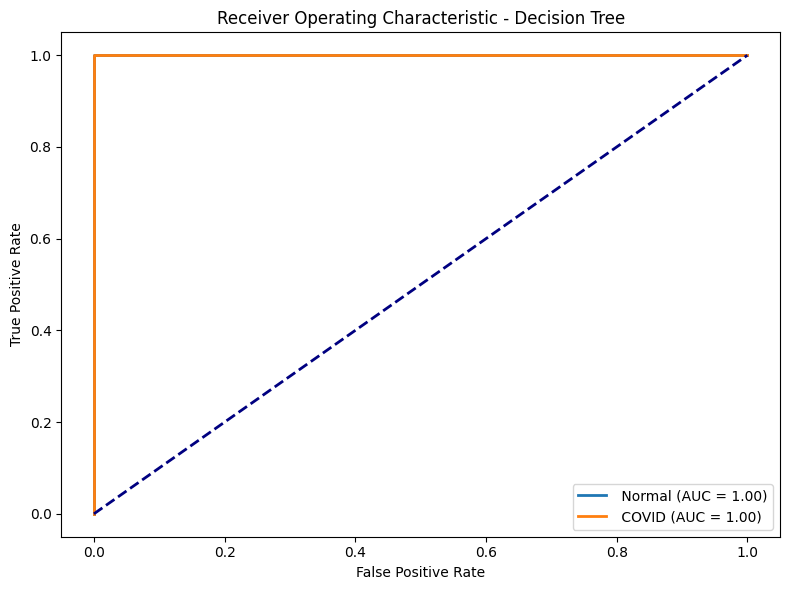

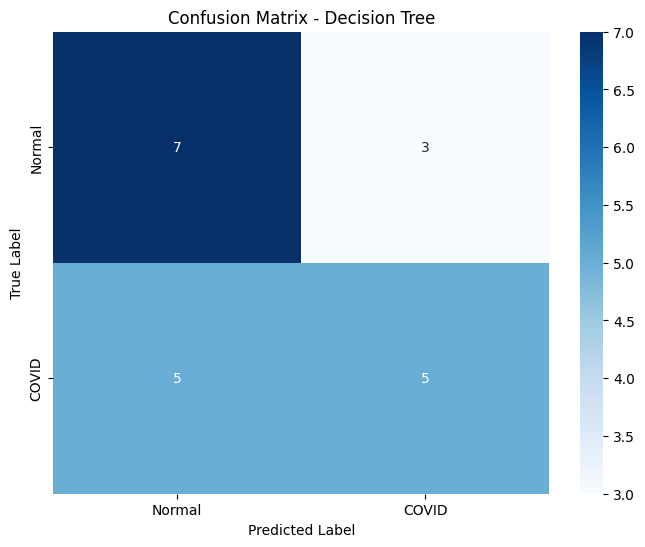

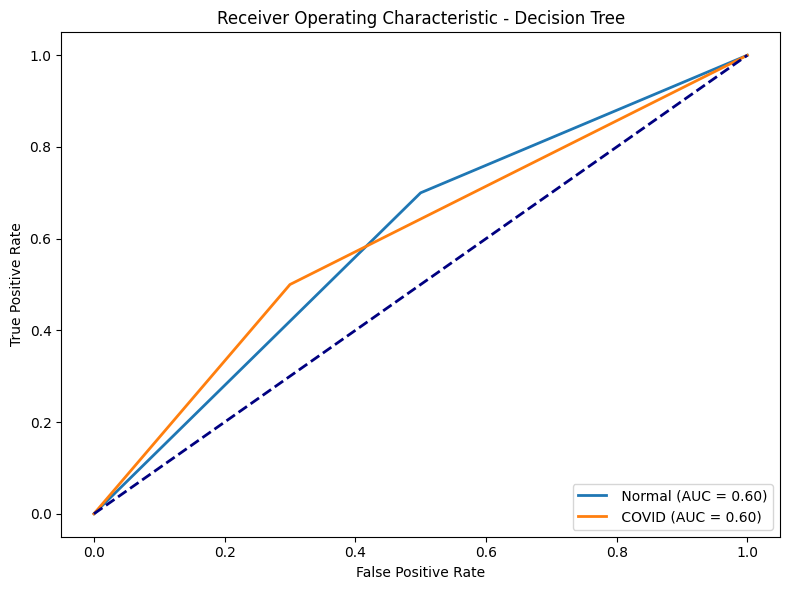

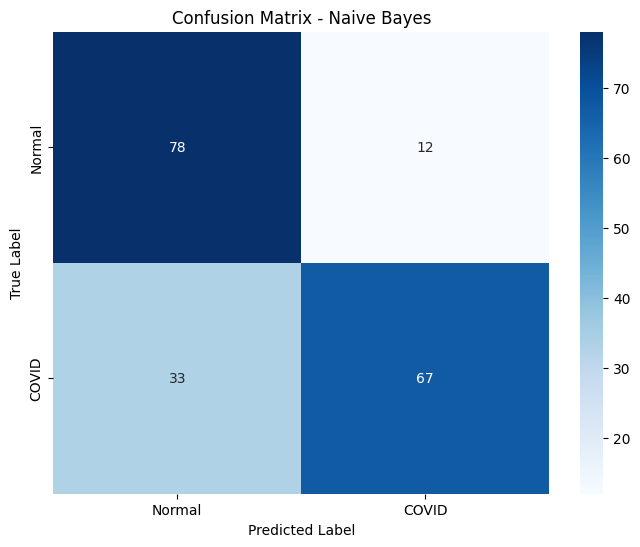

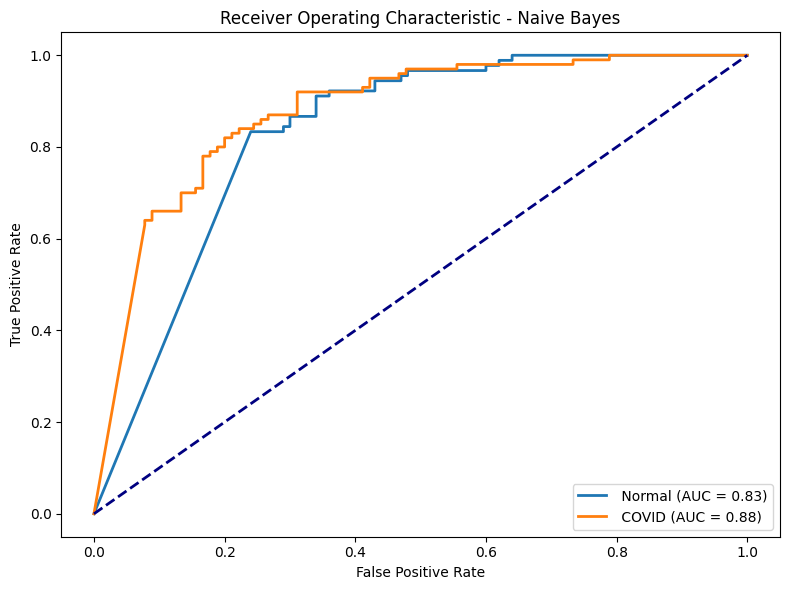

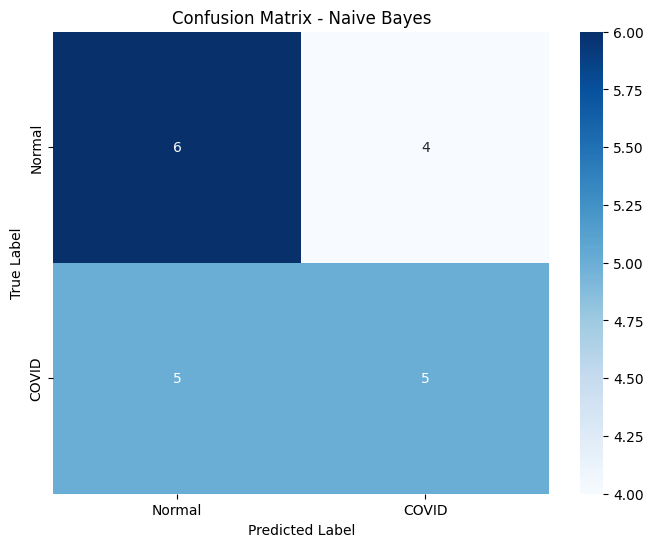

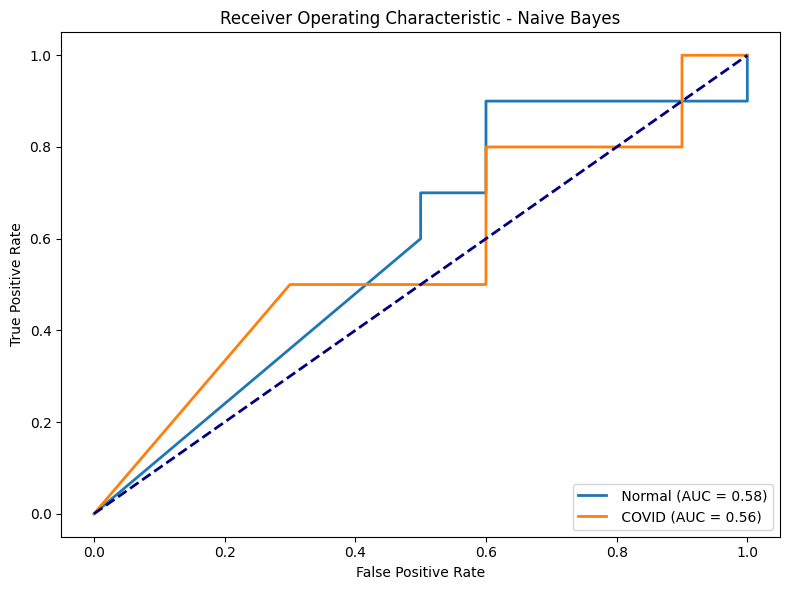

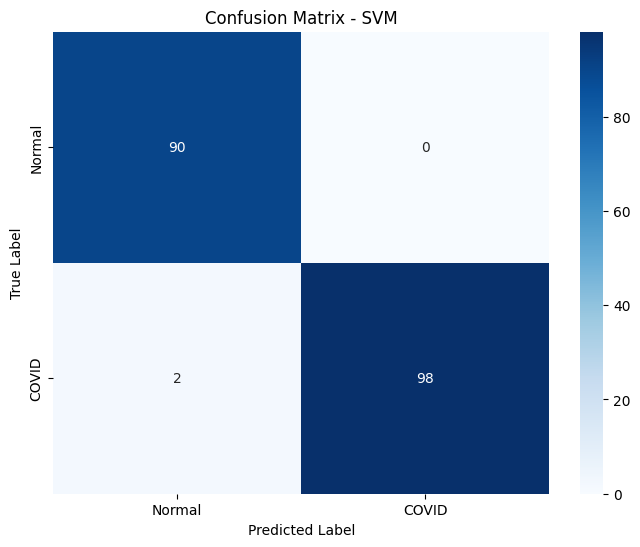

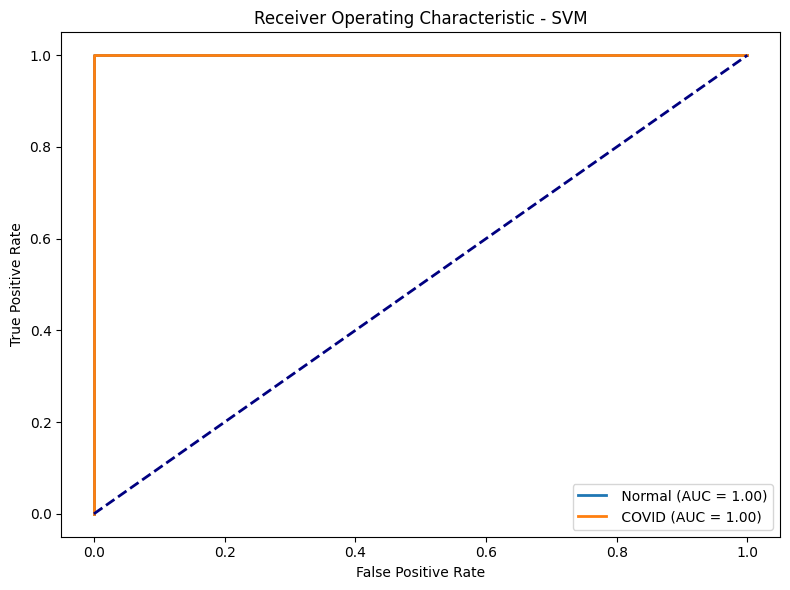

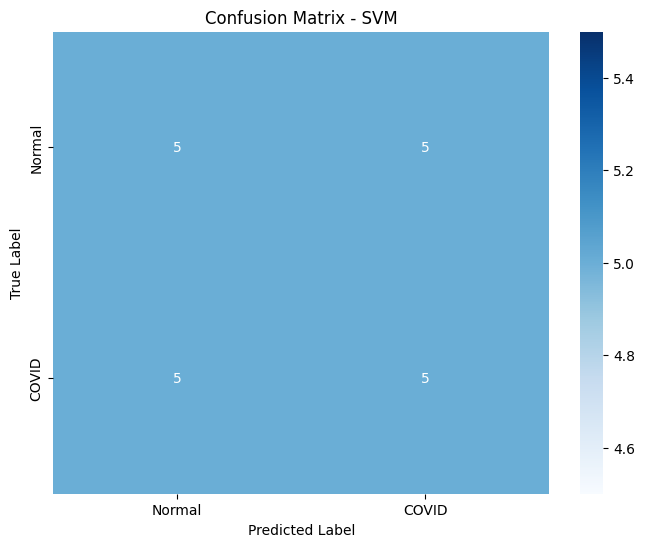

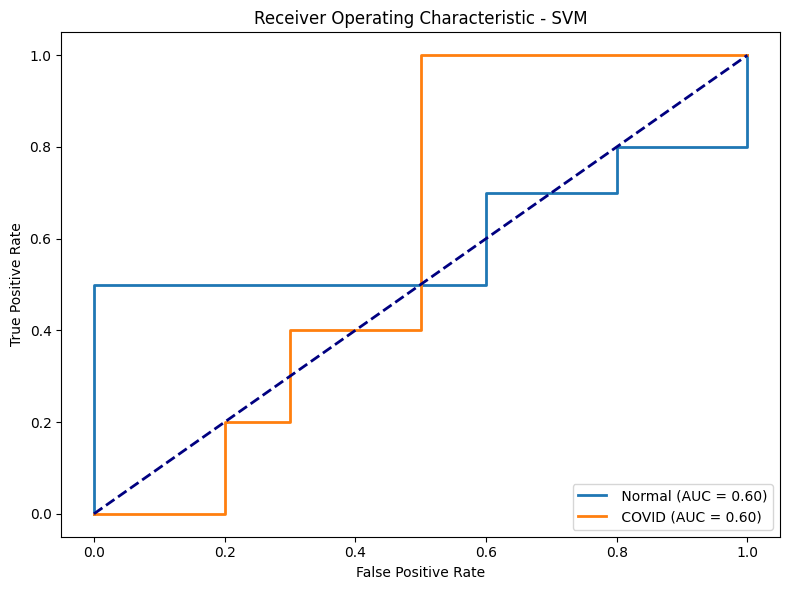

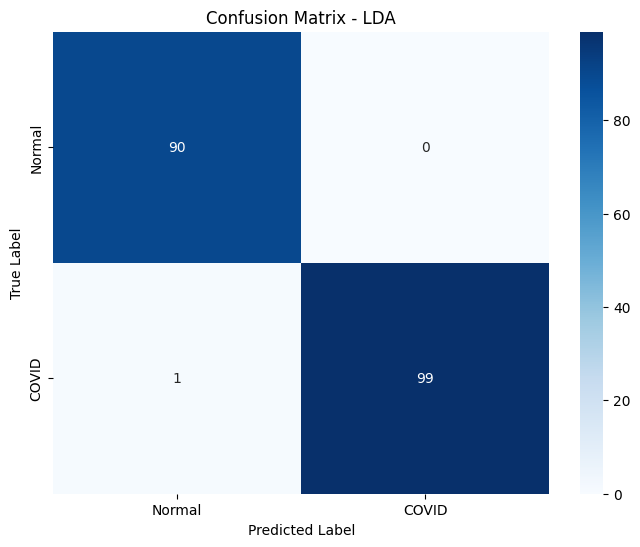

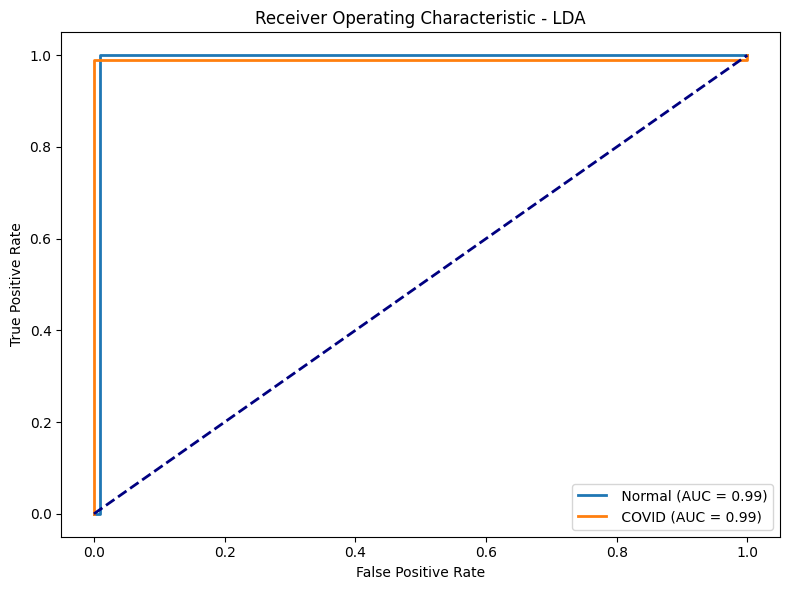

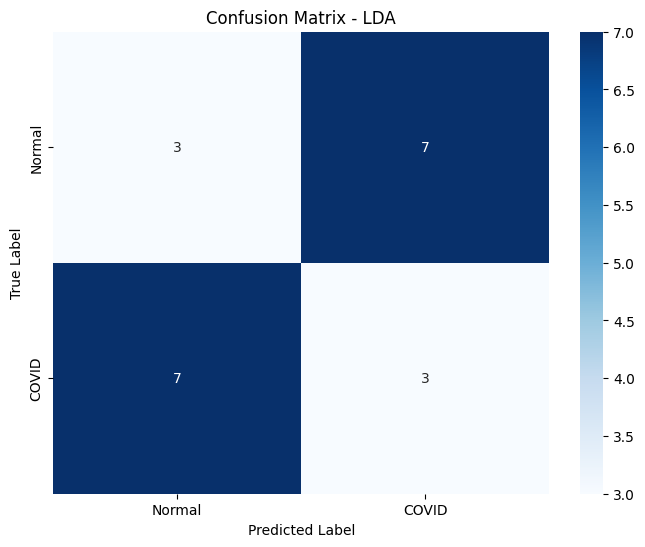

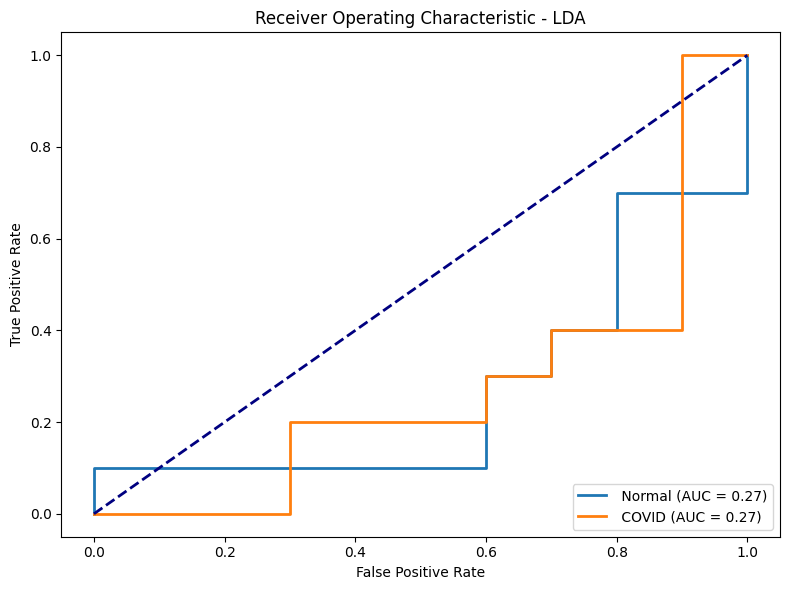

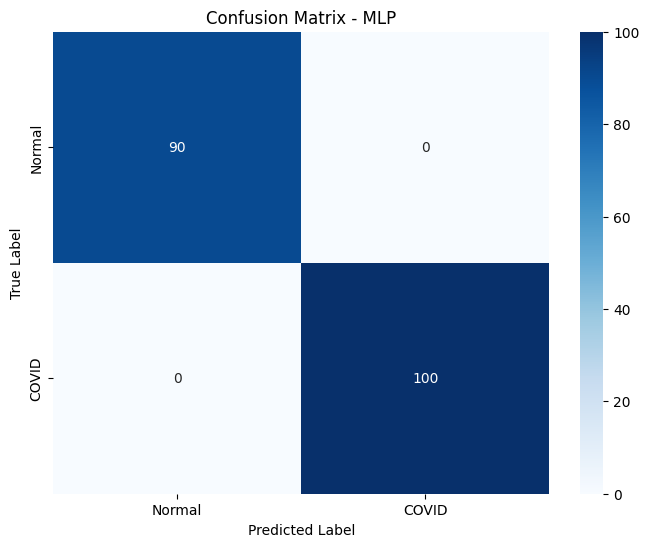

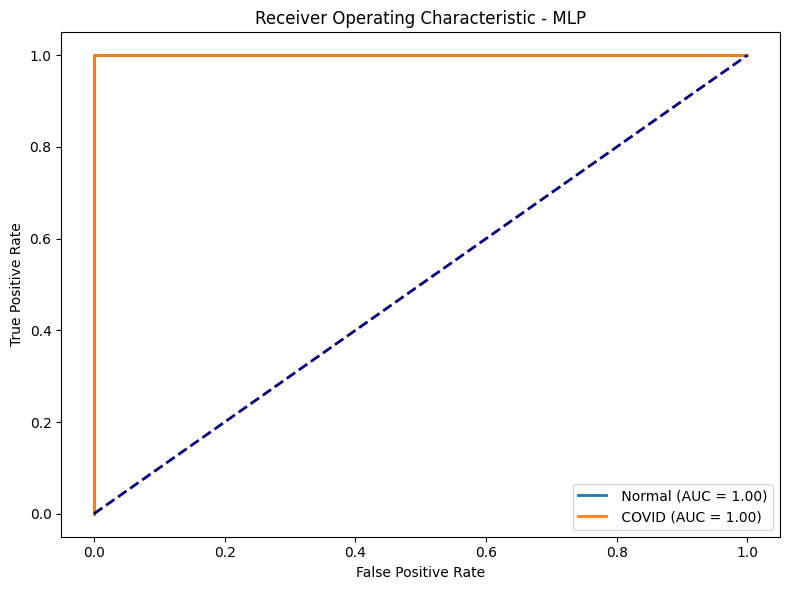

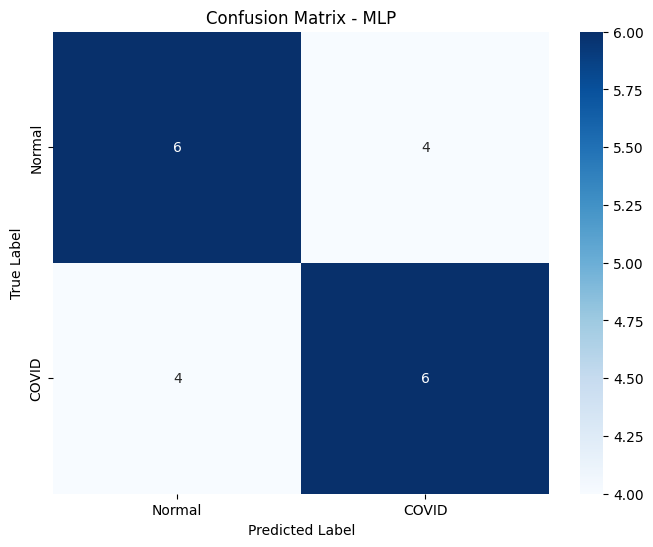

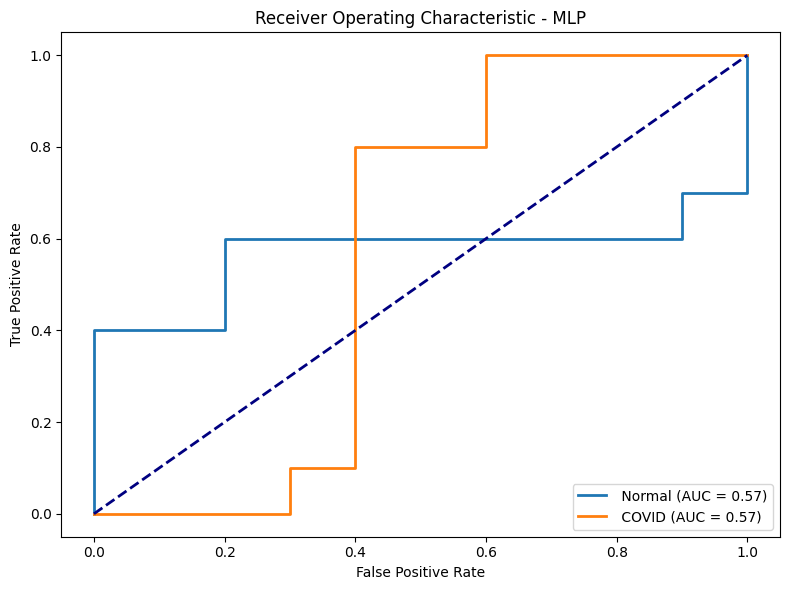

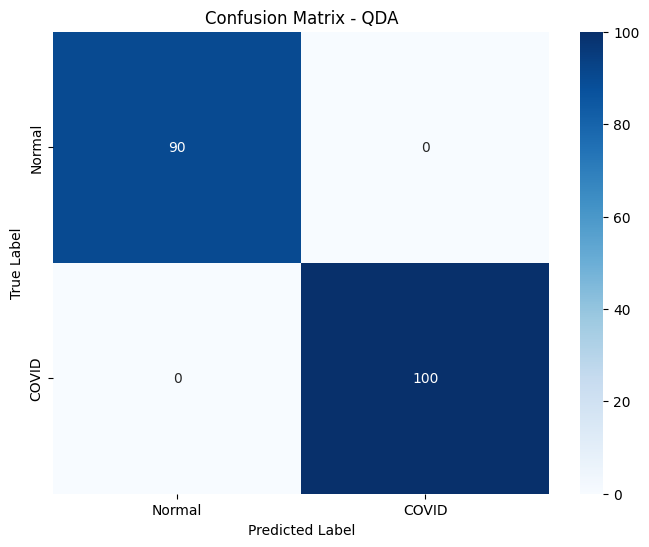

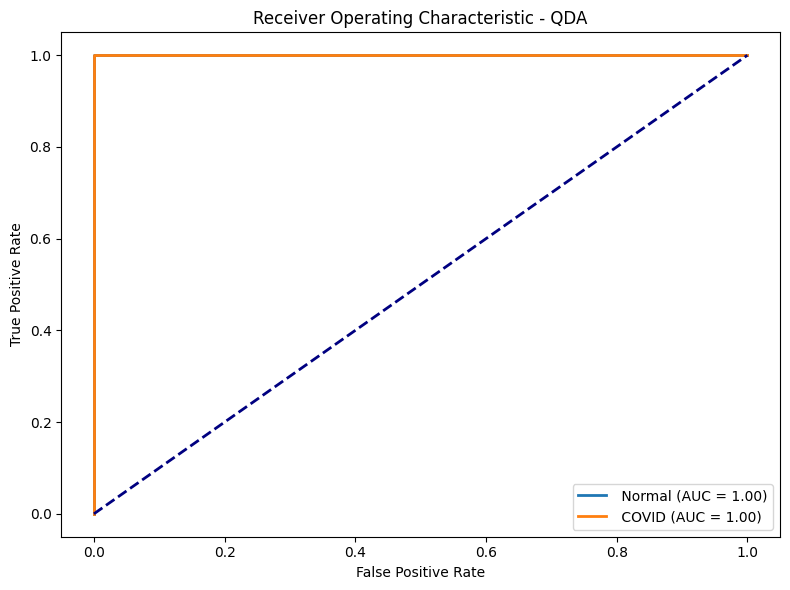

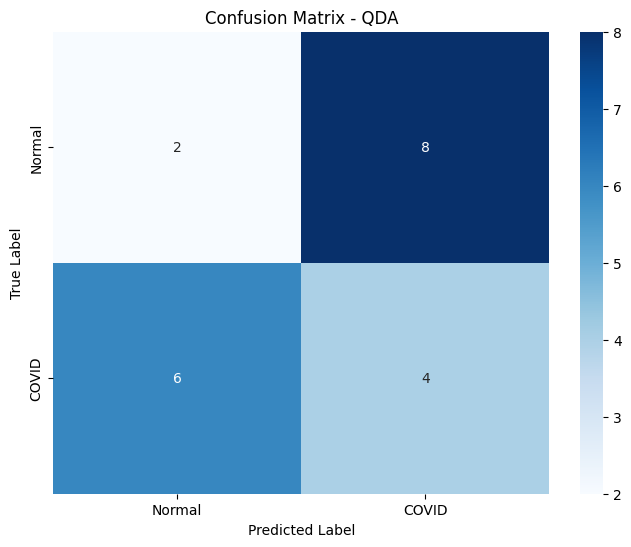

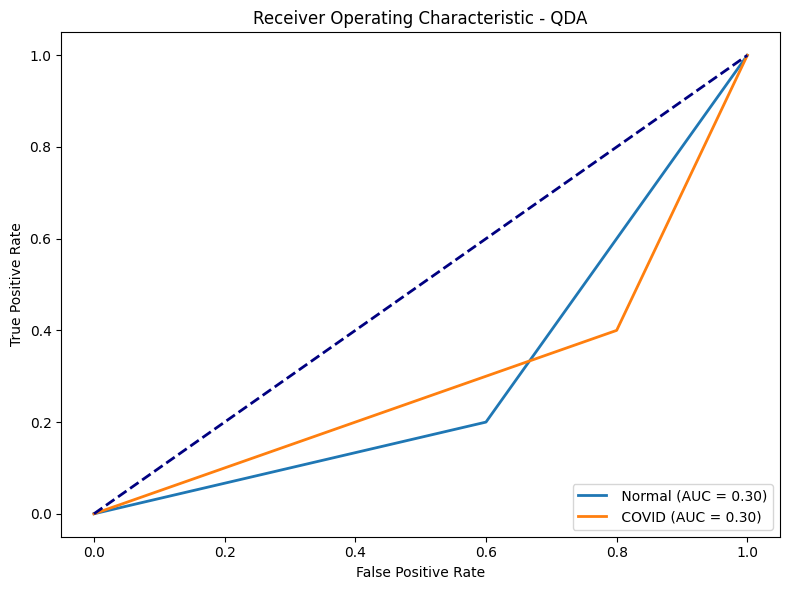

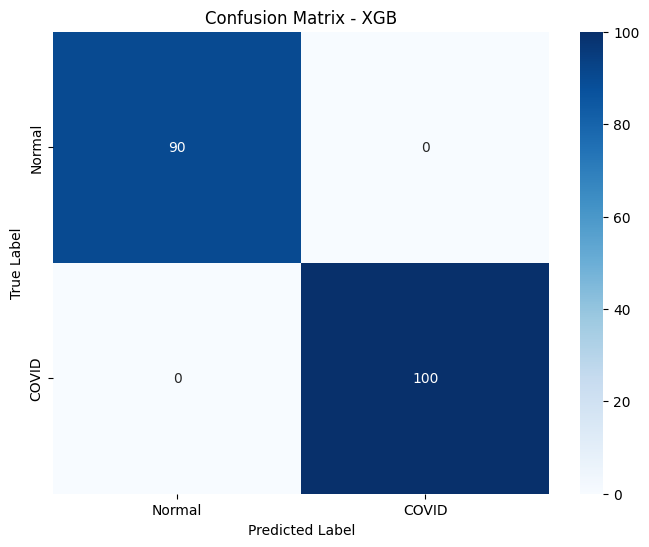

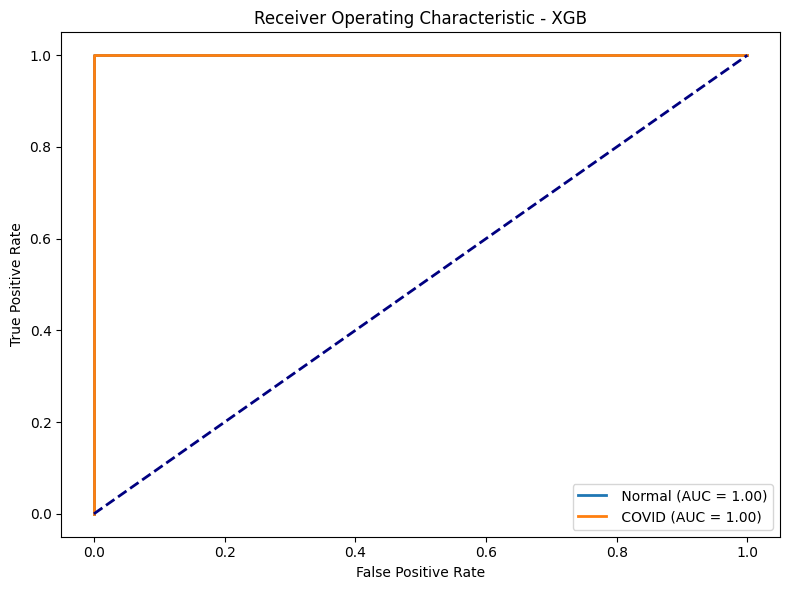

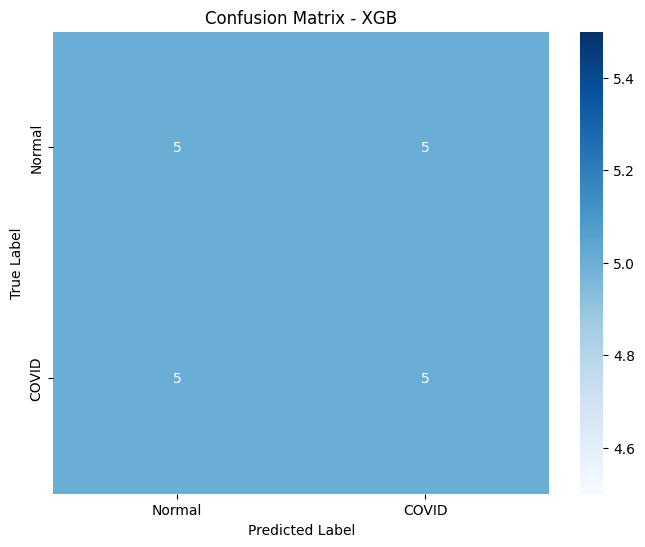

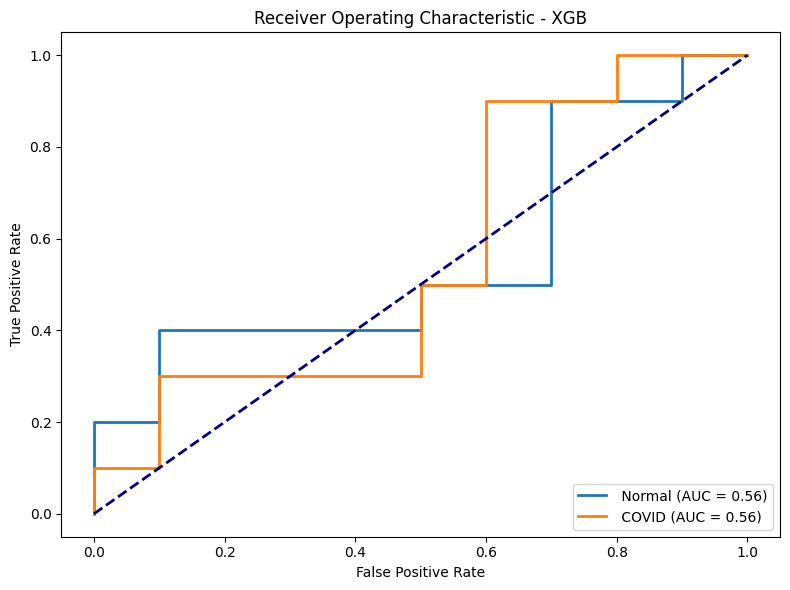

In [57]:
# Define the GLCM properties to extract
GLCM_PROPERTIES = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

# Function to extract GLCM Features
def extract_glcm_features(image, distances=[5], angles=[0]):
    if image.ndim != 2:
        raise ValueError("Image must be a 2D array.")
    glcm = graycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)
    features = []
    for prop in GLCM_PROPERTIES:
        features.append(graycoprops(glcm, prop).flatten())
    # num_features = len(GLCM_PROPERTIES) * len(distances) * len(angles)
    # print(f"Number of features: {num_features}")
    return np.hstack(features)

# Function to extract HOG Features
def extract_hog_features(image):
    if isinstance(image, np.ndarray):
        if image.ndim == 3:  # RGB image
            image = rgb2gray(image)
        elif image.ndim != 2:
            raise ValueError(f"Invalid image shape: expected 2D grayscale or 3D RGB, got {image.shape}")
        
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), block_norm='L2-Hys',
                                  visualize=True)
        return features
    else:
        raise ValueError(f"Input is not a valid numpy array: {type(image)} found")

# Function to extract LBP features
def extract_lbp_features(image):
    if image.ndim != 2:
        raise ValueError("Image must be a 2D array.")
    radius = 1
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

def apply_pca(X_train, X_test, X_val = None, n_components=0.95):  # Default to 95% variance explained
    n_samples, n_features_before = X_train.shape

    # If n_components is an integer, ensure it's within the correct range
    if isinstance(n_components, int):
        n_components = min(n_components, n_features_before)  # Ensure it's within valid range

    # If n_components is a float, use it to set the minimum number of components to explain the variance
    if isinstance(n_components, float) and 0 < n_components < 1:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        if X_val is not None:
            X_val_pca = pca.transform(X_val)
            n_features_after = X_train_pca.shape[1]  # Get the number of features after PCA
            return X_train_pca, X_test_pca, X_test_pca, n_features_before, n_features_after
        
        n_components = pca.n_components_  # Update n_components to actual number of components used
    else:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        if X_val is not None:
            X_val_pca = pca.transform(X_val)
            n_features_after = X_train_pca.shape[1]  # Get the number of features after PCA
            return X_train_pca, X_test_pca, X_test_pca, n_features_before, n_features_after

    n_features_after = X_train_pca.shape[1]  # Get the number of features after PCA
    return X_train_pca, X_test_pca, n_features_before, n_features_after


def apply_lda(X_train, y_train, X_test, X_val=None, n_components=2):
    # Determine number of features and classes
    n_features = X_train.shape[1]  # Number of features in the training set
    n_classes = len(np.unique(y_train))  # Number of unique classes in the target variable

    # Adjust n_components to the valid range
    max_components = min(n_features, n_classes - 1)  # LDA allows at most (n_classes - 1) components
    n_components = min(n_components, max_components)  # Ensure n_components is within the valid range

    # Apply LDA with the valid number of components
    lda = LDA(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    # Transform validation data if available
    if X_val is not None:
        X_val_lda = lda.transform(X_val)
        return X_train_lda, X_test_lda, X_val_lda

    return X_train_lda, X_test_lda

def apply_information_gain(X_train, y_train, X_test, X_val=None):
    # Assuming X_train, X_test, and X_val are pandas DataFrames
    from sklearn.feature_selection import mutual_info_classif

    # Compute the information gain
    info_gain = mutual_info_classif(X_train, y_train, discrete_features=True)
    
    # Compute the mask based on mean information gain
    mean_info_gain = np.mean(np.abs(info_gain))
    mask = np.abs(info_gain) > mean_info_gain
    
    # Convert DataFrame to NumPy array for masking
    X_train_array = X_train.to_numpy()
    X_test_array = X_test.to_numpy()
    
    # Apply the mask
    X_train_selected = X_train_array[:, mask]
    X_test_selected = X_test_array[:, mask]
    
    if X_val is not None:
        X_val_array = X_val.to_numpy()
        X_val_selected = X_val_array[:, mask]
        return X_train_selected, X_test_selected, X_val_selected
    else:
        return X_train_selected, X_test_selected

def apply_gain_ratio(X_train, y_train, X_test, X_val=None):
    # Compute the gain ratio (replace this with the actual method for gain ratio calculation)
    # For now, using mutual_info_classif as a placeholder for demonstration
    info_gain = mutual_info_classif(X_train, y_train, discrete_features=True)
    
    # Compute the mask based on mean gain ratio
    mean_info_gain = np.mean(np.abs(info_gain))
    mask = np.abs(info_gain) > mean_info_gain
    
    # Convert DataFrame to NumPy array if necessary
    X_train_array = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
    X_test_array = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
    
    # Apply the mask
    X_train_selected = X_train_array[:, mask]
    X_test_selected = X_test_array[:, mask]
    
    if X_val is not None:
        X_val_array = X_val.to_numpy() if isinstance(X_val, pd.DataFrame) else X_val
        X_val_selected = X_val_array[:, mask]
        return X_train_selected, X_test_selected, X_val_selected
    
    return X_train_selected, X_test_selected


def apply_chi_squared(X_train, y_train, X_test, X_val=None):
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test)
    if X_val is not None and isinstance(X_val, np.ndarray):
        X_val = pd.DataFrame(X_val)
    chi_scores, _ = chi2(X_train, y_train)
    mean_chi_score = np.mean(chi_scores)
    mask = chi_scores > mean_chi_score
    selected_features = X_train.columns[mask]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    if X_val is not None:
        X_val_selected = X_val[selected_features]
        return X_train_selected, X_test_selected, X_val_selected
    else:
        return X_train_selected, X_test_selected

def apply_correlation_coefficient(X_train, y_train, X_test, X_val=None, threshold=0):
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test)
    if X_val is not None and isinstance(X_val, np.ndarray):
        X_val = pd.DataFrame(X_val)
    correlations = X_train.corrwith(pd.Series(y_train))
    mask = (correlations.abs() > threshold)
    selected_features = correlations.index[mask]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    if X_val is not None:
        X_val_selected = X_val[selected_features]
        return X_train_selected, X_test_selected, X_val_selected
    else:
        return X_train_selected, X_test_selected

def apply_ridge_regression(X_train, y_train, X_test, X_val=None, alpha=1.0, threshold=0.0):
    # Ensure inputs are NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    if X_val is not None:
        X_val = np.array(X_val)
    
    # Check for empty inputs
    if X_train.size == 0 or y_train.size == 0 or X_test.size == 0:
        raise ValueError("Input arrays should not be empty.")
    
    # Ensure X_train and y_train have compatible shapes
    if X_train.shape[0] != y_train.shape[0]:
        raise ValueError("Number of samples in X_train and y_train must be the same.")
    
    # Fit the Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Calculate feature importances
    feature_importances = np.abs(ridge.coef_)
    
    # Create a mask for features with importance greater than the threshold
    mask = feature_importances > threshold
    
    # Ensure mask is a 1D array
    mask = np.squeeze(mask)
    
    # Apply the mask to the feature matrices
    X_train_selected = X_train[:, mask]
    X_test_selected = X_test[:, mask]
    
    if X_val is not None:
        X_val_selected = X_val[:, mask]
        return X_train_selected, X_test_selected, X_val_selected

    
    return X_train_selected, X_test_selected

if opt in ['n','N']:
        
    # Feature Extraction Section
    x_train = dx_train
    y_train = dy_train
    x_test = dx_test
    y_test = dy_test
    if 'x_val' in locals():
        x_val = dx_val
        y_val = dy_val
    
    
    print('Choose the feature selection algorithm to be applied on the dataset (separate multiple options by commas), or press Enter to apply all by default: ')
    print(' 0. No Feature Selection/Extraction to be applied\n 1. GLCM \n 2. HOG \n 3. LBP \n 4. PCA\n 5. LDA\n 6. Information Gain\n 7. Gain Ratio\n 8. chi-squared\n 9. Correlation Coefficient \n 10. Ridge Regression')

    feature_selection_algorithm_options = input().strip()

    if not feature_selection_algorithm_options:
        # Default to apply all methods
        feature_selection_algorithm_options = '1,2,3,4,5,6,7,8,9,10'.split(',')
    else:
        feature_selection_algorithm_options = [opt.strip() for opt in feature_selection_algorithm_options.split(',')]

    for option in feature_selection_algorithm_options:
        try:
            option = int(option)
        except ValueError:
            print(f"Skipping invalid option: {option}")
            continue

        if option == 0:
            if 'x_val' in locals():
                min_max(x_train, y_train, x_test, y_test, "NO_FSE", x_val, y_val)
                quant(x_train, y_train, x_test, y_test, "NO_FSE", x_val, y_val)
                standardize(x_train, y_train, x_test, y_test, "NO_FSE", x_val, y_val)
            else:
                min_max(x_train, y_train, x_test, y_test, sheet_name="NO_FSE")
                quant(x_train, y_train, x_test, y_test, sheet_name="NO_FSE")
                standardize(x_train, y_train, x_test, y_test, sheet_name="NO_FSE")

        elif option == 1:
            x_train_glcm = np.array([extract_glcm_features(img) for img in Train_images])
            x_train_glcm = pd.DataFrame(x_train_glcm)
            x_test_glcm = np.array([extract_glcm_features(img) for img in Test_images])
            x_test_glcm = pd.DataFrame(x_test_glcm)
            if 'x_val' in locals():
                x_val_glcm = np.array([extract_glcm_features(img) for img in Val_images])
                x_val_glcm = pd.DataFrame(x_val_glcm)
                save_features(x_val_glcm, "GLCM", "val_features.csv")
                min_max(x_train_glcm, y_train, x_test_glcm, y_test, "GLCM", x_val_glcm, y_val)
                quant(x_train_glcm, y_train, x_test_glcm, y_test, "GLCM", x_val_glcm, y_val)
                # standardize(pd.DataFrame(x_train_glcm), pd.DataFrame(y_train), pd.DataFrame(x_test_glcm), pd.DataFrame(y_test), "GLCM", x_val_glcm, y_val)  # Added standardization
                standardize(x_train_glcm, y_train, x_test_glcm, y_test, "GLCM", x_val_glcm, y_val)  # Added standardization
            else:
                min_max(x_train_glcm, y_train, x_test_glcm, y_test, sheet_name="GLCM")
                quant(x_train_glcm, y_train, x_test_glcm, y_test, sheet_name="GLCM")
                standardize(x_train_glcm, y_train, x_test_glcm, y_test, sheet_name="GLCM")  # Added standardization
            print("GLCM Features Extracted")
            save_features(x_train_glcm, "GLCM", "train_features.csv")
            save_features(x_test_glcm, "GLCM", "test_features.csv")

        elif option == 2:
            x_train_hog = np.array([extract_hog_features(img) for img in Train_images])
            x_train_hog = pd.DataFrame(x_train_hog)
            x_test_hog = np.array([extract_hog_features(img) for img in Test_images])
            x_test_hog = pd.DataFrame(x_test_hog)
            if 'x_val' in locals():
                x_val_hog = np.array([extract_hog_features(img) for img in Val_images])
                x_val_hog = pd.DataFrame(x_val_hog)
                save_features(x_val_hog, "HOG", "val_features.csv")
                min_max(x_train_hog, y_train, x_test_hog, y_test, "HOG", x_val_hog, y_val)
                quant(x_train_hog, y_train, x_test_hog, y_test, "HOG", x_val_hog, y_val)
                standardize(x_train_hog, y_train, x_test_hog, y_test, "HOG", x_val_hog, y_val)  # Added standardization
            else:
                min_max(x_train_hog, y_train, x_test_hog, y_test, sheet_name="HOG")
                quant(x_train_hog, y_train, x_test_hog, y_test, sheet_name="HOG")
                standardize(x_train_hog, y_train, x_test_hog, y_test, sheet_name="HOG")  # Added standardization
            print("HOG Features Extracted")
            save_features(x_train_hog, "HOG", "train_features.csv")
            save_features(x_test_hog, "HOG", "test_features.csv")

        elif option == 3:
            x_train_lbp = np.array([extract_lbp_features(img) for img in Train_images])
            x_train_lbp = pd.DataFrame(x_train_lbp)
            x_test_lbp = np.array([extract_lbp_features(img) for img in Test_images])
            x_test_lbp = pd.DataFrame(x_test_lbp)
            if 'x_val' in locals():
                x_val_lbp = np.array([extract_lbp_features(img) for img in Val_images])
                x_val_lbp = pd.DataFrame(x_val_lbp)
                save_features(x_val_lbp, "LBP", "val_features.csv")
                min_max(x_train_lbp, y_train, x_test_lbp, y_test, "LBP", x_val_lbp, y_val)
                quant(x_train_lbp, y_train, x_test_lbp, y_test, "LBP", x_val_lbp, y_val)
                standardize(x_train_lbp, y_train, x_test_lbp, y_test, "LBP", x_val_lbp, y_val)  # Added standardization
            else:
                min_max(x_train_lbp, y_train, x_test_lbp, y_test, sheet_name="LBP")
                quant(x_train_lbp, y_train, x_test_lbp, y_test, sheet_name="LBP")
                standardize(x_train_lbp, y_train, x_test_lbp, y_test, sheet_name="LBP")  # Added standardization
            print("LBP Features Extracted")
            save_features(x_train_lbp, "LBP", "train_features.csv")
            save_features(x_test_lbp, "LBP", "test_features.csv")

        elif option == 4:
            if 'x_val' in locals():
                x_train_pca, x_test_pca, x_val_pca, n_features_before, n_features_after = apply_pca(x_train, x_test, x_val)
                x_train_pca = pd.DataFrame(x_train_pca)
                x_test_pca = pd.DataFrame(x_test_pca)
                x_val_pca = pd.DataFrame(x_val_pca)
                save_features(x_val_pca, "PCA", "val_features.csv")
                min_max(x_train_pca, y_train, x_test_pca, y_test, "PCA", x_val_pca, y_val)
                quant(x_train_pca, y_train, x_test_pca, y_test, "PCA", x_val_pca, y_val)
                standardize(x_train_pca, y_train, x_test_pca, y_test, "PCA", x_val_pca, y_val)  # Added standardization
            else:
                x_train_pca, x_test_pca, n_features_before, n_features_after = apply_pca(x_train, x_test)
                x_train_pca = pd.DataFrame(x_train_pca)
                x_test_pca = pd.DataFrame(x_test_pca)
                min_max(x_train_pca, y_train, x_test_pca, y_test, sheet_name="PCA")
                quant(x_train_pca, y_train, x_test_pca, y_test, sheet_name="PCA")
                standardize(x_train_pca, y_train, x_test_pca, y_test, sheet_name="PCA")  # Added standardization
            print("PCA Applied")
            save_features(x_train_pca, "PCA", "train_features.csv")
            save_features(x_test_pca, "PCA", "test_features.csv")

        elif option == 5:
            if 'x_val' in locals():
                x_train_lda, x_test_lda, x_val_lda = apply_lda(x_train, y_train, x_test, x_val)
                x_train_lda = pd.DataFrame(x_train_lda)
                x_test_lda = pd.DataFrame(x_test_lda)
                x_val_lda = pd.DataFrame(x_val_lda)
                save_features(x_val_lda, "LDA", "val_features.csv")
                min_max(x_train_lda, y_train, x_test_lda, y_test, "LDA", x_val_lda, y_val)
                quant(x_train_lda, y_train, x_test_lda, y_test, "LDA", x_val_lda, y_val)
                standardize(x_train_lda, y_train, x_test_lda, y_test, "LDA", x_val_lda, y_val)  # Added standardization
            else:
                x_train_lda, x_test_lda = apply_lda(x_train, y_train, x_test)
                x_train_lda = pd.DataFrame(x_train_lda)
                x_test_lda = pd.DataFrame(x_test_lda)
                min_max(x_train_lda, y_train, x_test_lda, y_test, sheet_name="LDA")
                quant(x_train_lda, y_train, x_test_lda, y_test, sheet_name="LDA")
                standardize(x_train_lda, y_train, x_test_lda, y_test, sheet_name="LDA")  # Added standardization
            print("LDA Applied")
            save_features(x_train_lda, "LDA", "train_features.csv")
            save_features(x_test_lda, "LDA", "test_features.csv")

        elif option == 6:
            if 'x_val' in locals():
                x_train_ig, x_test_ig, x_val_ig  = apply_information_gain(x_train, y_train, x_test, x_val)

                x_train_ig = pd.DataFrame(x_train_ig)
                x_test_ig = pd.DataFrame(x_test_ig)
                x_val_ig = pd.DataFrame(x_val_ig)
                save_features(x_val_ig, "Information_Gain", "val_features.csv")
                min_max(x_train_ig, y_train, x_test_ig, y_test, "Information_Gain", x_val_ig, y_val)
                quant(x_train_ig, y_train, x_test_ig, y_test, "Information_Gain", x_val_ig, y_val)
                standardize(x_train_ig, y_train, x_test_ig, y_test, "Information_Gain", x_val_ig, y_val)  # Added standardization
            else:
                x_train_ig, x_test_ig = apply_information_gain(x_train, y_train, x_test)

                x_train_ig = pd.DataFrame(x_train_ig)
                x_test_ig = pd.DataFrame(x_test_ig)
                min_max(x_train_ig, y_train, x_test_ig, y_test, sheet_name="Information_Gain")
                quant(x_train_ig, y_train, x_test_ig, y_test, sheet_name="Information_Gain")
                standardize(x_train_ig, y_train, x_test_ig, y_test, sheet_name="Information_Gain")  # Added standardization
            print("Information Gain Applied")
            save_features(x_train_ig, "Information_Gain", "train_features.csv")
            save_features(x_test_ig, "Information_Gain", "test_features.csv")

        elif option == 7:
            if 'x_val' in locals():
                x_train_gr, x_test_gr, x_val_gr = apply_gain_ratio(x_train, y_train, x_test, x_val)

                x_train_gr = pd.DataFrame(x_train_gr)
                x_test_gr = pd.DataFrame(x_test_gr)
                x_val_gr = pd.DataFrame(x_val_gr)
                save_features(x_val_gr, "Gain_Ratio", "val_features.csv")
                min_max(x_train_gr, y_train, x_test_gr, y_test, "Gain_Ratio", x_val_gr, y_val)
                quant(x_train_gr, y_train, x_test_gr, y_test, "Gain_Ratio", x_val_gr, y_val)
                standardize(x_train_gr, y_train, x_test_gr, y_test, "Gain_Ratio", x_val_gr, y_val)  # Added standardization
            else:
                x_train_gr, x_test_gr = apply_gain_ratio(x_train, y_train,x_test)

                x_train_gr = pd.DataFrame(x_train_gr)
                x_test_gr = pd.DataFrame(x_test_gr)
                min_max(x_train_gr, y_train, x_test_gr, y_test, sheet_name="Gain_Ratio")
                quant(x_train_gr, y_train, x_test_gr, y_test, sheet_name="Gain_Ratio")
                standardize(x_train_gr, y_train, x_test_gr, y_test, sheet_name="Gain_Ratio")  # Added standardization
            print("Gain Ratio Applied")
            save_features(x_train_gr, "Gain_Ratio", "train_features.csv")
            save_features(x_test_gr, "Gain_Ratio", "test_features.csv")

        elif option == 8:
            if 'x_val' in locals():
                x_train_chi, x_test_chi, x_val_chi = apply_chi_squared(x_train, y_train, x_test, x_val)

                x_train_chi = pd.DataFrame(x_train_chi)
                x_test_chi = pd.DataFrame(x_test_chi)
                x_val_chi = pd.DataFrame(x_val_chi)
                save_features(x_val_chi, "Chi_Squared", "val_features.csv")
                min_max(x_train_chi, y_train, x_test_chi, y_test, "Chi_Squared", x_val_chi, y_val)
                quant(x_train_chi, y_train, x_test_chi, y_test, "Chi_Squared", x_val_chi, y_val)
                standardize(x_train_chi, y_train, x_test_chi, y_test, "Chi_Squared", x_val_chi, y_val)  # Added standardization
            else:
                x_train_chi, x_test_chi = apply_chi_squared(x_train, y_train, x_test)

                x_train_chi = pd.DataFrame(x_train_chi)
                x_test_chi = pd.DataFrame(x_test_chi)
                min_max(x_train_chi, y_train, x_test_chi, y_test, sheet_name="Chi_Squared")
                quant(x_train_chi, y_train, x_test_chi, y_test, sheet_name="Chi_Squared")
                standardize(x_train_chi, y_train, x_test_chi, y_test, sheet_name="Chi_Squared")  # Added standardization
            print("Chi-Squared Applied")
            save_features(x_train_chi, "Chi_Squared", "train_features.csv")
            save_features(x_test_chi, "Chi_Squared", "test_features.csv")

        elif option == 9:
            if 'x_val' in locals():
                x_train_corr, x_test_corr, x_val_corr  = apply_correlation_coefficient(x_train, y_train, x_test, x_val)

                x_train_corr = pd.DataFrame(x_train_corr)
                x_test_corr = pd.DataFrame(x_test_corr)
                x_val_corr = pd.DataFrame(x_val_corr)
                save_features(x_val_corr, "Correlation_Coefficient", "val_features.csv")
                min_max(x_train_corr, y_train, x_test_corr, y_test, "Correlation_Coefficient", x_val_corr, y_val)
                quant(x_train_corr, y_train, x_test_corr, y_test, "Correlation_Coefficient", x_val_corr, y_val)
                standardize(x_train_corr, y_train, x_test_corr, y_test, "Correlation_Coefficient", x_val_corr, y_val)  # Added standardization
            else:
                x_train_corr, x_test_corr = apply_correlation_coefficient(x_train, y_train, x_test)

                x_train_corr = pd.DataFrame(x_train_corr)
                x_test_corr = pd.DataFrame(x_test_corr)
                min_max(x_train_corr, y_train, x_test_corr, y_test, sheet_name="Correlation_Coefficient")
                quant(x_train_corr, y_train, x_test_corr, y_test, sheet_name="Correlation_Coefficient")
                standardize(x_train_corr, y_train, x_test_corr, y_test, sheet_name="Correlation_Coefficient")  # Added standardization
            print("Correlation Coefficient Applied")
            save_features(x_train_corr, "Correlation_Coefficient", "train_features.csv")
            save_features(x_test_corr, "Correlation_Coefficient", "test_features.csv")

        elif option == 10:
            if 'x_val' in locals():
                x_train_ridge, x_test_ridge, x_val_ridge = apply_ridge_regression(x_train, y_train, x_test, x_val)

                x_train_ridge = pd.DataFrame(x_train_ridge)
                x_test_ridge = pd.DataFrame(x_test_ridge)
                x_val_ridge = pd.DataFrame(x_val_ridge)
                save_features(x_val_ridge, "Ridge_Regression", "val_features.csv")
                min_max(x_train_ridge, y_train, x_test_ridge, y_test, "Ridge_Regression", x_val_ridge, y_val)
                quant(x_train_ridge, y_train, x_test_ridge, y_test, "Ridge_Regression", x_val_ridge, y_val)
                standardize(x_train_ridge, y_train, x_test_ridge, y_test, "Ridge_Regression", x_val_ridge, y_val)  # Added standardization
            else:
                x_train_ridge, x_test_ridge = apply_ridge_regression(x_train, y_train, x_test)

                x_train_ridge = pd.DataFrame(x_train_ridge)
                x_test_ridge = pd.DataFrame(x_test_ridge)
                min_max(x_train_ridge, y_train, x_test_ridge, y_test, sheet_name="Ridge_Regression")
                quant(x_train_ridge, y_train, x_test_ridge, y_test, sheet_name="Ridge_Regression")
                standardize(x_train_ridge, y_train, x_test_ridge, y_test, sheet_name="Ridge_Regression")  # Added standardization
            print("Ridge Regression Applied")
            save_features(x_train_ridge, "Ridge_Regression", "train_features.csv")
            save_features(x_test_ridge, "Ridge_Regression", "test_features.csv")
